In [1]:
import numpy as np
import pandas as pd
from scipy.stats import f, t
import matplotlib.pyplot as plt
from funciones_qq_pp_plot import*
from funcioneschicuadrado_continuas import*
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import acf
import statsmodels.api as sm
#import pandas_profiling
%matplotlib inline


In [2]:
from scipy.stats import truncnorm

def truncated_chi_square_normal_goodness_of_fit(data, media="estimado", desvesta="estimado", r=2):
    """Performs a Chi-square goodness of fit test for a truncated normal probability distribution.

    Arguments:
    data -- a list of data values
    media -- Data mean
    desvesta -- Data Standard Deviation
    r -- number of estimated parameters

    Returns:
    A tuple containing the test statistic and p-value.
    """
    # Se verifica si se estiman parámetros o se utilizan los parámetros dados por el usuario
    if media=="estimado":
        mean = np.mean(data)
        print("Parámetro estimado: Media = "+str(mean))
    else:
        mean = media
    if desvesta=="estimado":
        std_dev = np.std(data)
        print("Parámetro estimado: Desviación Estándar = "+str(std_dev))
    else:
        std_dev = desvesta
    
    n = len(data)
    # Divide the data into k intervals using the mean and standard deviation
    k = math.floor(n/5)

    # Define range limits for equally probable classes
    intervals = np.zeros(k+1)

    for i in range(k+1):
        # Use truncnorm.ppf to generate truncated normal distribution
        intervals[i] = truncnorm.ppf((i)/k, 0, np.inf, loc=mean, scale=std_dev)

    # Calculate the expected frequencies for each interval
    expected_frequencies = np.zeros(k)
    expected_frequencies = [n * (truncnorm.cdf(intervals[i+1], 0, np.inf, mean, std_dev) - truncnorm.cdf(intervals[i], 0, np.inf, mean, std_dev)) for i in range(k)]

    # Calculate the observed frequencies for each interval
    observed_frequencies = np.zeros(k)
    observed_frequencies[0] = float(sum(data <= intervals[1]))
    for i in range(1, k):
        observed_frequencies[i] = float(sum((data >= intervals[i]) & (data <= intervals[i+1])))

    # Calculate the test statistic
    chi_squared = sum((observed_frequencies[i] - expected_frequencies[i])**2 / expected_frequencies[i] for i in range(k - 1))

    # Calculate the degrees of freedom
    degrees_of_freedom = k - r - 1

    # Calculate the p-value
    p_value = 1 - chi2.cdf(chi_squared, degrees_of_freedom)

    if float(p_value) > 0.5:
        ans = "Sigue la distribución"
    else:
        ans = "No sigue la distribución"

    respuesta = "Chi-squared statistic: "+ str(chi_squared) + "\np-value: " + str(p_value) +"\n " + str(ans)
    return print(respuesta)


## Convertir todo a segundos 

In [3]:
datosPola = pd.read_excel("DatosPola.xlsx")

In [4]:
datosPola.drop(columns=['Entidad'],inplace=True)

In [5]:
datosPola['inicio_servicio_armado'][0]

datetime.time(12, 39, 11)

In [6]:
datosPola

llegada_fila  TEA_caja inicio_servicio_caja fin_servicio_caja  \
0      12:36:53      0.00             12:37:39          12:38:06   
1      12:36:55      2.01             12:38:07          12:38:57   
2      12:38:48    112.63             12:38:59          12:39:32   
3      12:38:49      1.26             12:39:34          12:39:48   
4      12:39:11     21.66             12:39:51          12:40:49   
5      12:42:10    179.41             12:42:29          12:43:44   
6      12:44:06    116.25             12:44:11          12:44:52   
7      12:45:24     77.42             12:45:31          12:46:29   
8      12:45:50     25.93             12:46:30          12:47:27   
9      12:51:41    351.08             12:51:48          12:52:39   
10     12:51:46      5.19             12:52:41          12:53:47   
11     12:53:33    106.65             12:54:04          12:54:33   
12     12:53:44     11.40             12:54:38          12:55:31   
13     12:59:30    346.37             12:59:32          13:00:46   
14     13:03:45    252.63             13:04:38          13:05:37   
15     13:06:18    149.71             13:06:22          13:07:39   
16     13:06:19      0.75             13:07:40          13:07:50   
17     13:07:35     76.79             13:07:51          13:08:34   
18     13:09:20    104.33             13:09:28          13:10:10   
19     13:13:16    236.55             13:13:31          13:14:45   

    ts_caja_segs inicio_servicio_armado fin_servicio_armado  ts_armado_seg  
0            0.0               12:39:11            12:40:44          93.39  
1           50.8               12:39:15     12:40:51.930000           0.81  
2           33.0               12:40:02     12:42:51.860000         170.07  
3           14.9               12:40:08     12:42:52.840000         165.10  
4           58.6               12:41:11            12:42:53         102.29  
5           75.8               12:43:47     12:45:11.790000          84.20  
6           40.4               12:44:53     12:46:01.920000          69.52  
7           58.0               12:46:33     12:47:57.370000          85.90  
8           56.0               12:47:31     12:50:29.570000         179.55  
9           51.6               12:52:43     12:53:54.710000          72.82  
10          66.4               12:53:50     12:55:47.250000         117.20  
11          29.9               12:54:44     12:56:00.980000          77.42  
12          53.3               12:55:40     12:57:06.330000          86.33  
13          73.2               01:00:55     13:03:02.040000         127.88  
14          59.0               01:05:40            13:07:46         126.00  
15          78.0               01:07:45     13:10:14.620000         150.81  
16          10.7               01:07:52     13:12:04.430000         252.30  
17          44.5               01:09:15     13:13:34.650000         259.44  
18          42.7               01:10:16     13:14:28.630000         252.19  
19          74.6               01:14:49     13:16:39.450000         110.48

In [7]:
df = pd.read_excel("DatosML.xlsx")

In [8]:
df.keys()

Index(['llegada_fila', 'TEA_caja', 'inicio_servicio_caja', 'fin_servicio_caja',
       'ts_caja_seg', 'inicio_servicio_armado', 'fin_servicio_armado',
       'ts_armado_seg'],
      dtype='object')

In [9]:
df

llegada_fila  TEA_caja inicio_servicio_caja fin_servicio_caja  ts_caja_seg  \
0      12:36:57      0.00      12:39:46.370000   12:40:12.950000        26.58   
1      12:38:06     68.65      12:40:16.990000   12:40:50.910000        33.92   
2      12:39:12     66.20      12:40:56.580000   12:41:35.110000        38.53   
3      12:39:34     21.48      12:41:36.210000   12:43:02.040000        85.83   
4      12:39:41      7.49      12:43:37.330000   12:43:55.910000        18.58   
5      12:40:03     22.11      12:43:59.740000   12:44:47.920000        48.18   
6      12:41:00     56.86      12:44:48.480000   12:45:15.430000        26.95   
7      12:43:33    152.71      12:45:21.090000   12:46:13.320000        52.23   
8      12:45:22    108.86      12:46:18.800000   12:46:41.560000        22.76   
9      12:45:38     15.99      12:46:43.050000   12:47:16.340000        33.29   
10     12:45:41      2.92      12:47:16.930000   12:47:55.980000        39.05   
11     12:46:18     37.72      12:48:33.890000   12:49:11.800000        37.91   
12     12:46:32     13.34      12:49:39.290000   12:50:09.850000        30.56   
13     12:48:33    121.44      12:50:13.720000   12:50:49.830000        36.11   
14     12:49:34     61.16      12:51:50.050000   12:52:45.610000        55.56   
15     12:50:10     35.30      12:54:29.160000   12:55:20.730000        51.57   
16     12:51:34     84.40      12:57:50.800000   12:58:42.690000        51.89   
17     12:51:57     23.11      12:58:44.790000   12:59:22.550000        37.76   
18     12:54:18    140.65      12:59:23.290000   12:59:51.160000        27.87   
19     12:57:50    212.49      12:59:57.980000   13:00:49.220000        51.24   
20     12:58:28     37.88             13:00:50   13:00:58.810000         8.81   

   inicio_servicio_armado fin_servicio_armado  ts_armado_seg  
0            12:42:22,380     12:44:35.010000        133.013  
1            12:42:57,990     12:45:24.580000        147.027  
2            12:43:42,860     12:45:54.450000        132.012  
3            12:45:55,670     12:50:16.360000        261.021  
4            12:47:27,880     12:51:19.030000        231.051  
5            12:48:05,920     12:51:23.250000        197.017  
6            12:50:04,750     12:51:59.890000        115.055  
7            12:50:56,450     12:52:20.580000         84.024  
8            12:53:26,650     12:53:50.650000         24.024  
9            12:54:01,220     12:54:46.820000         46.046  
10           12:54:39,460            12:56:01         82.022  
11           12:55:27,810     12:56:28.810000         61.001  
12           12:56:40,800            12:57:00         19.019  
13           12:57:24,100            12:58:05         41.041  
14           12:58:08,980     13:00:14.910000        126.006  
15           12:58:50,200     13:01:16.470000        146.026  
16           13:01:42,800     13:02:40.480000         58.058  
17           13:02:47,360     13:03:33.490000         46.046  
18           13:03:53,090     13:03:57.530000          4.004  
19           13:05:08,410            13:05:30         22.022  
20           13:06:25,430            13:07:22         57.057

In [10]:
df['llegada_fila']

0     12:36:57
1     12:38:06
2     12:39:12
3     12:39:34
4     12:39:41
5     12:40:03
6     12:41:00
7     12:43:33
8     12:45:22
9     12:45:38
10    12:45:41
11    12:46:18
12    12:46:32
13    12:48:33
14    12:49:34
15    12:50:10
16    12:51:34
17    12:51:57
18    12:54:18
19    12:57:50
20    12:58:28
Name: llegada_fila, dtype: object

In [11]:
datosML = df.copy()

In [12]:
import datetime
import pandas as pd

# Función para convertir datetime.time a segundos
def time_to_seconds(time):
    return time.hour * 3600 + time.minute * 60 + time.second

# Lista de columnas a convertir
columnas = ['llegada_fila', 'TEA_caja', 'inicio_servicio_caja', 'fin_servicio_caja', 'ts_caja_seg', 'inicio_servicio_armado', 'fin_servicio_armado', 'ts_armado_seg']

# Aplicar la función a cada columna
def transformColumns(df, columnas):

    for columna in columnas:
        for i in range(0, len(df[columna])):
            if isinstance(df[columna][i], datetime.time):
                df[columna][i] = time_to_seconds(df[columna][i])
            elif isinstance(df[columna][i], str):
                tiempo = datetime.datetime.strptime(df[columna][i], '%H:%M:%S,%f').time()
                df[columna][i] = time_to_seconds(tiempo)
        
    return df

transformColumns(df,columnas)



C:\Users\user\AppData\Local\Temp\ipykernel_12708\103672553.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columna][i] = time_to_seconds(df[columna][i])
C:\Users\user\AppData\Local\Temp\ipykernel_12708\103672553.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columna][i] = time_to_seconds(tiempo)


llegada_fila  TEA_caja inicio_servicio_caja fin_servicio_caja  ts_caja_seg  \
0         45417      0.00                45586             45612        26.58   
1         45486     68.65                45616             45650        33.92   
2         45552     66.20                45656             45695        38.53   
3         45574     21.48                45696             45782        85.83   
4         45581      7.49                45817             45835        18.58   
5         45603     22.11                45839             45887        48.18   
6         45660     56.86                45888             45915        26.95   
7         45813    152.71                45921             45973        52.23   
8         45922    108.86                45978             46001        22.76   
9         45938     15.99                46003             46036        33.29   
10        45941      2.92                46036             46075        39.05   
11        45978     37.72                46113             46151        37.91   
12        45992     13.34                46179             46209        30.56   
13        46113    121.44                46213             46249        36.11   
14        46174     61.16                46310             46365        55.56   
15        46210     35.30                46469             46520        51.57   
16        46294     84.40                46670             46722        51.89   
17        46317     23.11                46724             46762        37.76   
18        46458    140.65                46763             46791        27.87   
19        46670    212.49                46797             46849        51.24   
20        46708     37.88                46850             46858         8.81   

   inicio_servicio_armado fin_servicio_armado  ts_armado_seg  
0                   45742               45875        133.013  
1                   45777               45924        147.027  
2                   45822               45954        132.012  
3                   45955               46216        261.021  
4                   46047               46279        231.051  
5                   46085               46283        197.017  
6                   46204               46319        115.055  
7                   46256               46340         84.024  
8                   46406               46430         24.024  
9                   46441               46486         46.046  
10                  46479               46561         82.022  
11                  46527               46588         61.001  
12                  46600               46620         19.019  
13                  46644               46685         41.041  
14                  46688               46814        126.006  
15                  46730               46876        146.026  
16                  46902               46960         58.058  
17                  46967               47013         46.046  
18                  47033               47037          4.004  
19                  47108               47130         22.022  
20                  47185               47242         57.057

In [13]:
columnas = datosPola.columns.tolist()
transformColumns(datosPola,columnas)

C:\Users\user\AppData\Local\Temp\ipykernel_12708\103672553.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columna][i] = time_to_seconds(df[columna][i])


llegada_fila  TEA_caja inicio_servicio_caja fin_servicio_caja  \
0         45413      0.00                45459             45486   
1         45415      2.01                45487             45537   
2         45528    112.63                45539             45572   
3         45529      1.26                45574             45588   
4         45551     21.66                45591             45649   
5         45730    179.41                45749             45824   
6         45846    116.25                45851             45892   
7         45924     77.42                45931             45989   
8         45950     25.93                45990             46047   
9         46301    351.08                46308             46359   
10        46306      5.19                46361             46427   
11        46413    106.65                46444             46473   
12        46424     11.40                46478             46531   
13        46770    346.37                46772             46846   
14        47025    252.63                47078             47137   
15        47178    149.71                47182             47259   
16        47179      0.75                47260             47270   
17        47255     76.79                47271             47314   
18        47360    104.33                47368             47410   
19        47596    236.55                47611             47685   

    ts_caja_segs inicio_servicio_armado fin_servicio_armado  ts_armado_seg  
0            0.0                  45551               45644          93.39  
1           50.8                  45555               45651           0.81  
2           33.0                  45602               45771         170.07  
3           14.9                  45608               45772         165.10  
4           58.6                  45671               45773         102.29  
5           75.8                  45827               45911          84.20  
6           40.4                  45893               45961          69.52  
7           58.0                  45993               46077          85.90  
8           56.0                  46051               46229         179.55  
9           51.6                  46363               46434          72.82  
10          66.4                  46430               46547         117.20  
11          29.9                  46484               46560          77.42  
12          53.3                  46540               46626          86.33  
13          73.2                   3655               46982         127.88  
14          59.0                   3940               47266         126.00  
15          78.0                   4065               47414         150.81  
16          10.7                   4072               47524         252.30  
17          44.5                   4155               47614         259.44  
18          42.7                   4216               47668         252.19  
19          74.6                   4489               47799         110.48

In [14]:
for i in range(0,len(datosPola['ts_caja_segs'])):
    datosPola['ts_caja_segs'][i] = datosPola['fin_servicio_caja'][i] - datosPola['inicio_servicio_caja'][i]
datosPola

C:\Users\user\AppData\Local\Temp\ipykernel_12708\1197383950.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datosPola['ts_caja_segs'][i] = datosPola['fin_servicio_caja'][i] - datosPola['inicio_servicio_caja'][i]


llegada_fila  TEA_caja inicio_servicio_caja fin_servicio_caja  \
0         45413      0.00                45459             45486   
1         45415      2.01                45487             45537   
2         45528    112.63                45539             45572   
3         45529      1.26                45574             45588   
4         45551     21.66                45591             45649   
5         45730    179.41                45749             45824   
6         45846    116.25                45851             45892   
7         45924     77.42                45931             45989   
8         45950     25.93                45990             46047   
9         46301    351.08                46308             46359   
10        46306      5.19                46361             46427   
11        46413    106.65                46444             46473   
12        46424     11.40                46478             46531   
13        46770    346.37                46772             46846   
14        47025    252.63                47078             47137   
15        47178    149.71                47182             47259   
16        47179      0.75                47260             47270   
17        47255     76.79                47271             47314   
18        47360    104.33                47368             47410   
19        47596    236.55                47611             47685   

    ts_caja_segs inicio_servicio_armado fin_servicio_armado  ts_armado_seg  
0           27.0                  45551               45644          93.39  
1           50.0                  45555               45651           0.81  
2           33.0                  45602               45771         170.07  
3           14.0                  45608               45772         165.10  
4           58.0                  45671               45773         102.29  
5           75.0                  45827               45911          84.20  
6           41.0                  45893               45961          69.52  
7           58.0                  45993               46077          85.90  
8           57.0                  46051               46229         179.55  
9           51.0                  46363               46434          72.82  
10          66.0                  46430               46547         117.20  
11          29.0                  46484               46560          77.42  
12          53.0                  46540               46626          86.33  
13          74.0                   3655               46982         127.88  
14          59.0                   3940               47266         126.00  
15          77.0                   4065               47414         150.81  
16          10.0                   4072               47524         252.30  
17          43.0                   4155               47614         259.44  
18          42.0                   4216               47668         252.19  
19          74.0                   4489               47799         110.48

In [15]:
llegada_fila = df['llegada_fila']
TEA_caja = df['TEA_caja']
inicio_servicio_caja = df['inicio_servicio_caja']
fin_servicio_caja = ['fin_servicio_caja']
ts_caja_seg = df['ts_caja_seg']
inicio_servicio_armado = df['inicio_servicio_armado']
fin_servicio_armado = df['fin_servicio_armado']
ts_armado_seg = df['ts_armado_seg']

In [16]:
df.describe()

TEA_caja  ts_caja_seg  ts_armado_seg
count   21.000000    21.000000      21.000000
mean    61.464762    38.818095      96.790095
std     56.918921    16.365052      71.509607
min      0.000000     8.810000       4.004000
25%     21.480000    27.870000      46.046000
50%     37.880000    37.760000      82.022000
75%     84.400000    51.240000     133.013000
max    212.490000    85.830000     261.021000

In [17]:
print(df.dtypes)


llegada_fila               object
TEA_caja                  float64
inicio_servicio_caja       object
fin_servicio_caja          object
ts_caja_seg               float64
inicio_servicio_armado     object
fin_servicio_armado        object
ts_armado_seg             float64
dtype: object


In [18]:
llegada_fila[0] = inicio_servicio_caja[0]

C:\Users\user\AppData\Local\Temp\ipykernel_12708\1774126794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  llegada_fila[0] = inicio_servicio_caja[0]


In [19]:
inicio_servicio_armado[0]

45742

In [20]:
#pandas_profiling.ProfileReport(df)

# Homogeneidad

In [21]:
razonVarianzasMLSegundo =pd.read_excel("datos_balanceados.xlsx",sheet_name="MLSegundo")

razonVarianzasMLSegundo = transformColumns(razonVarianzasMLSegundo,razonVarianzasMLSegundo.columns.tolist())
razonVarianzasMLSegundo.drop(columns=["Entidades"],inplace=True)
razonVarianzasMLSegundo

razonVarianzasMLprimero = datosML.drop(columns=[_ for _ in datosML.columns.tolist() if _ not in ["llegada_fila",'TEA_caja']])
razonVarianzasMLprimero


razonVarianzasMLsegundo = razonVarianzasMLSegundo.loc[(razonVarianzasMLSegundo['inicio_fila'] >= 45586) & (razonVarianzasMLSegundo['inicio_fila'] <= 46708)]

razonVarianzasMLsegundo.reset_index(inplace=True, drop= True)

razonVarianzasMLsegundo

C:\Users\user\AppData\Local\Temp\ipykernel_12708\103672553.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columna][i] = time_to_seconds(df[columna][i])


inicio_fila  TEA_fila
0        45650    126.69
1        45708     58.07
2        45787     79.42
3        45870     82.29
4        45950     80.79
5        45954      3.64
6        45955      0.54
7        45955      0.75
8        45969     14.11
9        45980     10.71
10       46046     66.02
11       46104     57.73
12       46215    110.74
13       46218      3.80
14       46226      7.83
15       46491    264.73
16       46535     43.81
17       46581     45.97
18       46593     12.73
19       46638     44.31
20       46639      0.88
21       46640      0.99
22       46648      7.91
23       46649      1.27

In [22]:
#Se crea la función que realiza la prueba de razón de varianzas para dos series x y y, bajo una significancia alpha
def razonVarianzas (x,y,alpha):
    # Calcula la varianza muestral de cada set de datos
    var_x = np.var(x, ddof=1)
    var_y = np.var(y, ddof=1)

    # Calcula la razón de las varianzas
    f_ratio = var_x / var_y

    # Define los grados de libertad para la prueba F
    df_x = len(x) - 1
    df_y = len(y) - 1

    # Calcula el valor del estadístico F para un nivel de significancia alpha
    f_statistic1 = f.ppf(q = alpha/2, dfn = df_y, dfd = df_x)
    f_statistic2 = f.ppf(q = 1-alpha/2, dfn = df_y, dfd = df_x)

    #Calcula el intervalo de confianza para la prueba de razón de varianzas
    IC_inf = f_ratio * f_statistic1
    IC_sup = f_ratio * f_statistic2

    print("IC razón varianzas: [", IC_inf, " , " , IC_sup, "]")

In [23]:
#Se crea la función que realiza la prueba de diferencia de medias para dos series x y y, bajo una significancia alpha y el supuesto de que las varianzas son estadísticamente iguales
def diffMediasVarIguales (x,y,alpha):
    # Cálculo de la media y la varianza muestral de cada set de datos
    n_x = len(x)
    n_y = len(y)
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    var_x = np.var(x, ddof=1)
    var_y = np.var(y, ddof=1)

    #Cálculo del Sp^2
    Sp_2 = (((n_x - 1) * var_x) + ((n_y - 1) * var_y)) / (n_x + n_y - 2)
    Sp = np.sqrt(Sp_2)

    # Cálculo del intervalo de confianza
    diff_means = mean_x - mean_y #Diferencia de medias muestrales
    v = n_x + n_y - 2  # grados de libertad del estadístico t
    t_statistic = t.ppf(1 - alpha/2, v)  # valor del estadístico t

    std_error = Sp * np.sqrt(1/n_x + 1/n_y) #standar error
    confidence_interval = diff_means + np.array([-1, 1]) * t_statistic * std_error

    # Resultados
    print("Intervalo de confianza para la diferencia de medias: ", confidence_interval)

## Homogeneidad ML

Seleccionar misma franja horaria

In [24]:
razonVarianzas(razonVarianzasMLsegundo['TEA_fila'],razonVarianzasMLprimero['TEA_caja'],0.05)


IC razón varianzas: [ 0.4596510631953274  ,  2.6215435561321283 ]


varianzas iguales

In [25]:
diffMediasVarIguales(razonVarianzasMLsegundo['TEA_fila'],razonVarianzasMLprimero['TEA_caja'],0.05)

Intervalo de confianza para la diferencia de medias:  [-49.87482975  20.75613928]


## Homogeneidad Pola

Seleccionar la misma franja horaria

In [26]:
transformColumns(datosPola,['llegada_fila','TEA_caja'])

llegada_fila  TEA_caja inicio_servicio_caja fin_servicio_caja  \
0         45413      0.00                45459             45486   
1         45415      2.01                45487             45537   
2         45528    112.63                45539             45572   
3         45529      1.26                45574             45588   
4         45551     21.66                45591             45649   
5         45730    179.41                45749             45824   
6         45846    116.25                45851             45892   
7         45924     77.42                45931             45989   
8         45950     25.93                45990             46047   
9         46301    351.08                46308             46359   
10        46306      5.19                46361             46427   
11        46413    106.65                46444             46473   
12        46424     11.40                46478             46531   
13        46770    346.37                46772             46846   
14        47025    252.63                47078             47137   
15        47178    149.71                47182             47259   
16        47179      0.75                47260             47270   
17        47255     76.79                47271             47314   
18        47360    104.33                47368             47410   
19        47596    236.55                47611             47685   

    ts_caja_segs inicio_servicio_armado fin_servicio_armado  ts_armado_seg  
0           27.0                  45551               45644          93.39  
1           50.0                  45555               45651           0.81  
2           33.0                  45602               45771         170.07  
3           14.0                  45608               45772         165.10  
4           58.0                  45671               45773         102.29  
5           75.0                  45827               45911          84.20  
6           41.0                  45893               45961          69.52  
7           58.0                  45993               46077          85.90  
8           57.0                  46051               46229         179.55  
9           51.0                  46363               46434          72.82  
10          66.0                  46430               46547         117.20  
11          29.0                  46484               46560          77.42  
12          53.0                  46540               46626          86.33  
13          74.0                   3655               46982         127.88  
14          59.0                   3940               47266         126.00  
15          77.0                   4065               47414         150.81  
16          10.0                   4072               47524         252.30  
17          43.0                   4155               47614         259.44  
18          42.0                   4216               47668         252.19  
19          74.0                   4489               47799         110.48

In [27]:
razonVarianzasPolaSegundo =pd.read_excel("datos_balanceados.xlsx",sheet_name="Pola")

razonVarianzasPolaSegundo = transformColumns(razonVarianzasPolaSegundo,razonVarianzasPolaSegundo.columns.tolist())
razonVarianzasPolaSegundo.drop(columns=["Entidades"],inplace=True)
razonVarianzasPolaSegundo

razonVarianzasPolaPrimero = datosPola.drop(columns=[_ for _ in datosPola.columns.tolist() if _ not in ["llegada_fila",'TEA_caja']])
razonVarianzasPolaPrimero


razonVarianzasPolaSegundo = razonVarianzasPolaSegundo.loc[(razonVarianzasPolaSegundo['inicio_fila'] >= 45413) & (razonVarianzasMLSegundo['inicio_fila'] <= 45900)]

razonVarianzasPolaSegundo.reset_index(inplace=True, drop= True)

razonVarianzasPolaSegundo

C:\Users\user\AppData\Local\Temp\ipykernel_12708\103672553.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columna][i] = time_to_seconds(df[columna][i])


inicio_fila  TEA_fila
0       45452     42.81
1       45603    151.33
2       45648     44.20
3       45657      9.09
4       45670     12.88
5       45744     73.75

In [28]:
razonVarianzas(razonVarianzasPolaSegundo['TEA_fila'],razonVarianzasPolaPrimero['TEA_caja'],0.05)


IC razón varianzas: [ 0.06488441614734512  ,  1.3719173925220007 ]


varianzas iguales

In [29]:
diffMediasVarIguales(razonVarianzasPolaSegundo['TEA_fila'],razonVarianzasPolaPrimero['TEA_caja'],0.05)

Intervalo de confianza para la diferencia de medias:  [-152.41490324   45.96623657]


# Autocorrelacion

## Autocorrelacion ML

In [30]:
datosML.columns

Index(['llegada_fila', 'TEA_caja', 'inicio_servicio_caja', 'fin_servicio_caja',
       'ts_caja_seg', 'inicio_servicio_armado', 'fin_servicio_armado',
       'ts_armado_seg'],
      dtype='object')

In [31]:

def Autocorrelacion(dataFrame: pd.DataFrame,columns: list):

    for columnaAuto in columns:
    # Crea el plot de la serie temporal
        plt.plot(np.arange(1,len(dataFrame[columnaAuto])+1), dataFrame[columnaAuto])
        # Agrega una etiqueta para el eje x
        plt.xlabel('Entidad')
        # Agrega una etiqueta para el eje y
        plt.ylabel('Tiempo')
        # Agrega un título para el plot
        plt.title(f'Serie del {columnaAuto}')
        # Se utiliza para ajustar automáticamente el espacio alrededor de los elementos en un gráfico para que no haya superposición entre los elementos.
        plt.tight_layout()
        # Muestra el plot
        plt.show()

        dataFrame[columnaAuto].reset_index(drop=True, inplace=True)
        dataFrame[columnaAuto].dropna(inplace=True)

        media = dataFrame[columnaAuto].mean().item()
        errorData = np.zeros(len(dataFrame[columnaAuto]))
        print(f"Media {columnaAuto}: {media}")
        print(f"Errores {columnaAuto}: {errorData}")



        a = []
        errorData =[]

        for i in range(0 , len(dataFrame[columnaAuto])):
            a.append(float(dataFrame[columnaAuto][i]))

        for i in range(0 , len(a)):
            resultados = a[i]-media
            errorData.append(resultados)


        # Crea el plot de la serie temporal
        plt.plot(np.arange(1,len(dataFrame[columnaAuto])+1), errorData)
        # Agrega una etiqueta para el eje x
        plt.xlabel('Entidad')
        # Agrega una etiqueta para el eje y
        plt.ylabel('Tiempo')
        # Agrega un título para el plot
        plt.title(f'Serie de los errores en {columnaAuto}')
        # Se utiliza para ajustar automáticamente el espacio alrededor de los elementos en un gráfico para que no haya superposición entre los elementos.
        plt.tight_layout()
        # Muestra el plot
        plt.show()


        lags = 1
        results = sm.stats.acorr_ljungbox(dataFrame[columnaAuto], lags=[lags])
        print(f"Número de lags a evaluar para {columnaAuto}: ", lags)
        print(f"Ljung-Box statistic para {columnaAuto}: ", results['lb_stat'][lags])
        print(f"Ljung-Box p-value para {columnaAuto}: ", results['lb_pvalue'][lags])

        print(f"Autocorrelation para {columnaAuto}")
        plot_acf(dataFrame[columnaAuto], lags = 10, alpha = None)
        plt.axhline(y=-2 / np.sqrt(len(dataFrame[columnaAuto])), color='gray', lw=2, linestyle='--')
        plt.axhline(y=2 / np.sqrt(len(dataFrame[columnaAuto])), color='gray', lw=2, linestyle='--')
        plt.show()
        acf(dataFrame[columnaAuto],nlags=10)

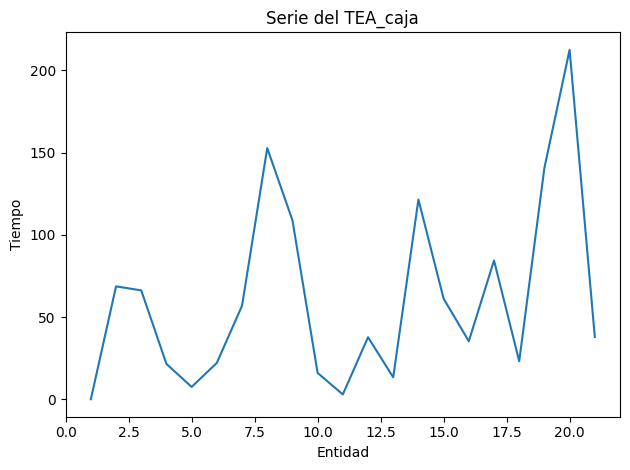

Media TEA_caja: 61.464761904761914
Errores TEA_caja: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


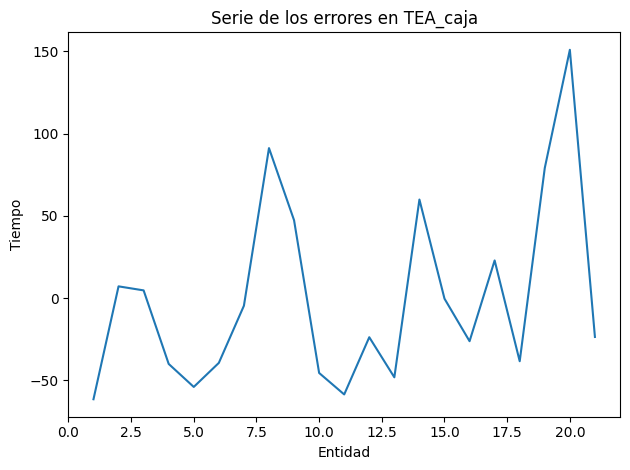

Número de lags a evaluar para TEA_caja:  1
Ljung-Box statistic para TEA_caja:  0.800178820188274
Ljung-Box p-value para TEA_caja:  0.3710399106069937
Autocorrelation para TEA_caja


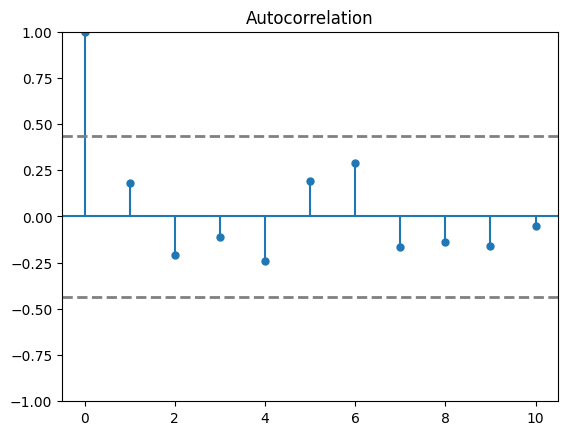

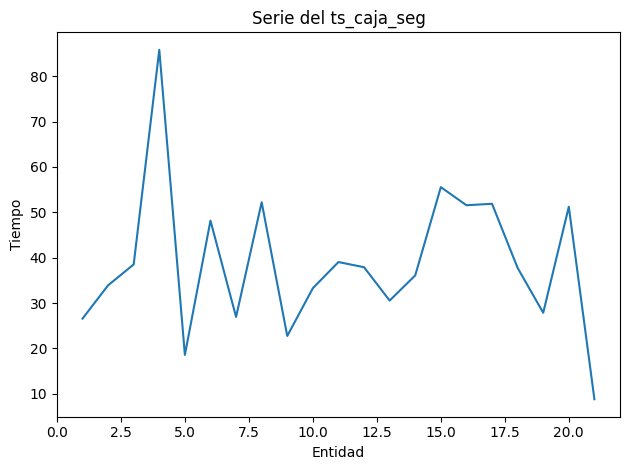

Media ts_caja_seg: 38.81809523809524
Errores ts_caja_seg: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


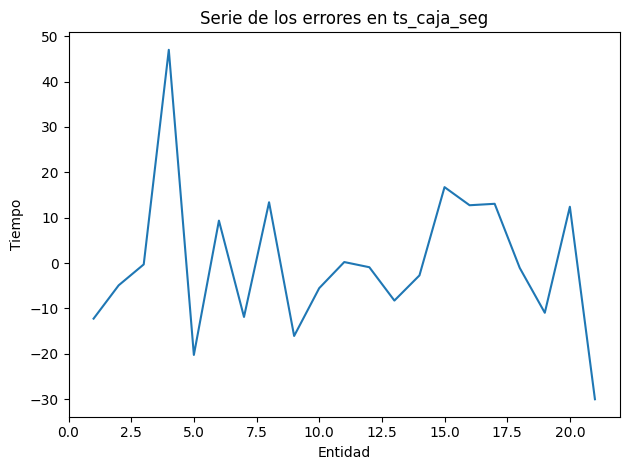

Número de lags a evaluar para ts_caja_seg:  1
Ljung-Box statistic para ts_caja_seg:  2.257800601315016
Ljung-Box p-value para ts_caja_seg:  0.13294275218462137
Autocorrelation para ts_caja_seg


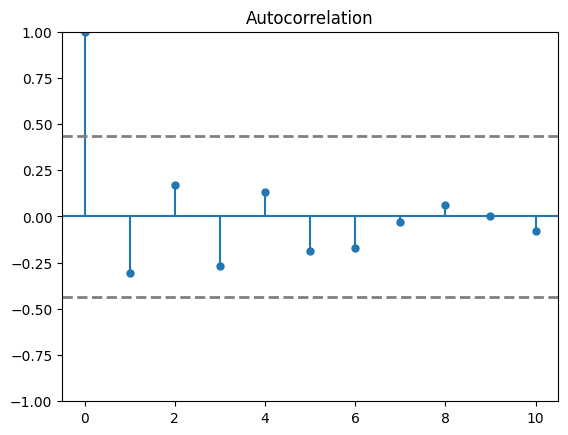

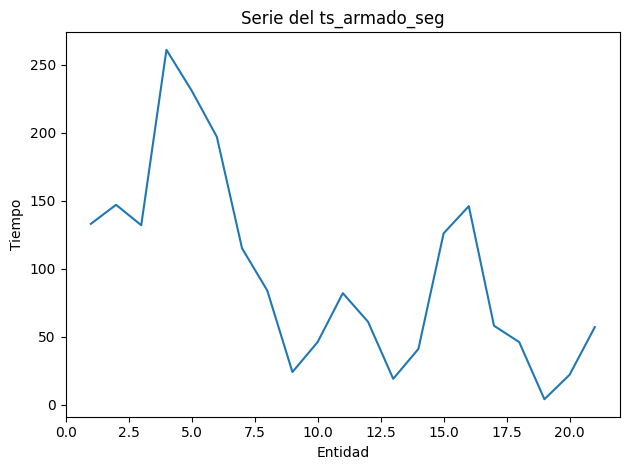

Media ts_armado_seg: 96.79009523809525
Errores ts_armado_seg: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


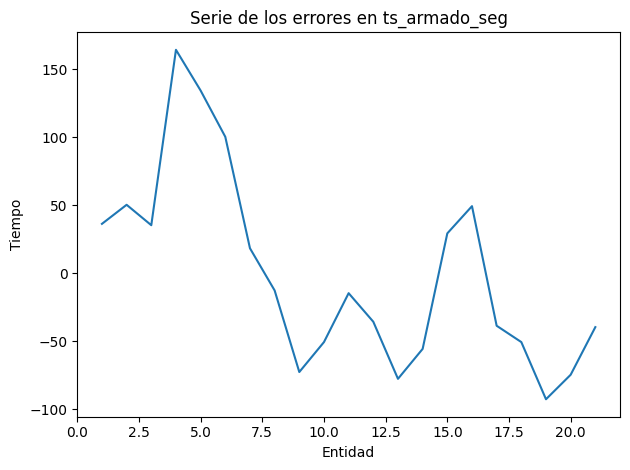

Número de lags a evaluar para ts_armado_seg:  1
Ljung-Box statistic para ts_armado_seg:  12.636720760312505
Ljung-Box p-value para ts_armado_seg:  0.00037824288558339523
Autocorrelation para ts_armado_seg


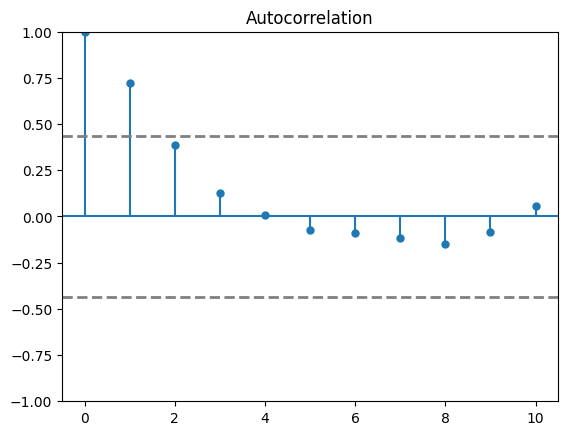

In [32]:
Autocorrelacion(datosML,["TEA_caja","ts_caja_seg","ts_armado_seg"])

Para poder meterle datos se tiene que hacer AR1 se generan 1000 datos, se le importan a simio y esos datos son los que se usan NO SE PUEDE HACER PRUEBA DE BONDAD DE AJUSTE.

In [33]:
import numpy as np
import statsmodels.api as sm

def AR1_generate(x, continuarSerie=False, seed=0):
    # Agregar un componente autorregresivo
    rho = sm.tsa.acf(x, nlags=10)[1]
    # Media de los datos
    media = np.mean(x)
    # Varianza de los datos
    varianza_datos = np.var(x, ddof=1)
    # Varianza de los errores
    varianza_error = varianza_datos * (1 - (rho ** 2))
    # Define el número de muestras que se van generar
    n_samples = len(x)
    # Genera la semilla aleatoria
    np.random.seed(seed)
    # Se define el primer dato de la serie dependiendo de si se genera una nueva serie (continuarSerie=False)
    # o si se continúa la serie a partir del último de la serie histórica
    if continuarSerie:
        resultado = np.zeros(n_samples + 1)
        resultado[0] = x.iloc[-1]
    else:
        resultado = np.zeros(n_samples)
        resultado[0] = np.random.normal(media, np.sqrt(varianza_datos), 1)

    # Se generan los datos teniendo en cuenta el término de error aleatorio
    t = 1
    while t < len(resultado):
        resultado[t] = media + rho * (resultado[t - 1] - media) + np.random.normal(0, np.sqrt(varianza_error), 1)
        t += 1
    return resultado

# Generar la serie autorregresiva
serie_temporal = AR1_generate(datosML['ts_armado_seg'], continuarSerie=True)

# Ajustar un modelo AR(1)
lags = 1  # Especificar el número de rezagos (lags)
modelo_ar = sm.tsa.AutoReg(serie_temporal, lags=lags).fit()

# Imprimir resumen del modelo
print(modelo_ar.summary())

# Obtener y visualizar los coeficientes del modelo
print("Coeficientes del modelo AR(1):")
print("Intercepto:", modelo_ar.params[0])
print("Coeficiente AR(1):", modelo_ar.params[1])

# Predecir la serie utilizando el modelo
# Aquí es donde especificas cuántos pasos en el futuro quieres predecir
pasos_a_predecir = 100  # Cambia este valor a la cantidad de pasos que quieras predecir
inicio_prediccion = len(serie_temporal)
fin_prediccion = inicio_prediccion + pasos_a_predecir - 1

serie_predicha_ml_ts_armado = modelo_ar.predict(start=inicio_prediccion, end=fin_prediccion)

# Imprimir la serie predicha
print("Serie Temporal Predicha:")
print(serie_predicha_ml_ts_armado)


                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                   22
Model:                     AutoReg(1)   Log Likelihood                -112.935
Method:               Conditional MLE   S.D. of innovations             52.400
Date:                Mon, 13 May 2024   AIC                            231.870
Time:                        12:34:12   BIC                            235.003
Sample:                             1   HQIC                           232.550
                                   22                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.8568     41.924      1.404      0.160     -23.312     141.026
y.L1           0.6622      0.218      3.038      0.002       0.235       1.089
                                    Roots           

In [34]:
serie_predicha_ml_ts_armado

array([ 45.89683593,  89.25164089, 117.96299945, 136.97685756,
       149.56862677, 157.90742107, 163.42971815, 167.08681341,
       169.50869429, 171.11256474, 172.17471458, 172.87811448,
       173.3439352 , 173.65242109, 173.8567133 , 173.99200412,
       174.08159934, 174.14093303, 174.18022627, 174.20624789,
       174.22348049, 174.23489264, 174.24245023, 174.24745519,
       174.25076968, 174.25296468, 174.25441829, 174.25538094,
       174.25601844, 174.25644062, 174.25672021, 174.25690536,
       174.25702798, 174.25710918, 174.25716296, 174.25719857,
       174.25722215, 174.25723777, 174.25724812, 174.25725497,
       174.2572595 , 174.25726251, 174.25726449, 174.25726581,
       174.25726668, 174.25726726, 174.25726764, 174.2572679 ,
       174.25726807, 174.25726818, 174.25726825, 174.2572683 ,
       174.25726833, 174.25726835, 174.25726837, 174.25726838,
       174.25726838, 174.25726839, 174.25726839, 174.25726839,
       174.25726839, 174.25726839, 174.25726839, 174.25

## Autocorrelacion Pola

In [35]:
datosPola.columns

Index(['llegada_fila', 'TEA_caja', 'inicio_servicio_caja', 'fin_servicio_caja',
       'ts_caja_segs', 'inicio_servicio_armado', 'fin_servicio_armado',
       'ts_armado_seg'],
      dtype='object')

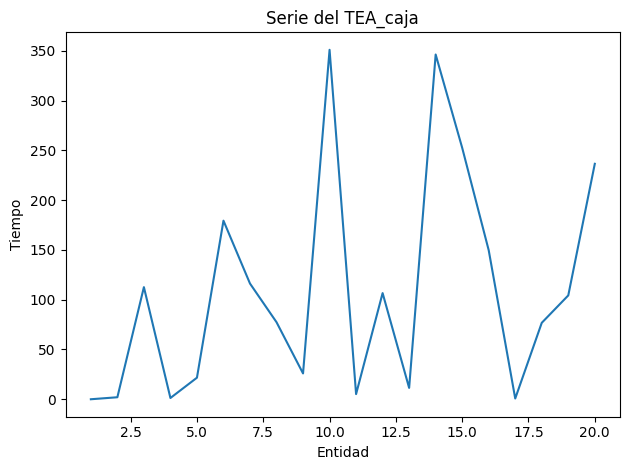

Media TEA_caja: 108.901
Errores TEA_caja: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


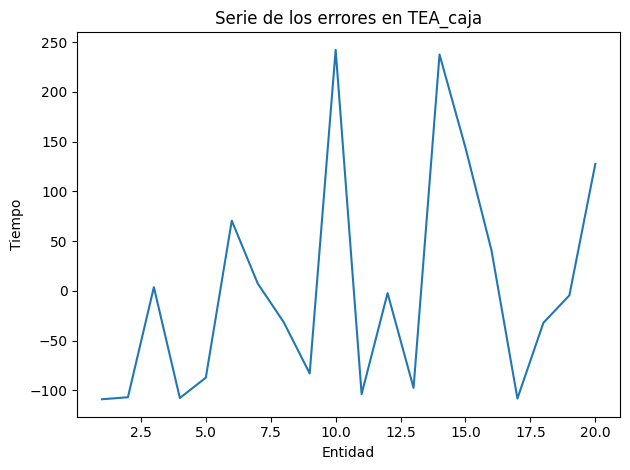

Número de lags a evaluar para TEA_caja:  1
Ljung-Box statistic para TEA_caja:  0.05991436435906503
Ljung-Box p-value para TEA_caja:  0.8066313423278166
Autocorrelation para TEA_caja


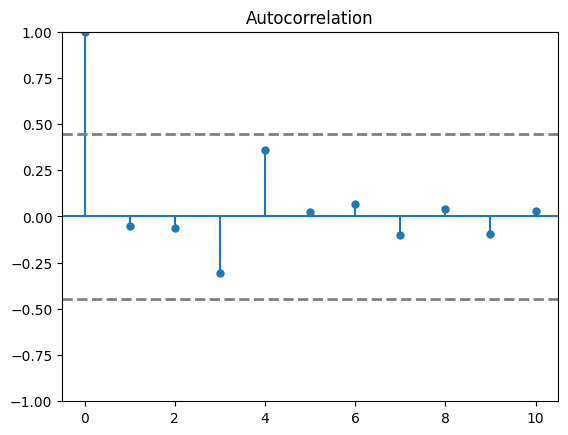

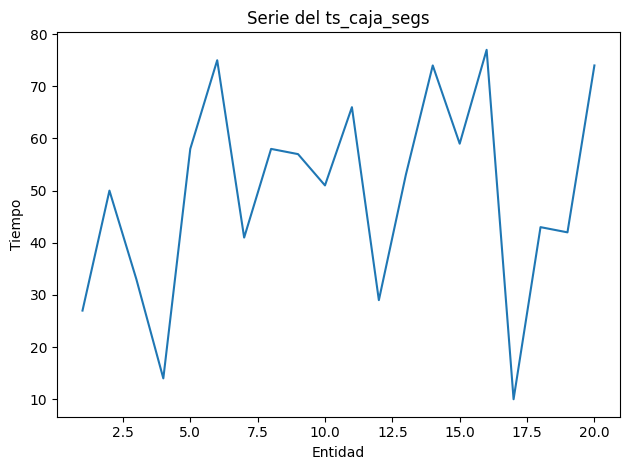

Media ts_caja_segs: 49.55
Errores ts_caja_segs: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


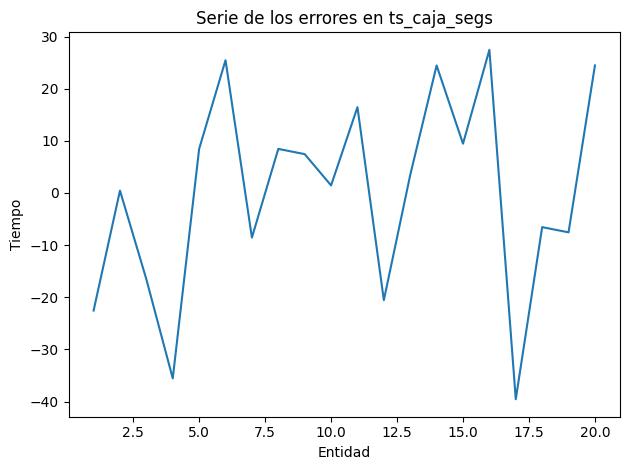

Número de lags a evaluar para ts_caja_segs:  1
Ljung-Box statistic para ts_caja_segs:  0.10759770422942672
Ljung-Box p-value para ts_caja_segs:  0.7428958678298235
Autocorrelation para ts_caja_segs


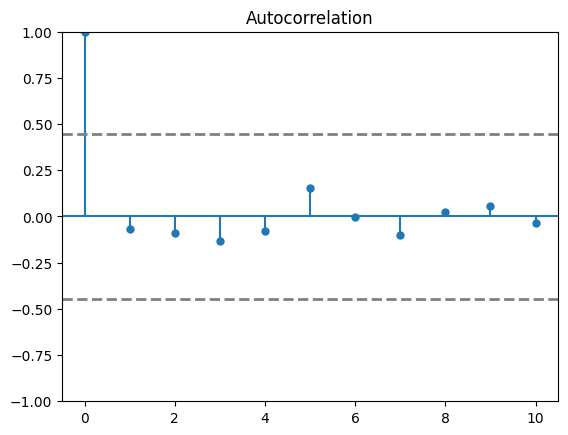

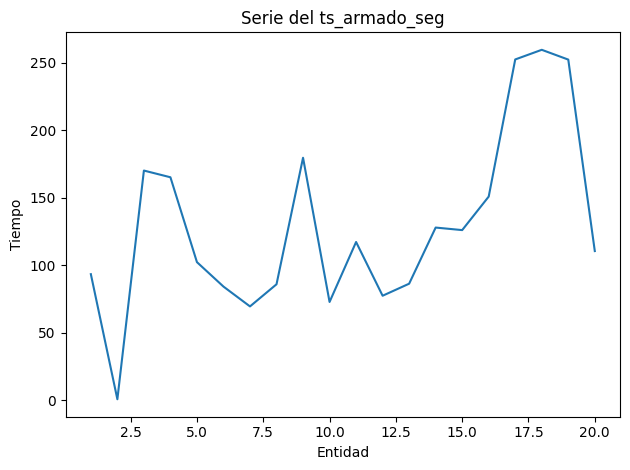

Media ts_armado_seg: 129.185
Errores ts_armado_seg: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


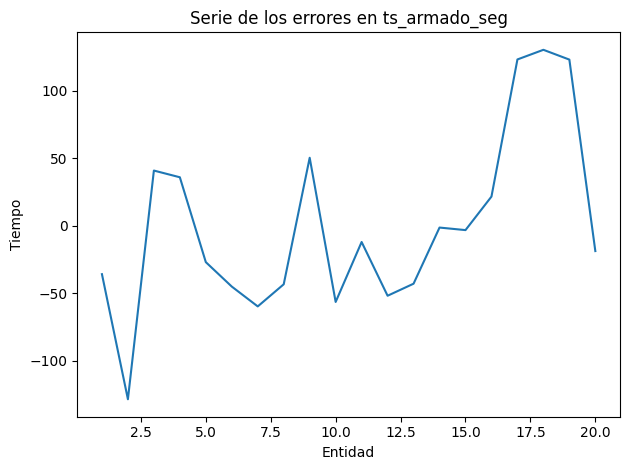

Número de lags a evaluar para ts_armado_seg:  1
Ljung-Box statistic para ts_armado_seg:  4.206373420147413
Ljung-Box p-value para ts_armado_seg:  0.04027235001992098
Autocorrelation para ts_armado_seg


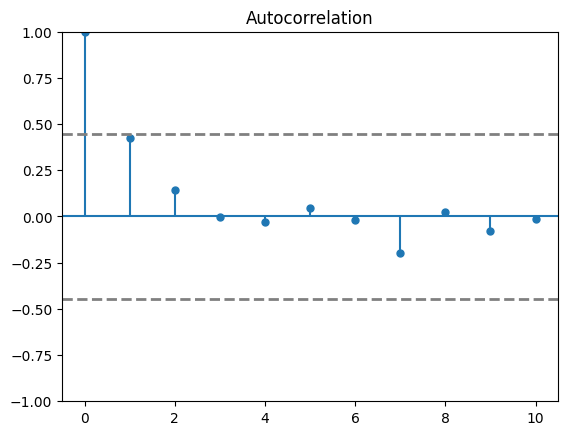

In [36]:
Autocorrelacion(datosPola,['TEA_caja','ts_caja_segs','ts_armado_seg'])

Modelo AR1

In [37]:
# Generar la serie autorregresiva
serie_temporal = AR1_generate(datosPola['ts_armado_seg'], continuarSerie=True)

# Ajustar un modelo AR(1)
lags = 1  # Especificar el número de rezagos (lags)
modelo_ar = sm.tsa.AutoReg(serie_temporal, lags=lags).fit()

# Imprimir resumen del modelo
print(modelo_ar.summary())

# Obtener y visualizar los coeficientes del modelo
print("Coeficientes del modelo AR(1):")
print("Intercepto:", modelo_ar.params[0])
print("Coeficiente AR(1):", modelo_ar.params[1])

# Predecir la serie utilizando el modelo
# Aquí es donde especificas cuántos pasos en el futuro quieres predecir
pasos_a_predecir = 100  # Cambia este valor a la cantidad de pasos que quieras predecir
inicio_prediccion = len(serie_temporal)
fin_prediccion = inicio_prediccion + pasos_a_predecir - 1

serie_predicha_pola_ts_armado = modelo_ar.predict(start=inicio_prediccion, end=fin_prediccion)

# Imprimir la serie predicha
print("Serie Temporal Predicha:")
print(serie_predicha_pola_ts_armado)


                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                   21
Model:                     AutoReg(1)   Log Likelihood                -107.288
Method:               Conditional MLE   S.D. of innovations             51.700
Date:                Mon, 13 May 2024   AIC                            220.576
Time:                        12:34:14   BIC                            223.563
Sample:                             1   HQIC                           221.159
                                   21                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        134.1551     43.922      3.054      0.002      48.069     220.241
y.L1           0.2953      0.221      1.336      0.182      -0.138       0.728
                                    Roots           

# Pruebas de Bondad de ajuste

## Pruebas de bondad de ajuste ML

#############
llegada_fila Distr. Normal Truncada
Parámetro estimado: Media = 45979.52380952381
Parámetro estimado: Desviación Estándar = 361.2584642669776


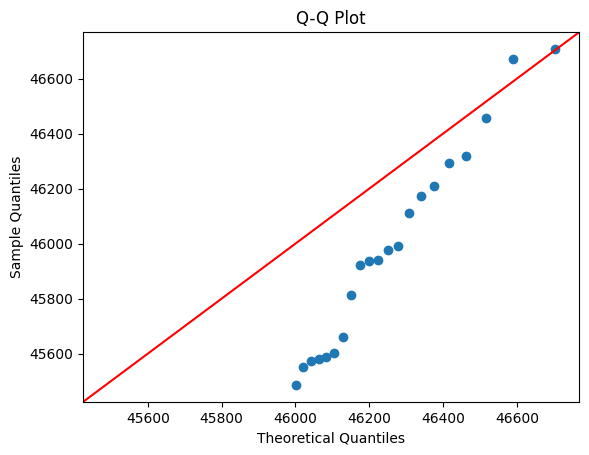

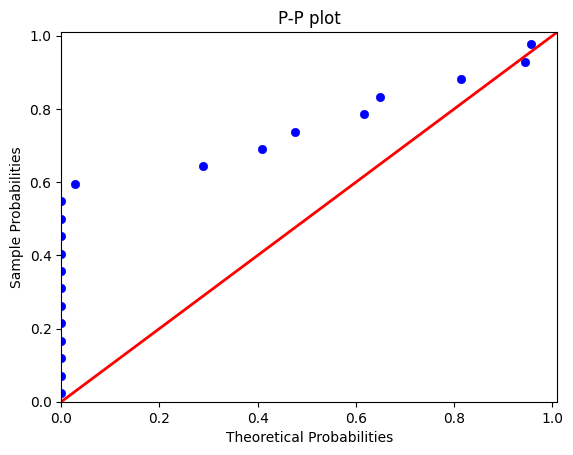



llegada_fila Distr. Normal
Parámetro estimado: Media = 45979.52380952381
Parámetro estimado: Desviación Estándar = 361.2584642669776


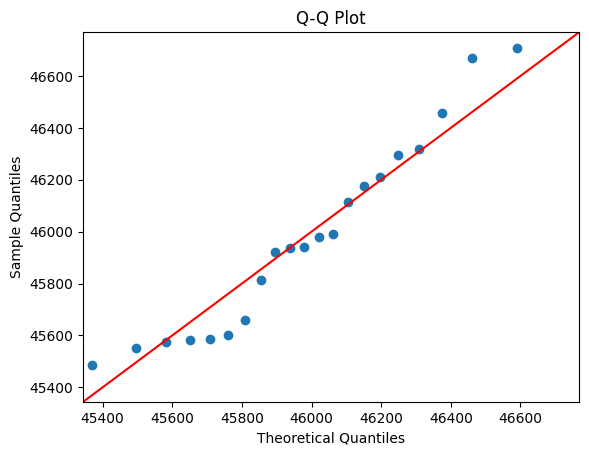

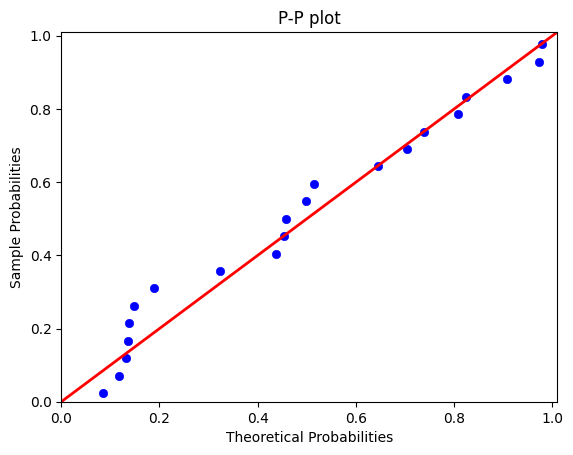



llegada_fila Distr. Exponencial
Parámetro estimado: Tasa = 2.1748811582795654e-05


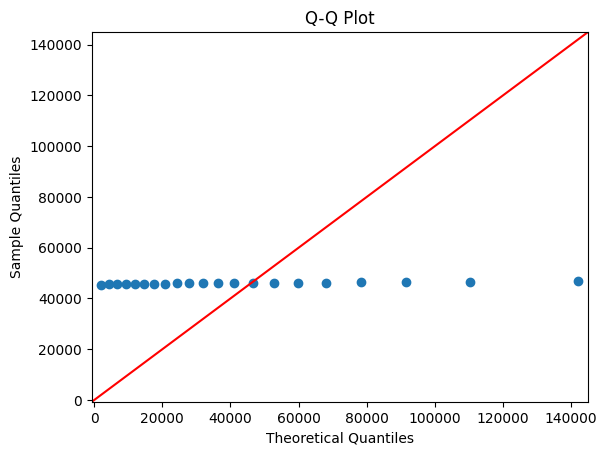

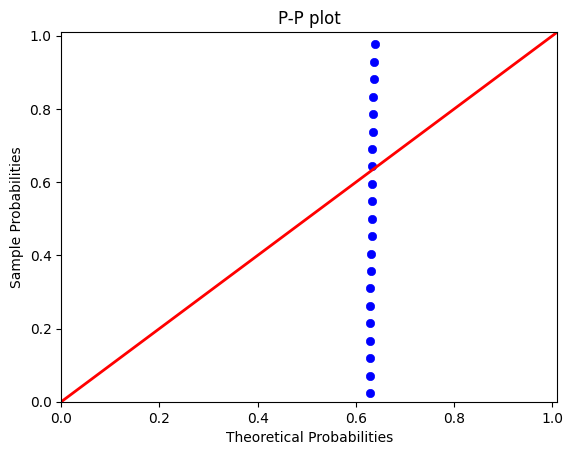



llegada_fila Distr. Uniforme
Parámetro estimado: a = 45486.0
Parámetro estimado: b = 46708.0


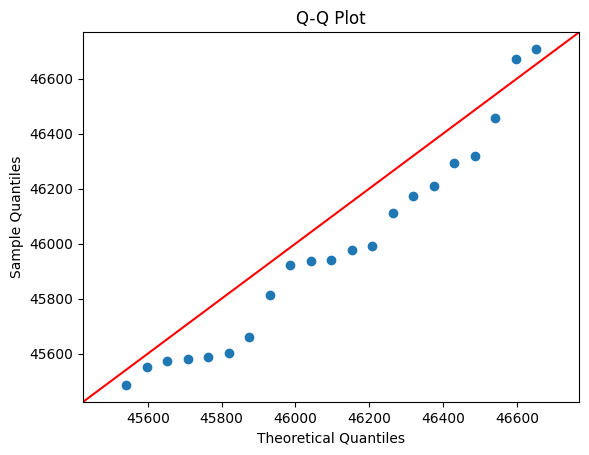

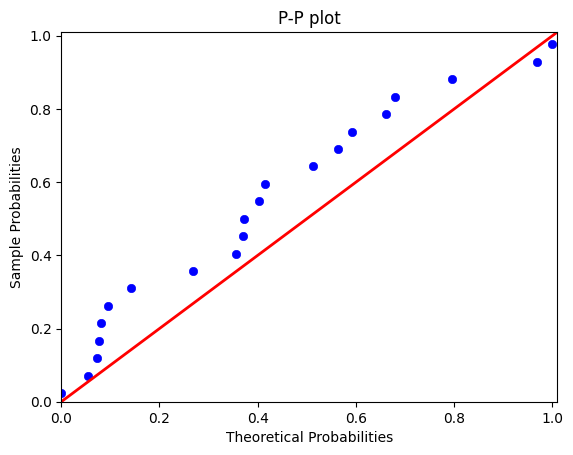



llegada_fila Distr. Weibull
Parámetro estimado: Escala = 46165.3542870777
Parámetro estimado: Forma = 125.24582324141484


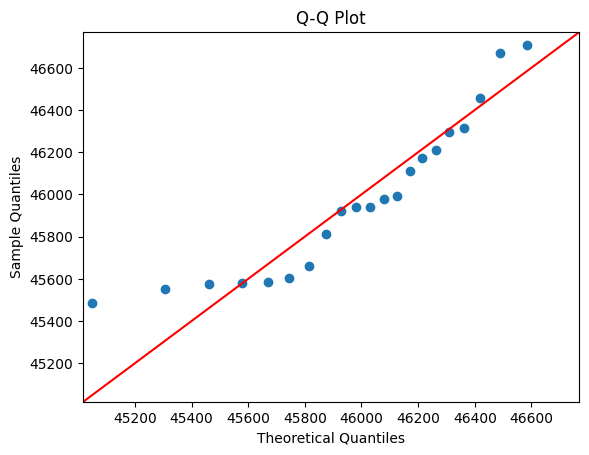

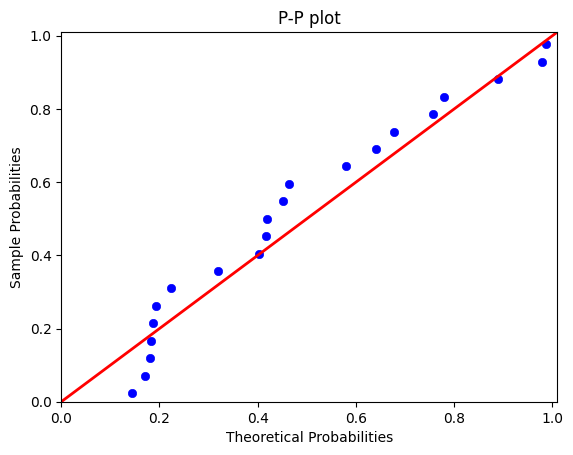



llegada_fila Distr. LogNorm
Parámetro estimado (normal asociada): Media = 10.735920645232708
Parámetro estimado (normal asociada): Desviación Estándar = 0.00784374582841289


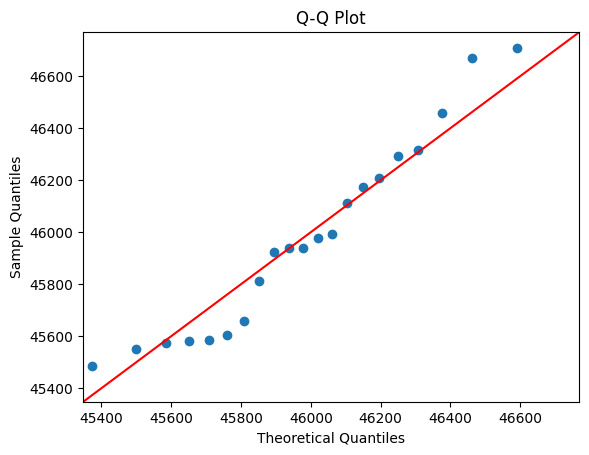

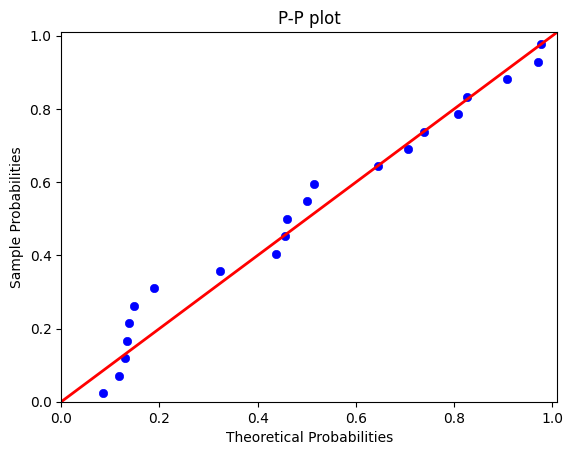



llegada_fila Distr. Triang
Parámetro estimado: a = 45486.0
Parámetro estimado: b = 46708.0
Parámetro estimado: c = 45586.0


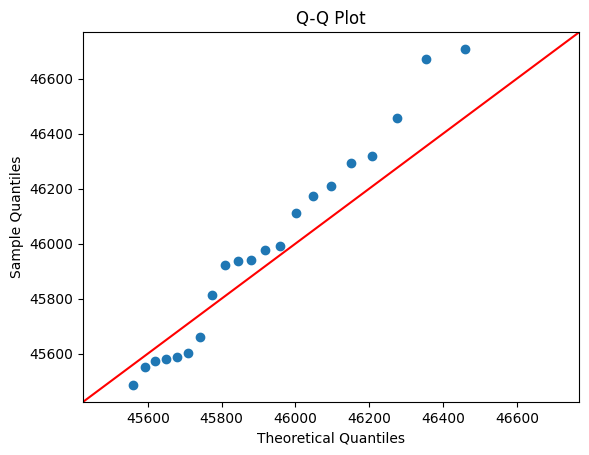

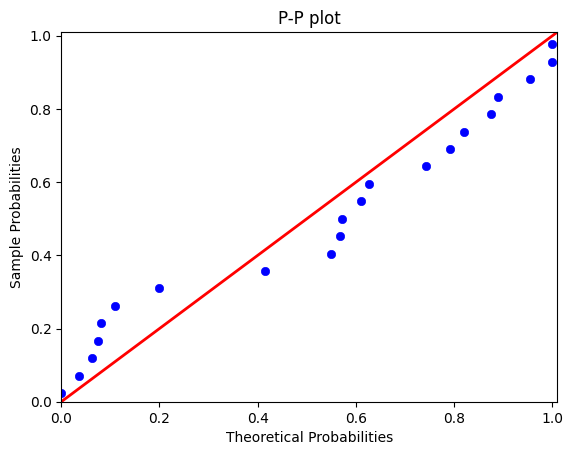

#############
#############
TEA_caja Distr. Normal Truncada
Parámetro estimado: Media = 61.464761904761914
Parámetro estimado: Desviación Estándar = 55.54717905649023


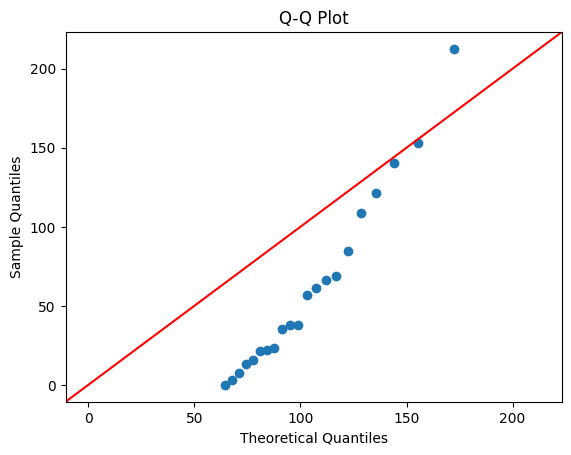

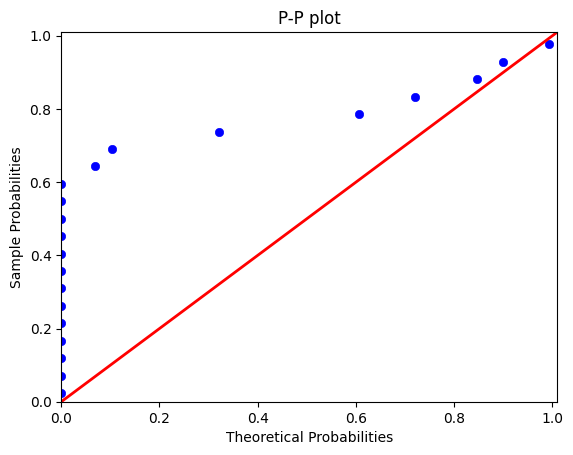



TEA_caja Distr. Normal
Parámetro estimado: Media = 61.464761904761914
Parámetro estimado: Desviación Estándar = 55.54717905649023


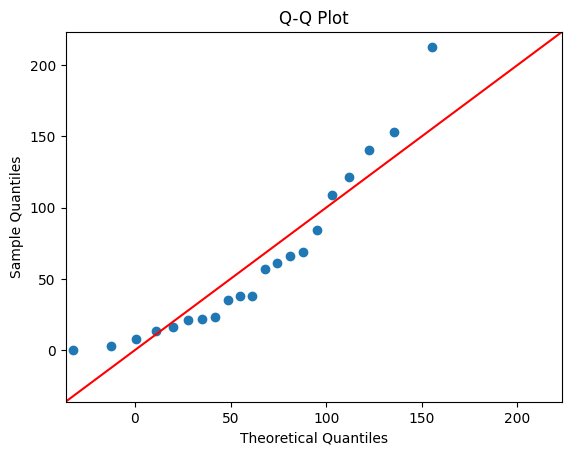

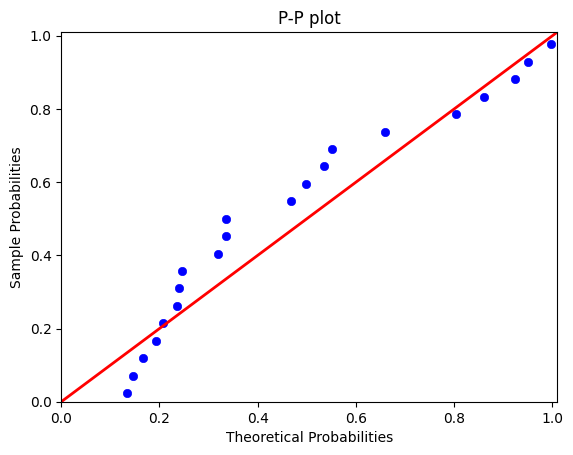



TEA_caja Distr. Exponencial
Parámetro estimado: Tasa = 0.016269484644705443


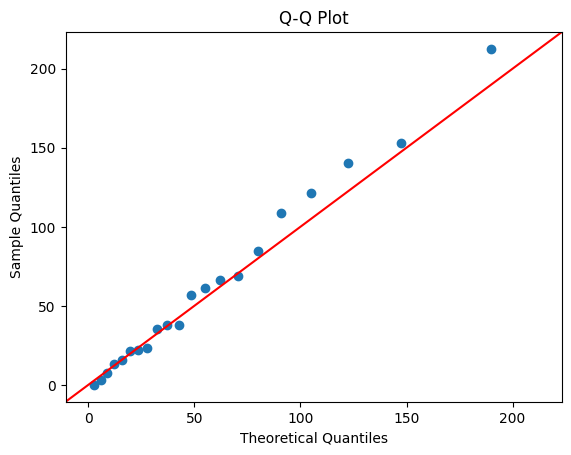

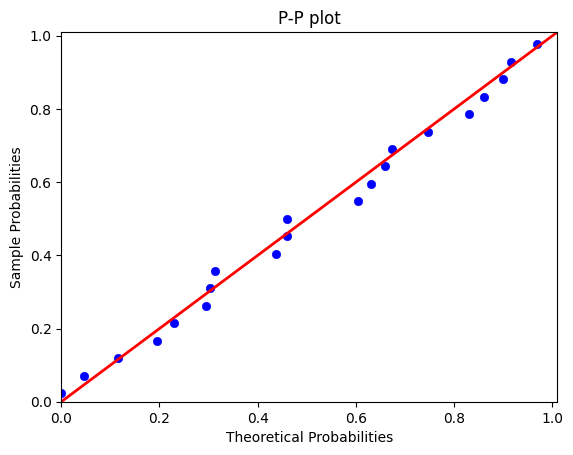



TEA_caja Distr. Uniforme
Parámetro estimado: a = 0.0
Parámetro estimado: b = 212.49


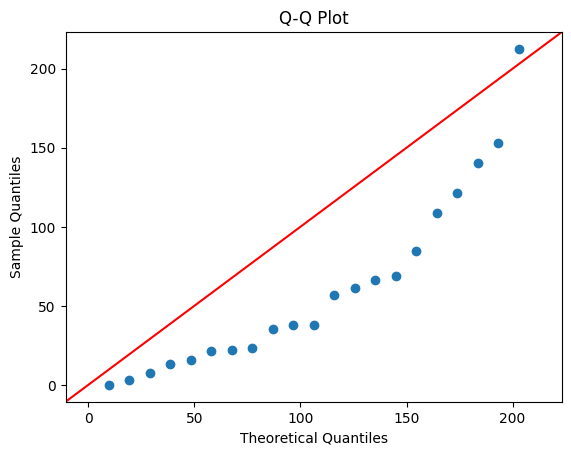

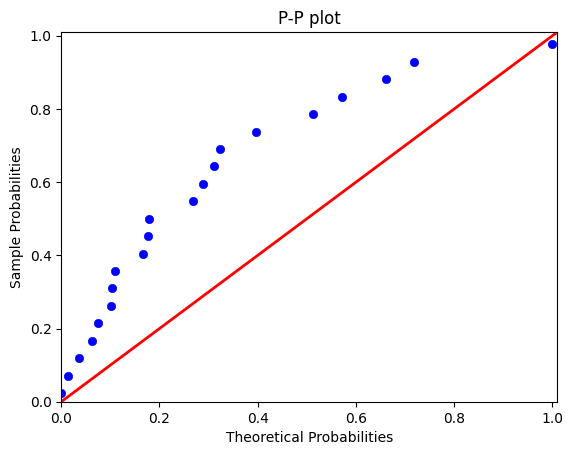



TEA_caja Distr. Weibull
Parámetro estimado: Escala = 65.10968579656969
Parámetro estimado: Forma = 1.1396197601034217


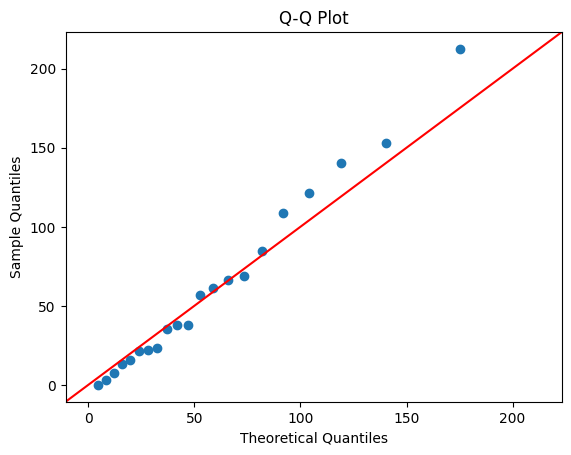

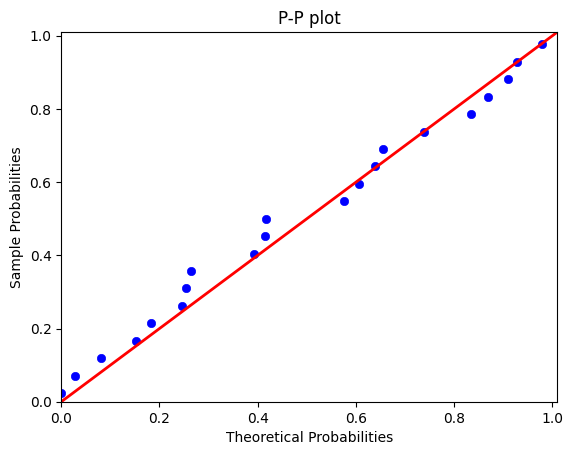



TEA_caja Distr. LogNorm
Parámetro estimado (normal asociada): Media = -inf
Parámetro estimado (normal asociada): Desviación Estándar = nan


c:\Users\user\Desktop\Andes\9\Simu\Proyecto\Git\simu\Proyecto\funciones_qq_pp_plot.py:97: RuntimeWarning: divide by zero encountered in log
  mean = np.mean(np.log(data))
c:\Users\user\Desktop\Andes\9\Simu\Proyecto\Git\simu\Proyecto\funciones_qq_pp_plot.py:103: RuntimeWarning: divide by zero encountered in log
  std_dev = np.std(np.log(data))
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


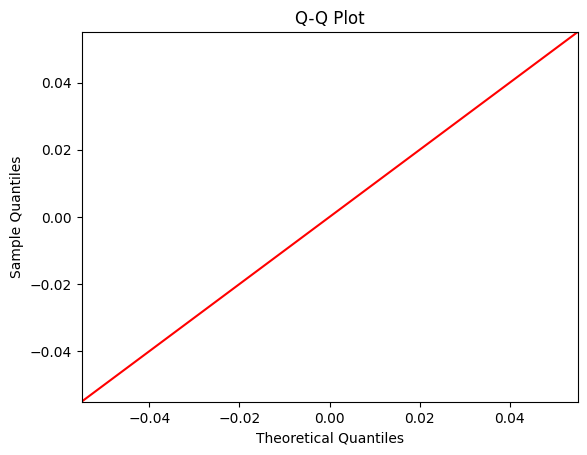

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2066: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2066: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


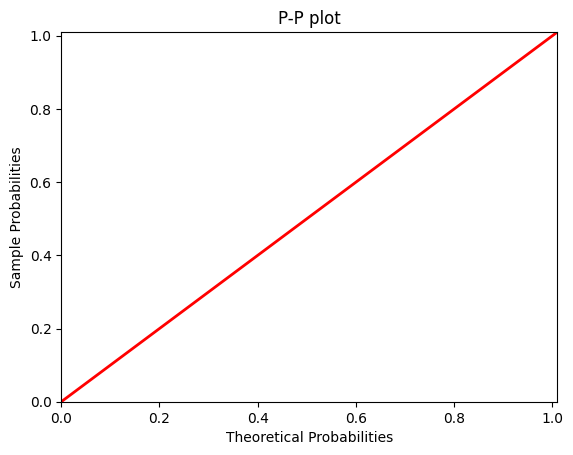



TEA_caja Distr. Triang
Parámetro estimado: a = 0.0
Parámetro estimado: b = 212.49
Parámetro estimado: c = 0.0


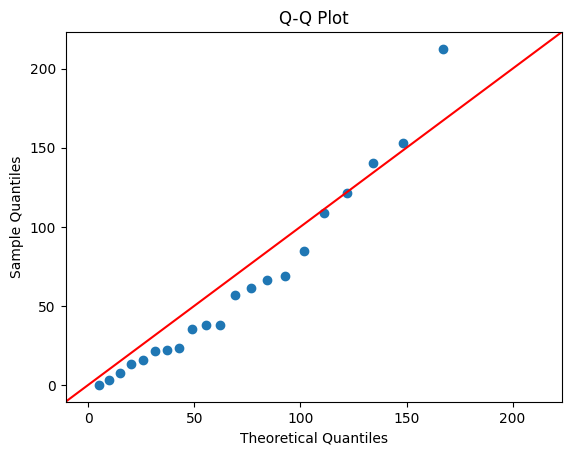

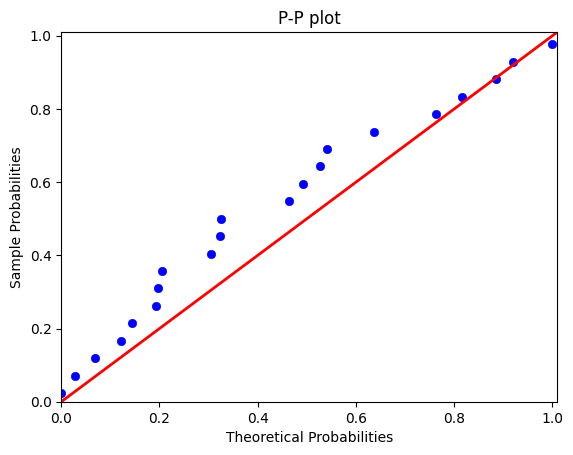

#############
#############
inicio_servicio_caja Distr. Normal Truncada
Parámetro estimado: Media = 46148.76190476191
Parámetro estimado: Desviación Estándar = 406.14622100232214


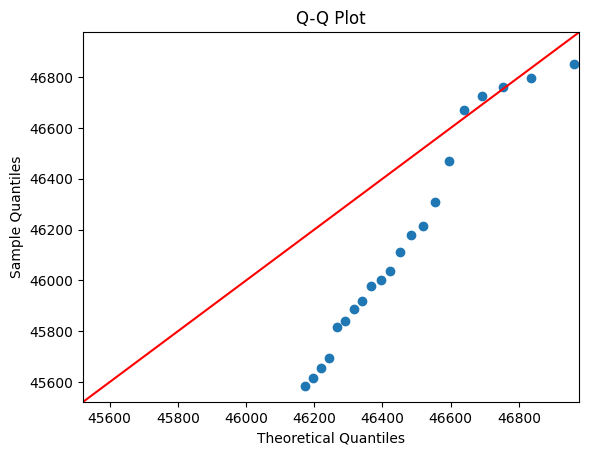

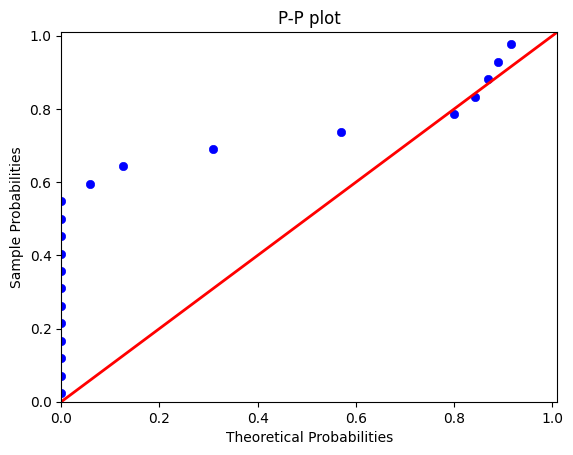



inicio_servicio_caja Distr. Normal
Parámetro estimado: Media = 46148.76190476191
Parámetro estimado: Desviación Estándar = 406.14622100232214


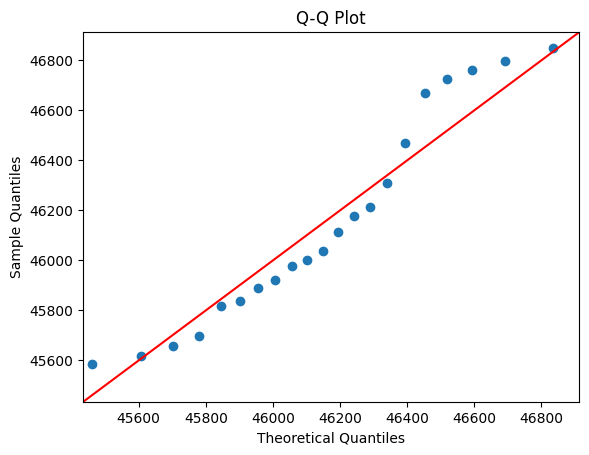

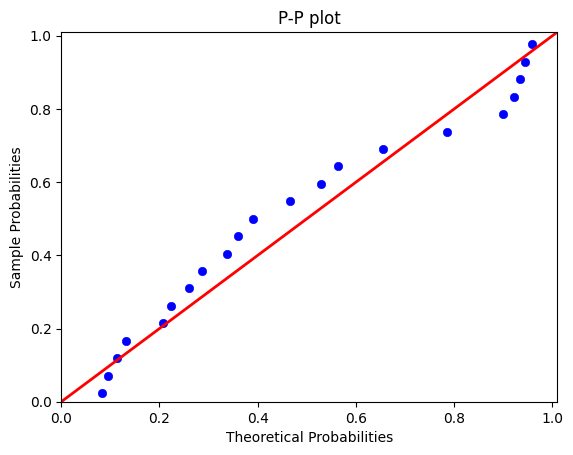



inicio_servicio_caja Distr. Exponencial
Parámetro estimado: Tasa = 2.166905370210623e-05


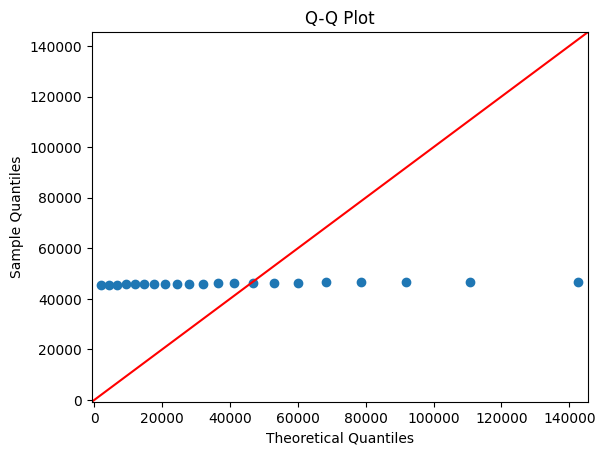

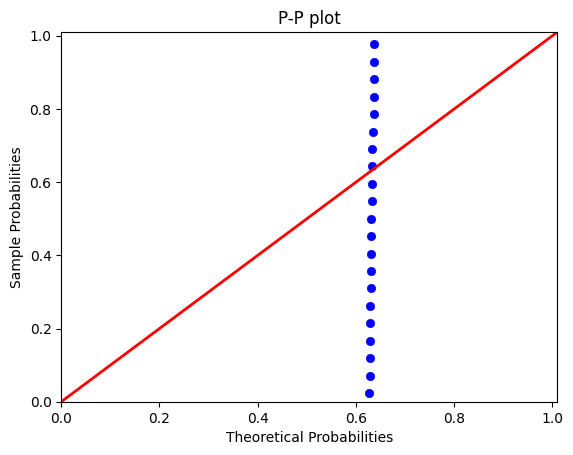



inicio_servicio_caja Distr. Uniforme
Parámetro estimado: a = 45586.0
Parámetro estimado: b = 46850.0


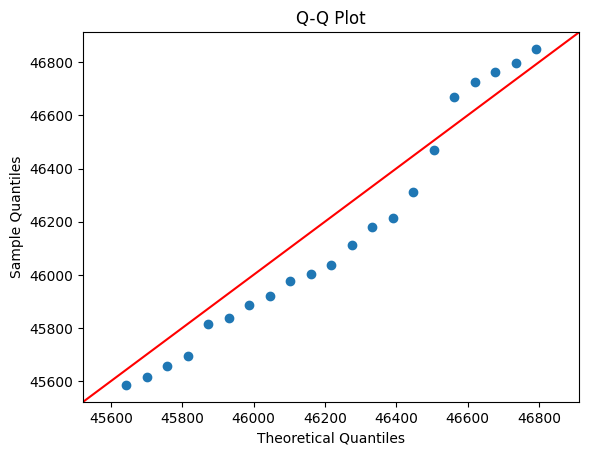

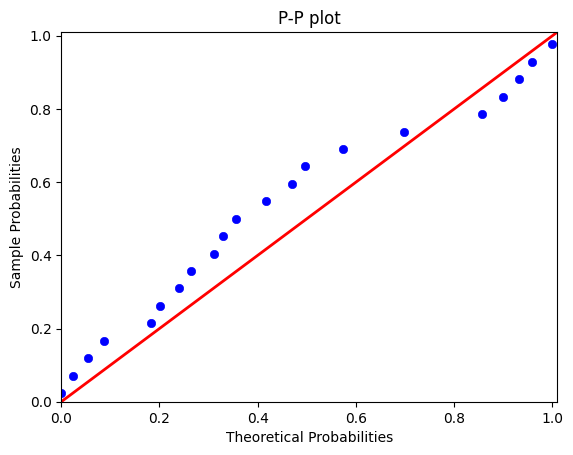



inicio_servicio_caja Distr. Weibull
Parámetro estimado: Escala = 46356.94430368277
Parámetro estimado: Forma = 116.04304286505678


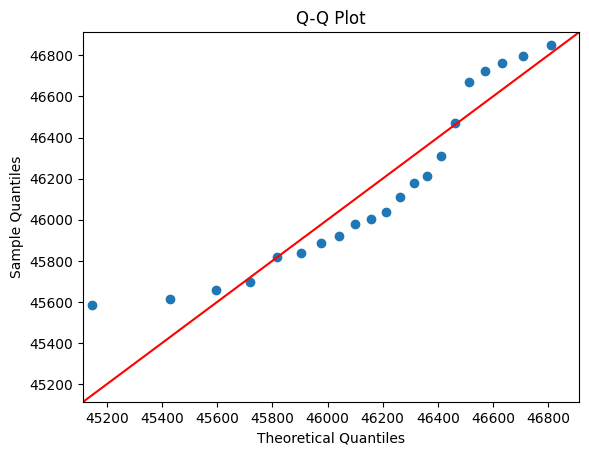

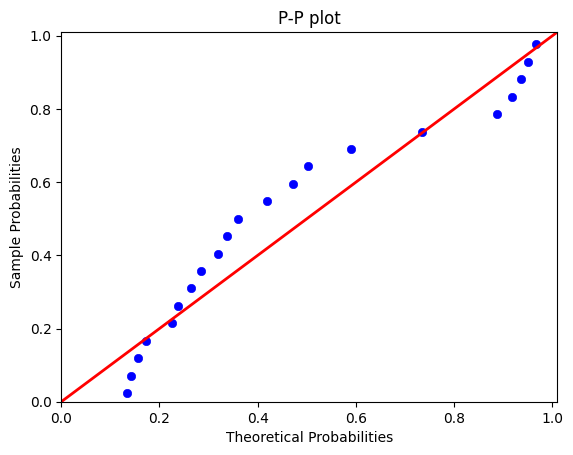



inicio_servicio_caja Distr. LogNorm
Parámetro estimado (normal asociada): Media = 10.739586774292711
Parámetro estimado (normal asociada): Desviación Estándar = 0.00878556873237612


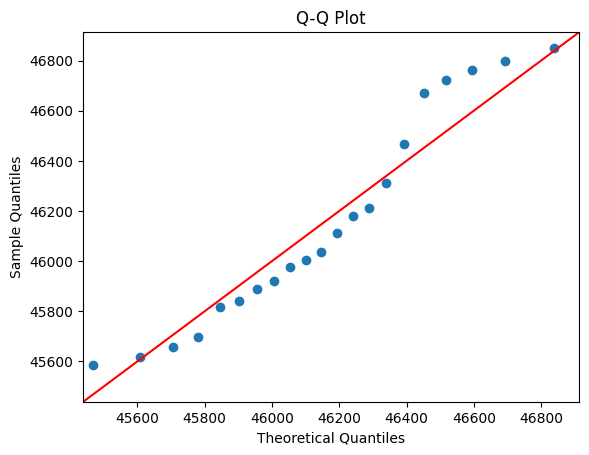

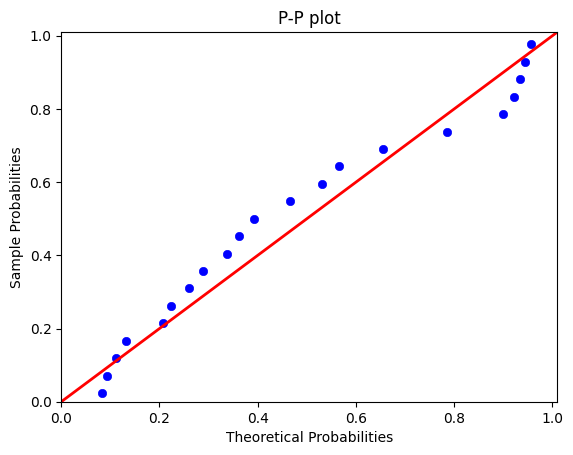



inicio_servicio_caja Distr. Triang
Parámetro estimado: a = 45586.0
Parámetro estimado: b = 46850.0
Parámetro estimado: c = 45586.0


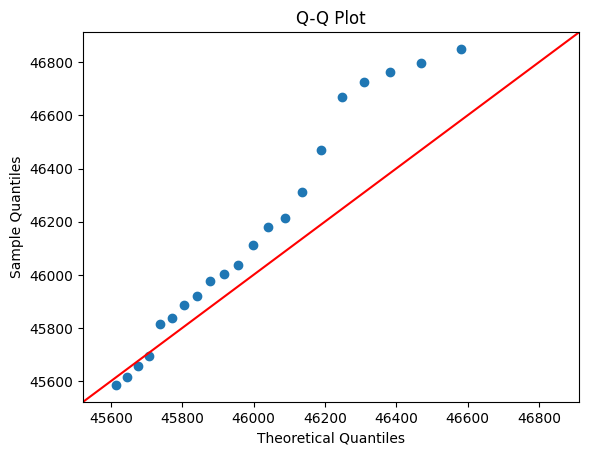

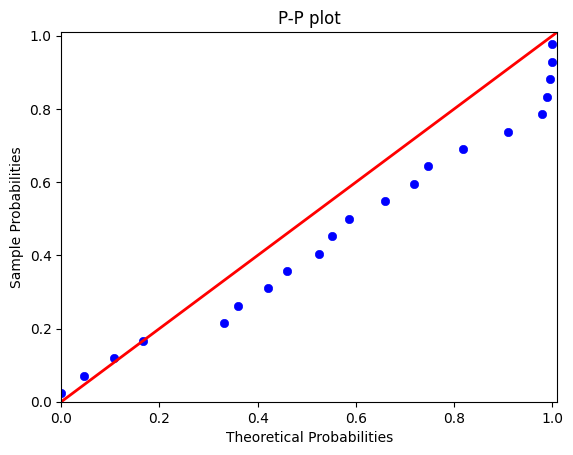

#############
#############
fin_servicio_caja Distr. Normal Truncada
Parámetro estimado: Media = 46187.47619047619
Parámetro estimado: Desviación Estándar = 405.1484876587276


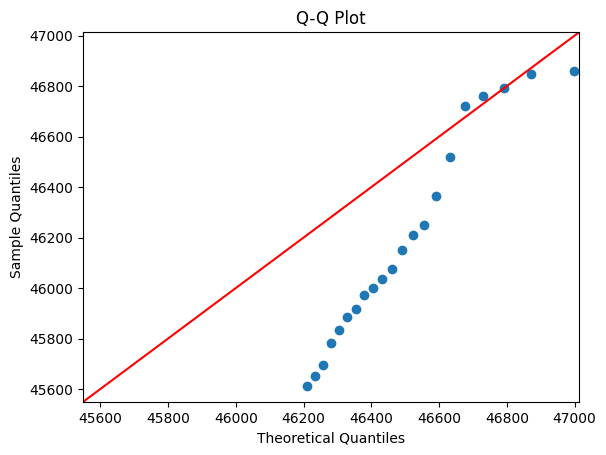

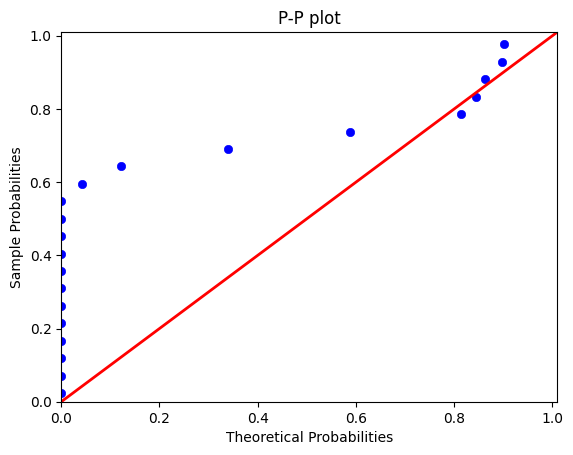



fin_servicio_caja Distr. Normal
Parámetro estimado: Media = 46187.47619047619
Parámetro estimado: Desviación Estándar = 405.1484876587276


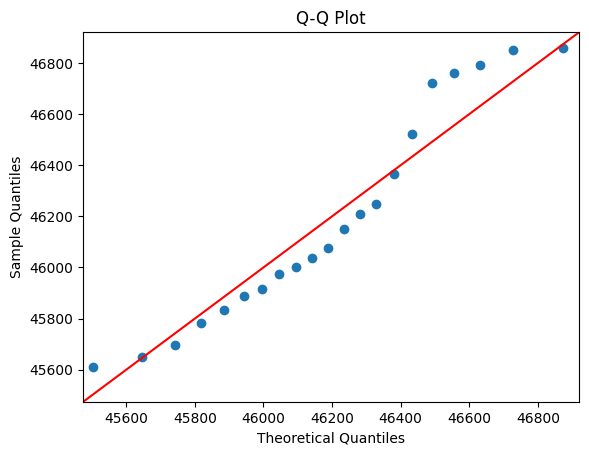

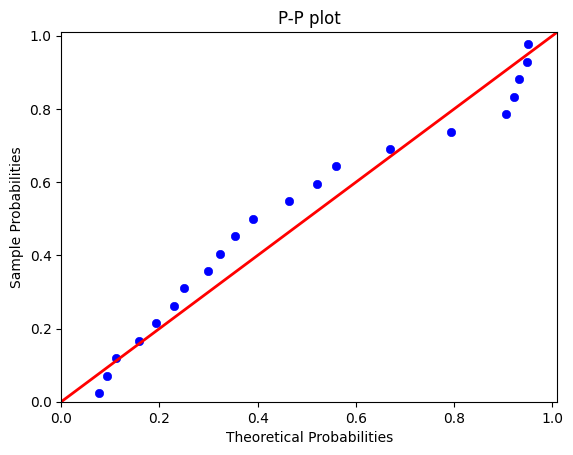



fin_servicio_caja Distr. Exponencial
Parámetro estimado: Tasa = 2.1650890727954496e-05


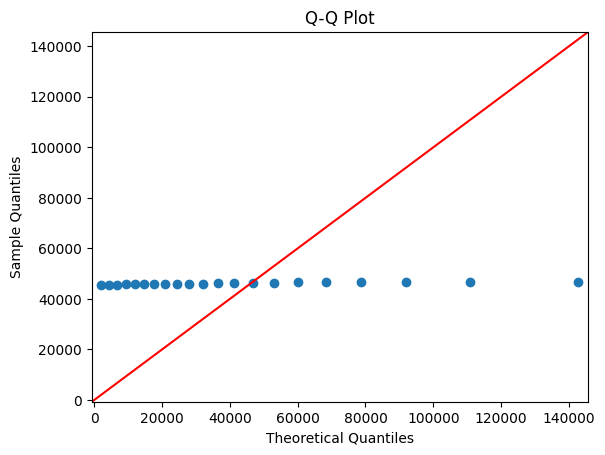

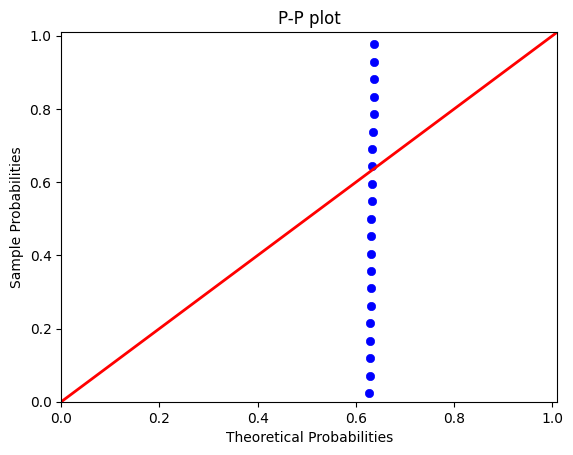



fin_servicio_caja Distr. Uniforme
Parámetro estimado: a = 45612.0
Parámetro estimado: b = 46858.0


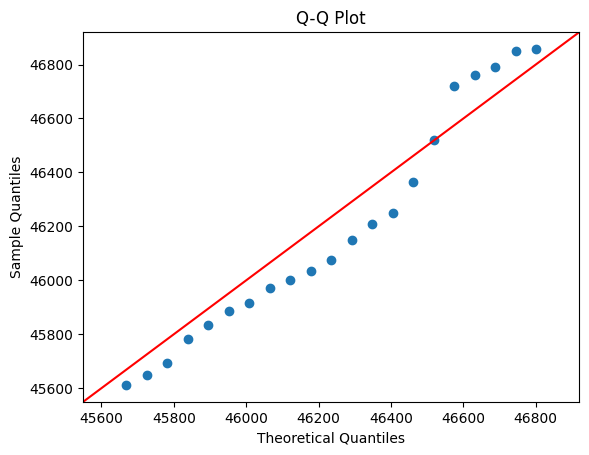

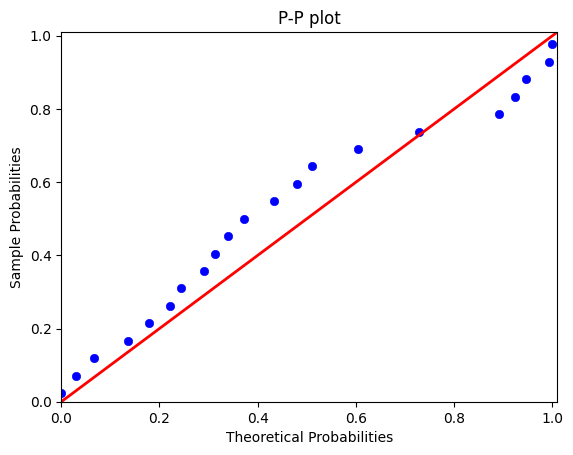



fin_servicio_caja Distr. Weibull
Parámetro estimado: Escala = 46394.960805596755
Parámetro estimado: Forma = 116.91101972742268


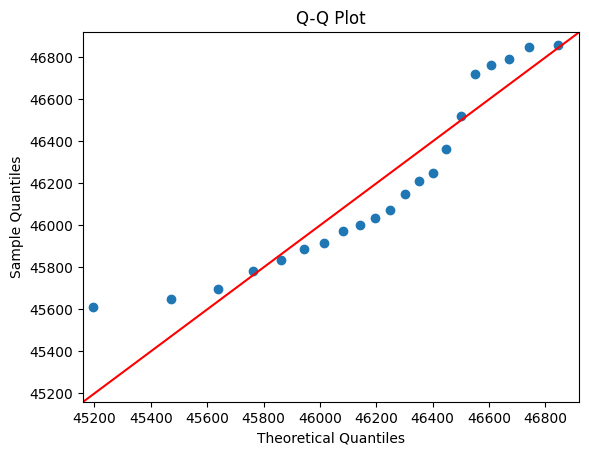

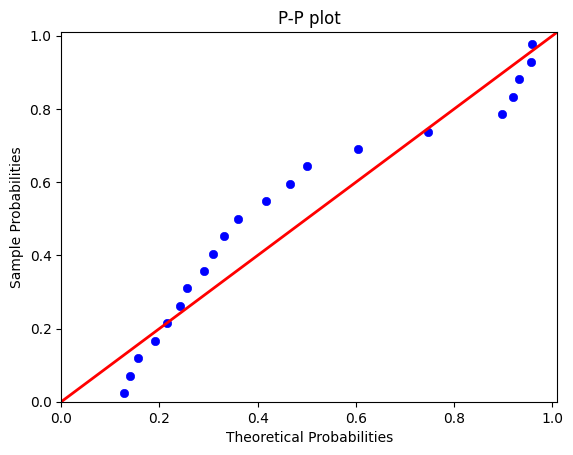



fin_servicio_caja Distr. LogNorm
Parámetro estimado (normal asociada): Media = 10.740425575838408
Parámetro estimado (normal asociada): Desviación Estándar = 0.008757107463938906


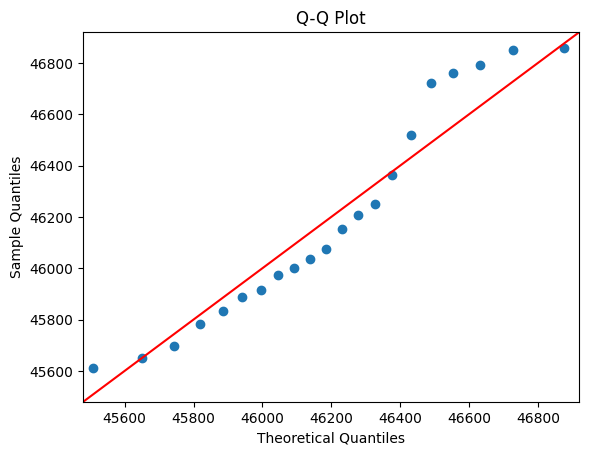

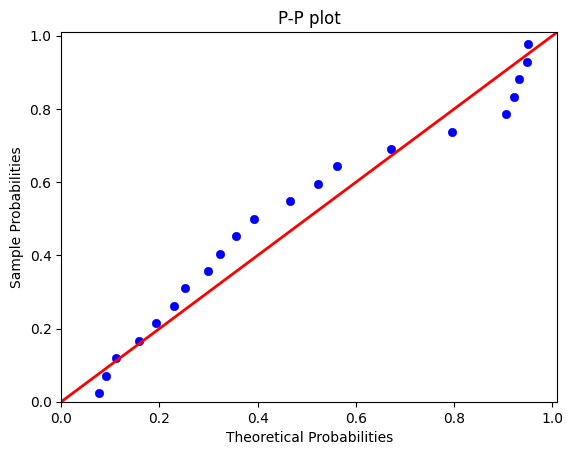



fin_servicio_caja Distr. Triang
Parámetro estimado: a = 45612.0
Parámetro estimado: b = 46858.0
Parámetro estimado: c = 45612.0


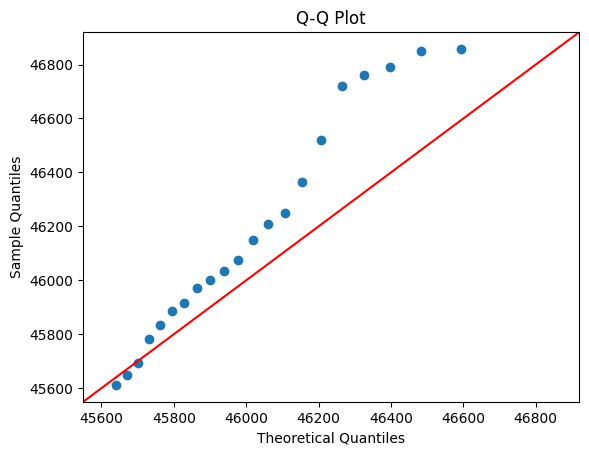

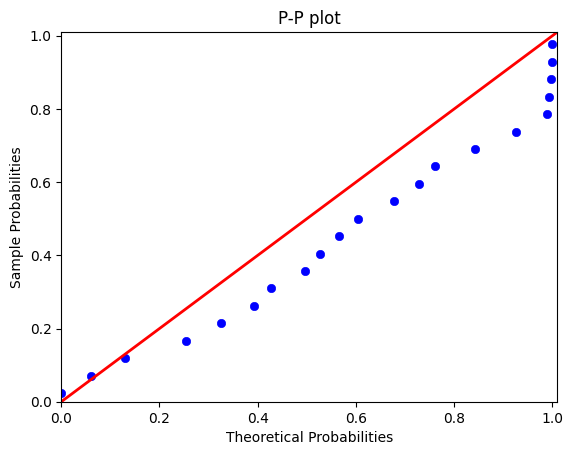

#############
#############
ts_caja_seg Distr. Normal Truncada
Parámetro estimado: Media = 38.81809523809524
Parámetro estimado: Desviación Estándar = 15.970655715747231


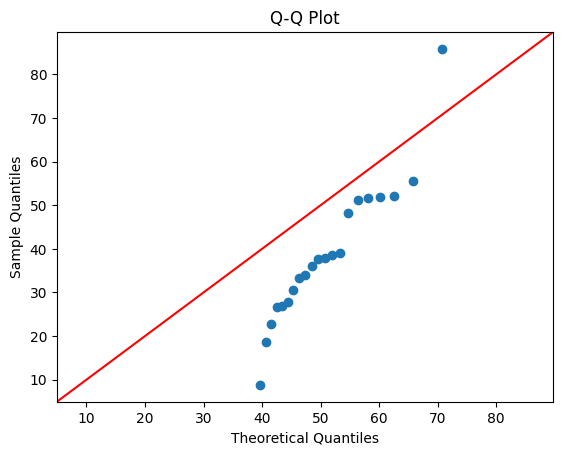

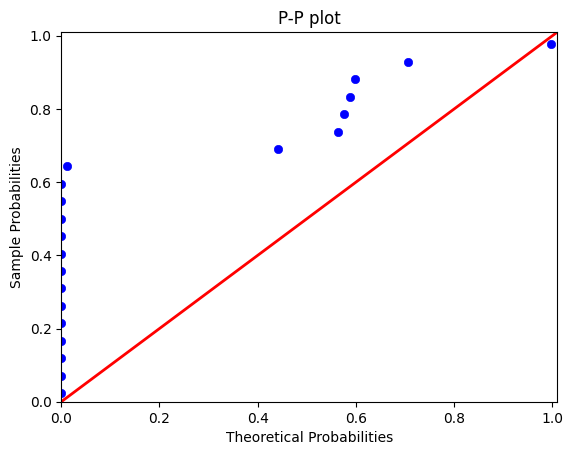



ts_caja_seg Distr. Normal
Parámetro estimado: Media = 38.81809523809524
Parámetro estimado: Desviación Estándar = 15.970655715747231


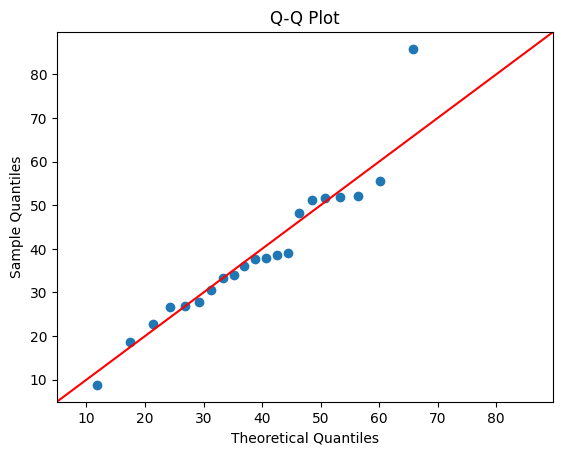

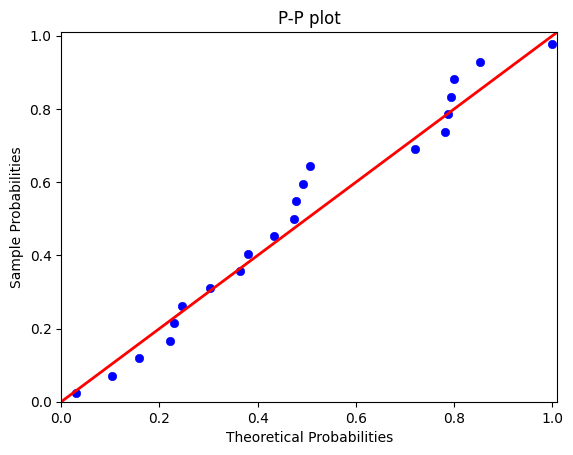



ts_caja_seg Distr. Exponencial
Parámetro estimado: Tasa = 0.025761181579528447


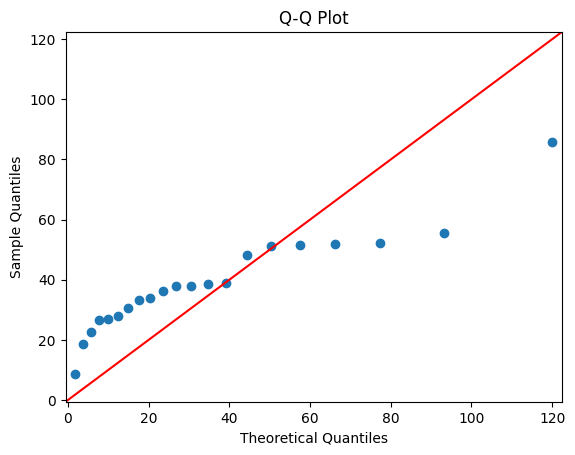

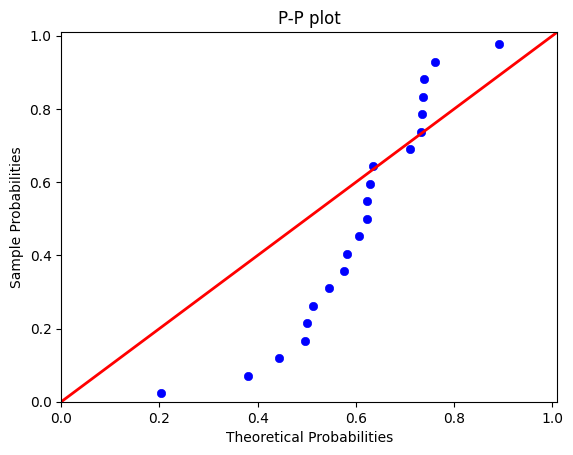



ts_caja_seg Distr. Uniforme
Parámetro estimado: a = 8.81
Parámetro estimado: b = 85.83


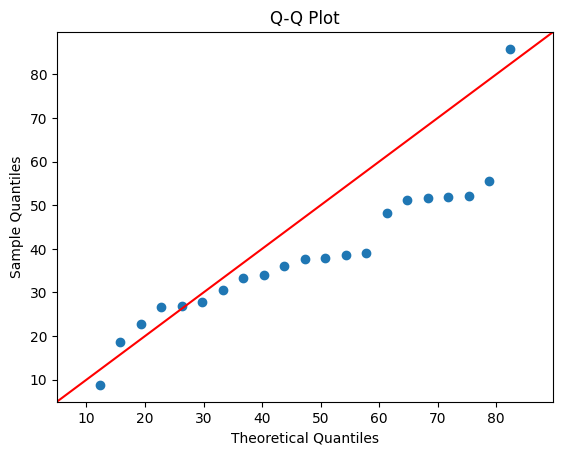

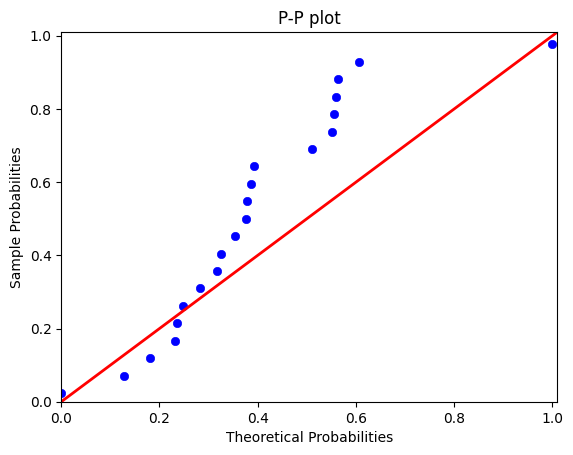



ts_caja_seg Distr. Weibull
Parámetro estimado: Escala = 43.67148670348192
Parámetro estimado: Forma = 2.5456976284079653


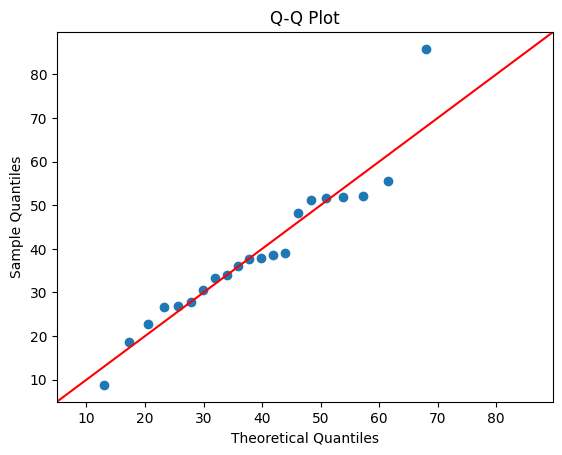

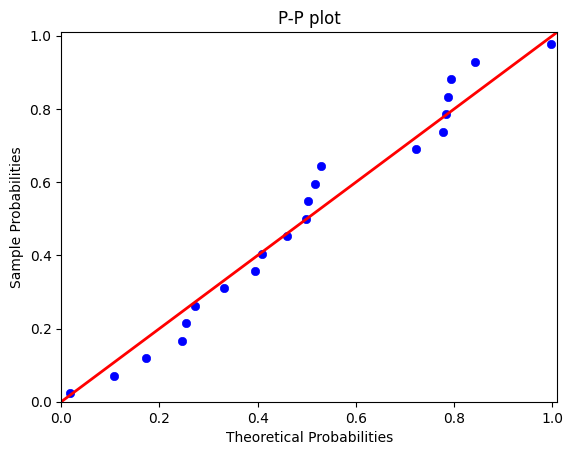



ts_caja_seg Distr. LogNorm
Parámetro estimado (normal asociada): Media = 3.5653314178226547
Parámetro estimado (normal asociada): Desviación Estándar = 0.46138326508955974


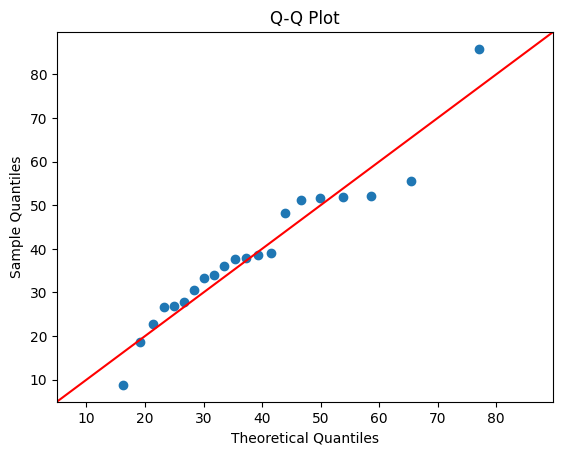

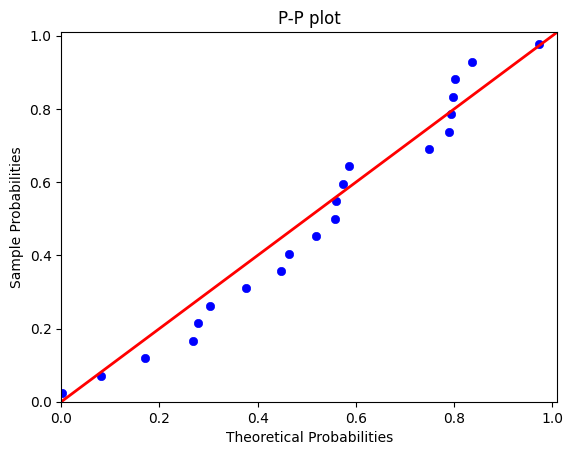



ts_caja_seg Distr. Triang
Parámetro estimado: a = 8.81
Parámetro estimado: b = 85.83
Parámetro estimado: c = 26.58


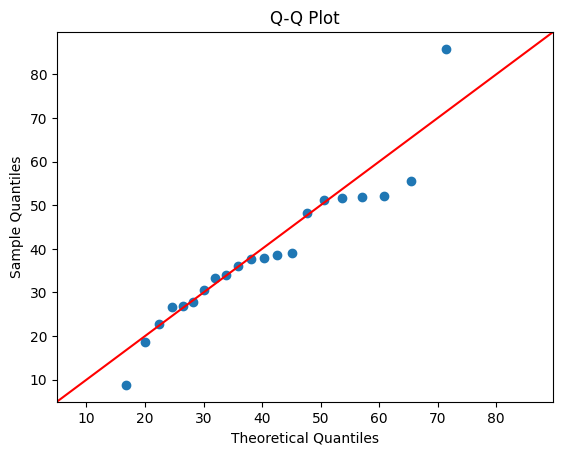

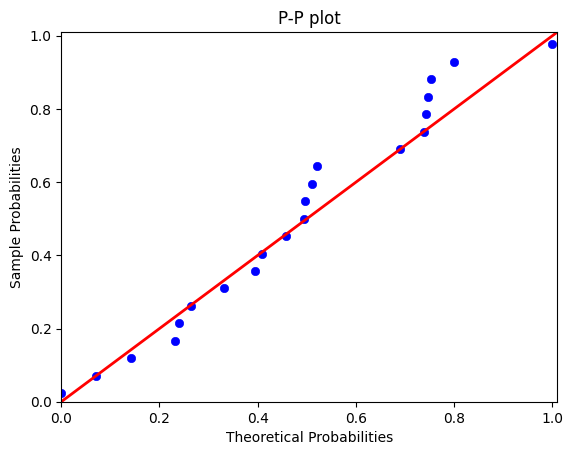

#############
#############
inicio_servicio_armado Distr. Normal Truncada
Parámetro estimado: Media = 46457.04761904762
Parámetro estimado: Desviación Estándar = 435.06884799343084


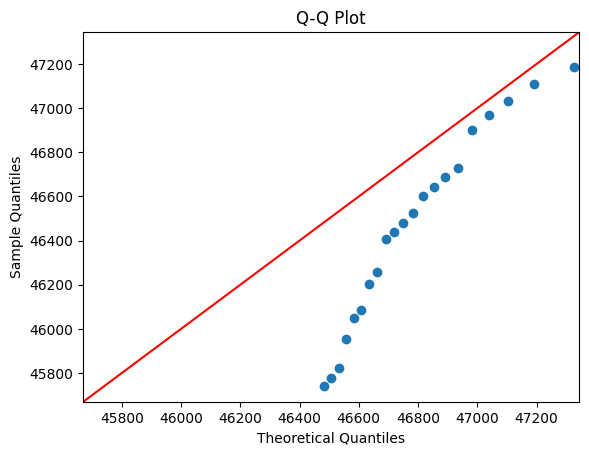

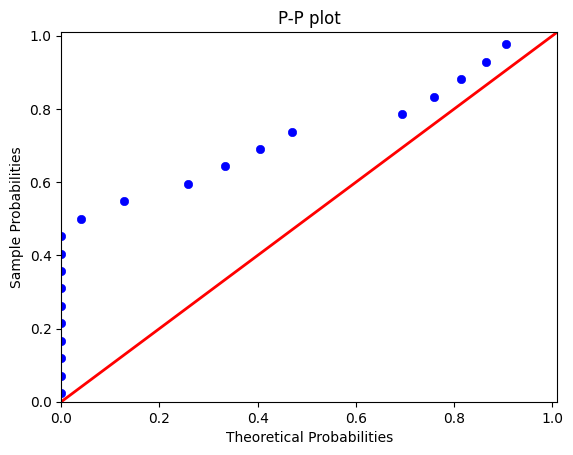



inicio_servicio_armado Distr. Normal
Parámetro estimado: Media = 46457.04761904762
Parámetro estimado: Desviación Estándar = 435.06884799343084


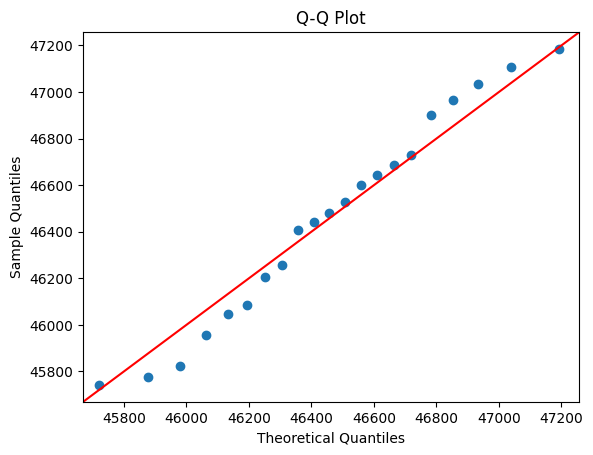

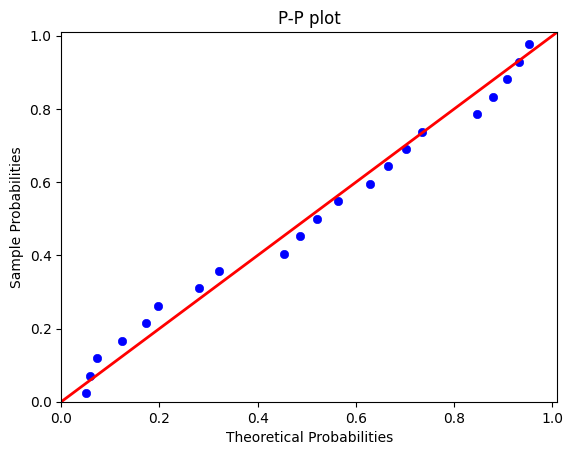



inicio_servicio_armado Distr. Exponencial
Parámetro estimado: Tasa = 2.1525259379375523e-05


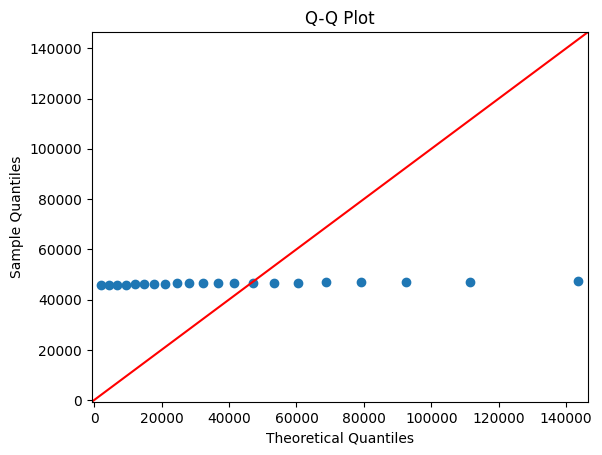

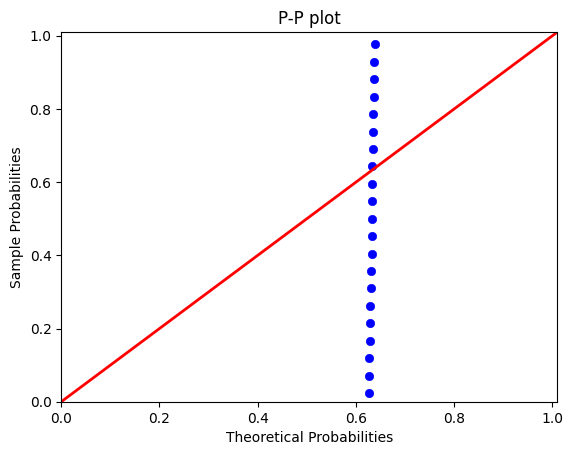



inicio_servicio_armado Distr. Uniforme
Parámetro estimado: a = 45742.0
Parámetro estimado: b = 47185.0


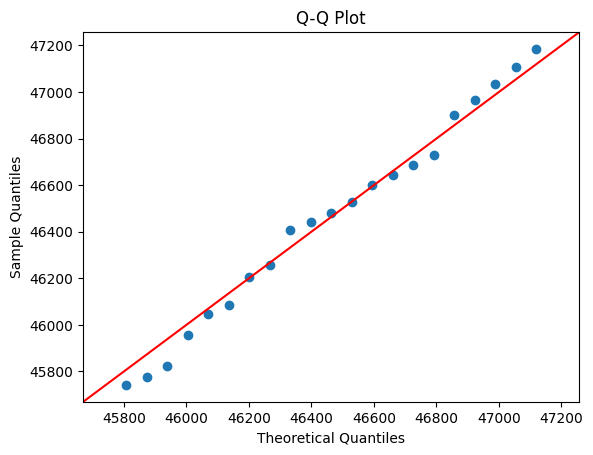

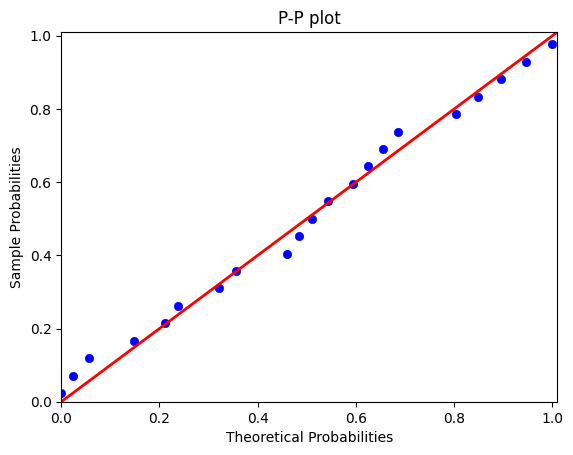



inicio_servicio_armado Distr. Weibull
Parámetro estimado: Escala = 46670.80903473926
Parámetro estimado: Forma = 118.63004158988328


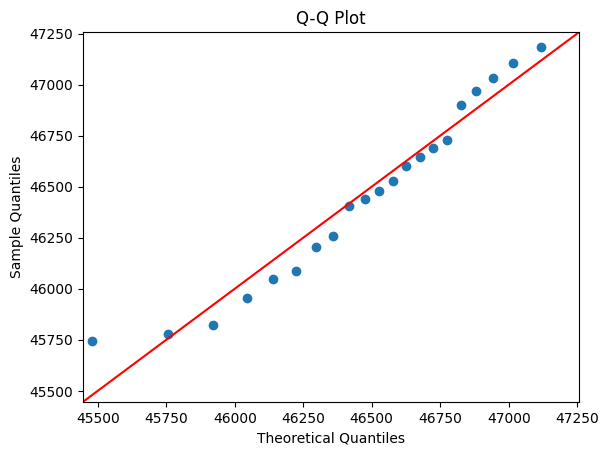

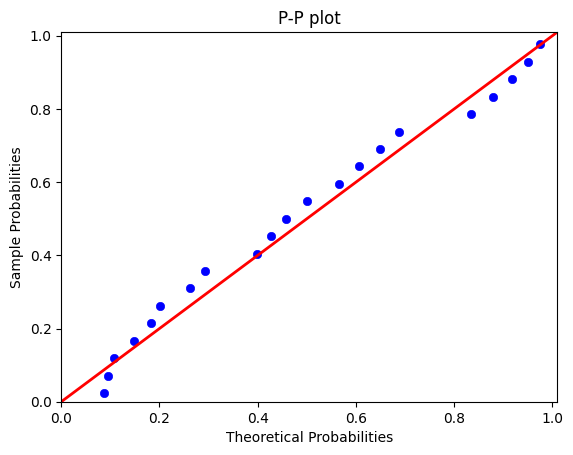



inicio_servicio_armado Distr. LogNorm
Parámetro estimado (normal asociada): Media = 10.746239588020828
Parámetro estimado (normal asociada): Desviación Estándar = 0.009367917428705656


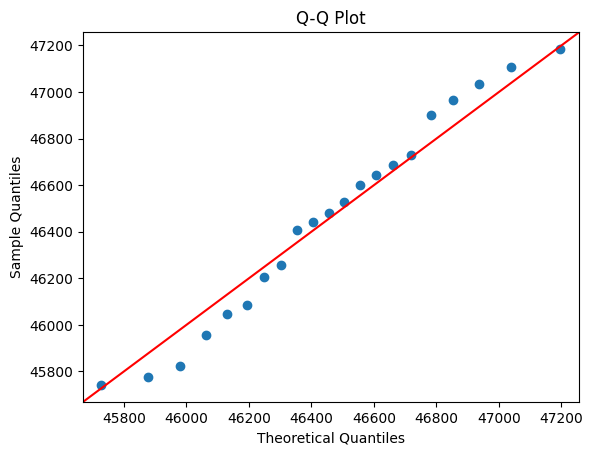

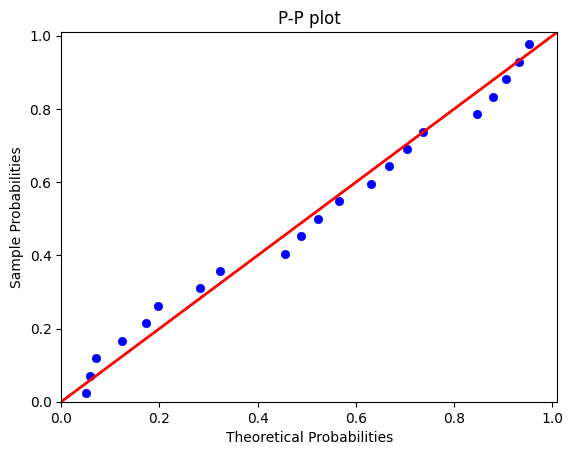



inicio_servicio_armado Distr. Triang
Parámetro estimado: a = 45742.0
Parámetro estimado: b = 47185.0
Parámetro estimado: c = 45742.0


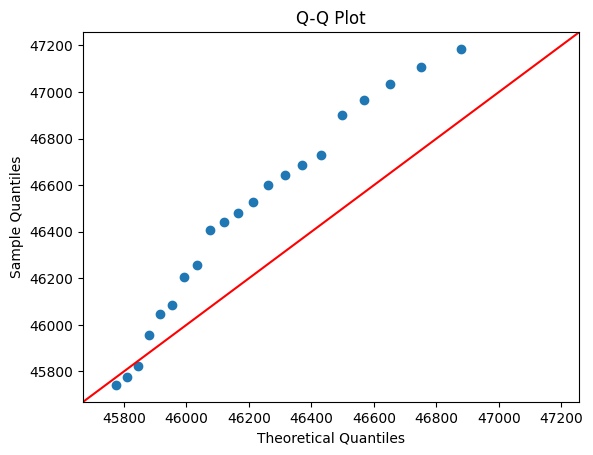

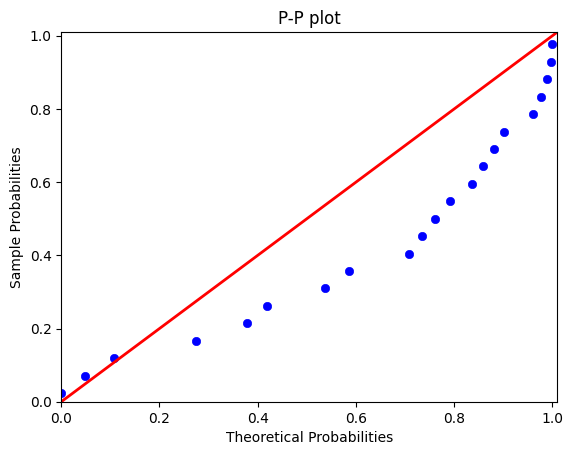

#############
#############
fin_servicio_armado Distr. Normal Truncada
Parámetro estimado: Media = 46553.90476190476
Parámetro estimado: Desviación Estándar = 390.9819024872665


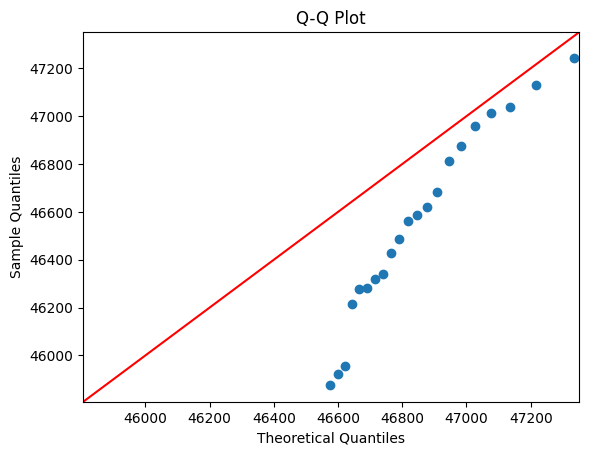

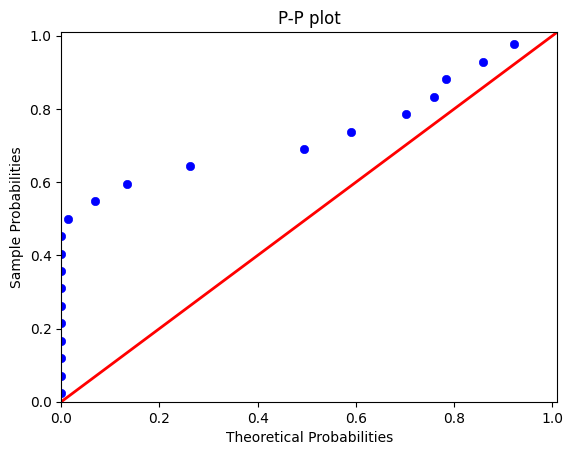



fin_servicio_armado Distr. Normal
Parámetro estimado: Media = 46553.90476190476
Parámetro estimado: Desviación Estándar = 390.9819024872665


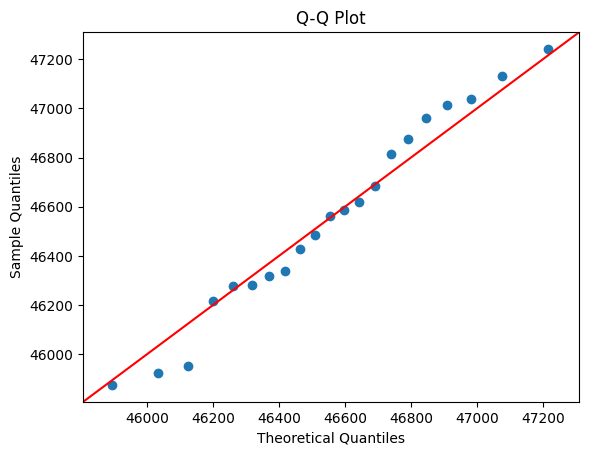

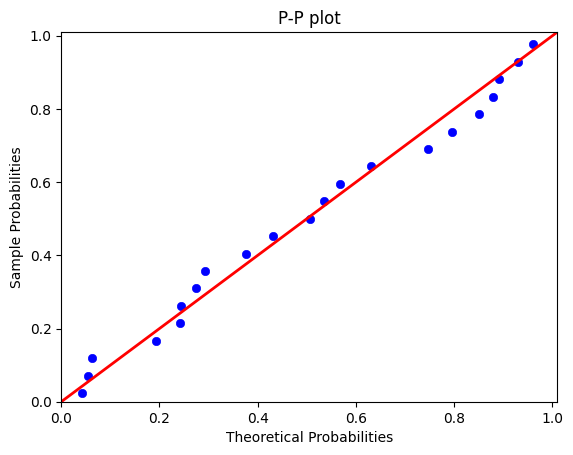



fin_servicio_armado Distr. Exponencial
Parámetro estimado: Tasa = 2.1480475270858565e-05


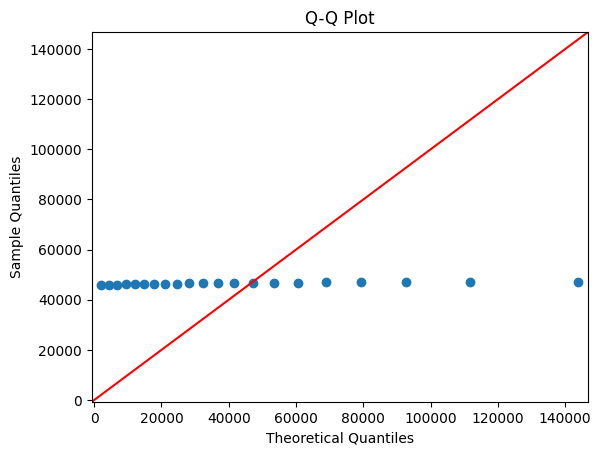

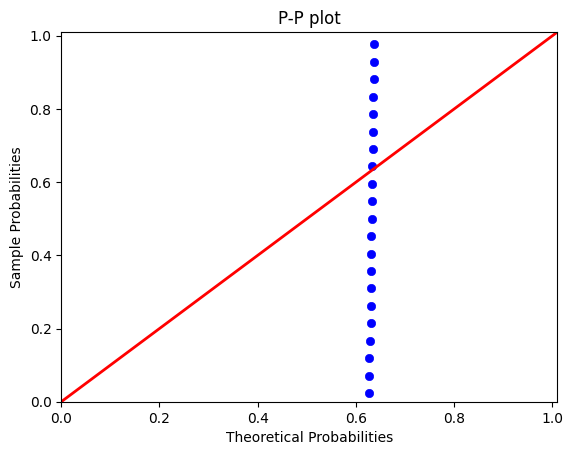



fin_servicio_armado Distr. Uniforme
Parámetro estimado: a = 45875.0
Parámetro estimado: b = 47242.0


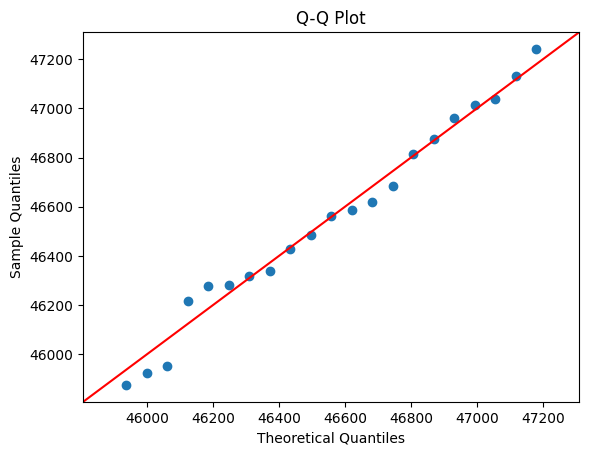

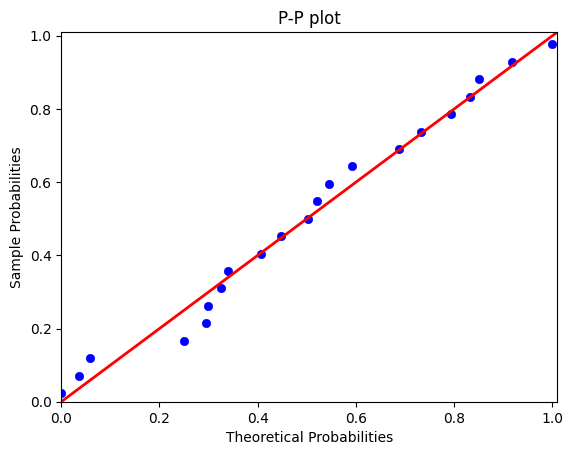



fin_servicio_armado Distr. Weibull
Parámetro estimado: Escala = 46746.856188988866
Parámetro estimado: Forma = 130.53462995587233


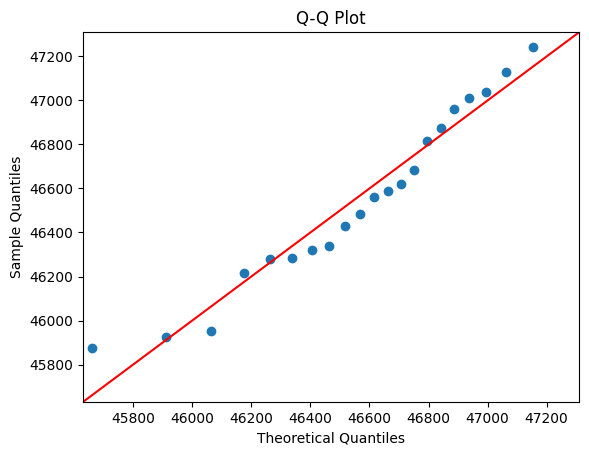

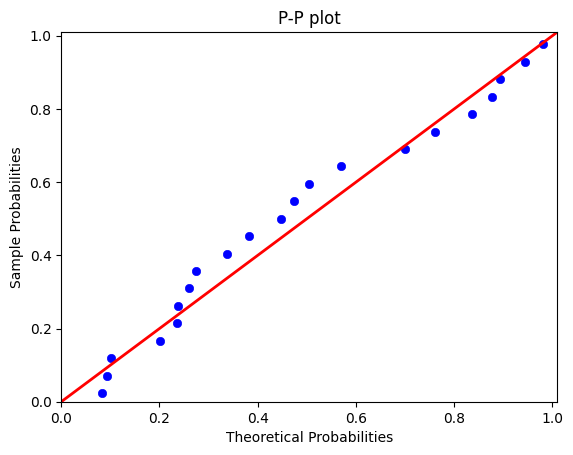



fin_servicio_armado Distr. LogNorm
Parámetro estimado (normal asociada): Media = 10.748330886960852
Parámetro estimado (normal asociada): Desviación Estándar = 0.00839996780543091


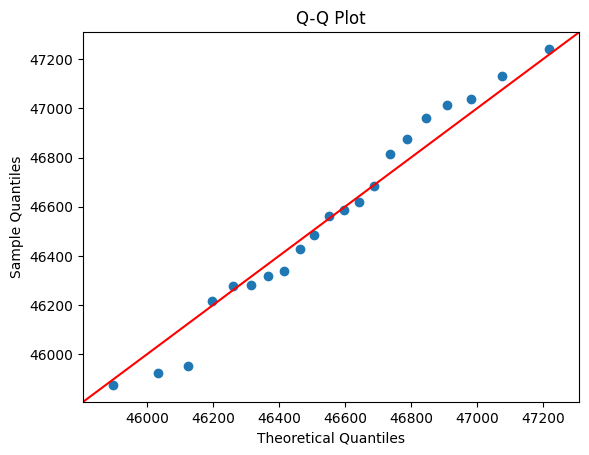

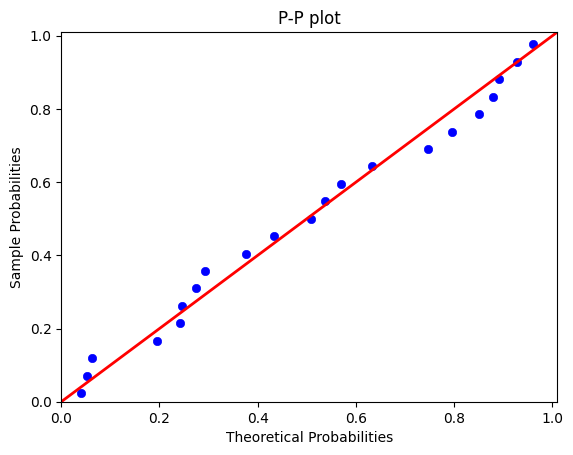



fin_servicio_armado Distr. Triang
Parámetro estimado: a = 45875.0
Parámetro estimado: b = 47242.0
Parámetro estimado: c = 45875.0


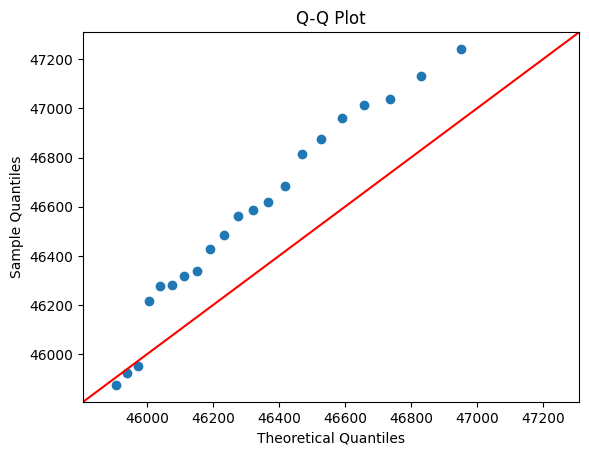

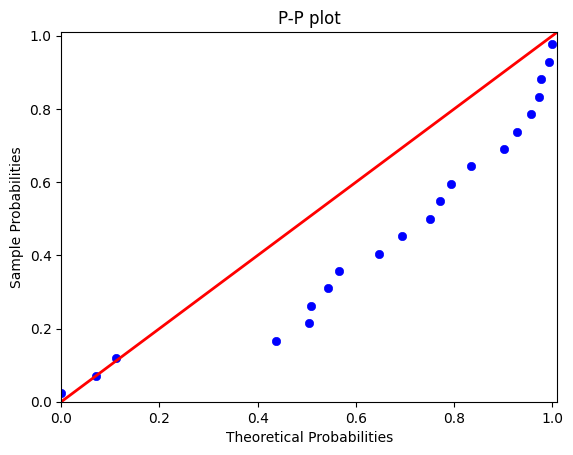

#############


In [38]:
for i in [_ for _ in df.columns.tolist() if _ != "ts_armado_seg"]:
    series = np.array(df[i]).flatten()
    series = series.astype(float)
    print("#############")
    print(f"{i} Distr. Normal Truncada")
    PP_QQ_plot_truncated_normal(series,media="estimado",desvesta="estimado")
    print("\n")
    print(f"{i} Distr. Normal")
    PP_QQ_plot_normal(series,media="estimado",desvesta="estimado")
    print("\n")
    print(f"{i} Distr. Exponencial")
    PP_QQ_plot_exponential(series,tasa="estimado")    
    print("\n")
    print(f"{i} Distr. Uniforme")
    PP_QQ_plot_uniform(series,minimo="estimado",maximo="estimado")
    print("\n")
    print(f"{i} Distr. Weibull")
    PP_QQ_plot_weibull(series,forma="estimado",escala="estimado")
    print("\n")
    print(f"{i} Distr. LogNorm")
    PP_QQ_plot_lognormal(series,media="estimado",desvesta="estimado")
    print("\n")
    print(f"{i} Distr. Triang")
    PP_QQ_plot_triangular(series,minimo="estimado",maximo="estimado",moda="estimado")
    print("#############")

In [39]:
for i in df.columns.tolist():
    series = np.array(df[i]).flatten()
    series = series.astype(float)
    data = series
    print("#############")
    print(f"{i} Distr. Normal Truncada")
    truncated_chi_square_normal_goodness_of_fit(data,media="estimado",desvesta="estimado",r=2)
    print("\n")

    print(f"{i} Distr. Normal")
    chi_square_normal_goodness_of_fit(data,media="estimado",desvesta="estimado",r=2)
    print("\n")

    print(f"{i} Distr. Exponencial")
    chi_square_exponential_goodness_of_fit(data,tasa="estimado",r=1)

    print("\n")
    print(f"{i} Distr. Uniforme")
    chi_square_uniform_goodness_of_fit(data,minimo="estimado",maximo="estimado",r=2)

    print("\n")
    print(f"{i} Distr. Weibull")
    chi_square_weibull_goodness_of_fit(data,forma="estimado",escala="estimado",r=2)
    print("\n")

    print(f"{i} Distr. LogNorm")
    chi_square_lognormal_goodness_of_fit(data,media="estimado",desvesta="estimado",r=2)
    print("\n")
    print(f"{i} Distr. Triang")
    chi_square_triangular_goodness_of_fit(data,minimo="estimado",maximo="estimado",moda="estimado",r=3)
    print("#############")

#############
llegada_fila Distr. Normal Truncada
Parámetro estimado: Media = 45979.52380952381
Parámetro estimado: Desviación Estándar = 361.2584642669776
Chi-squared statistic: 14.416666666667226
p-value: 0.0001464999727893712
 No sigue la distribución


llegada_fila Distr. Normal
Parámetro estimado: Media = 45979.52380952381
Parámetro estimado: Desviación Estándar = 361.2584642669776
Chi-squared statistic: 0.8928571428571983
p-value: 0.3447042220069425
 Sigue la distribucion


llegada_fila Distr. Exponencial
Parámetro estimado: Tasa = 2.1748811582795654e-05
Chi-squared statistic: 57.75
p-value: 2.8821389719269064e-13
 No sigue la distribucion


llegada_fila Distr. Uniforme
Parámetro estimado: a = 45486.0
Parámetro estimado: b = 46708.0
Chi-squared statistic: 0.7023809523809523
p-value: 0.4019848144297996
 Sigue la distribucion


llegada_fila Distr. Weibull
Parámetro estimado: Escala = 46165.3542870777
Parámetro estimado: Forma = 125.24582324141484
Chi-squared statistic: 0.0037533119

c:\Users\user\Desktop\Andes\9\Simu\Proyecto\Git\simu\Proyecto\funcioneschicuadrado_continuas.py:164: RuntimeWarning: divide by zero encountered in log
  mean = np.mean(np.log(data))
c:\Users\user\Desktop\Andes\9\Simu\Proyecto\Git\simu\Proyecto\funcioneschicuadrado_continuas.py:170: RuntimeWarning: divide by zero encountered in log
  std_dev = np.std(np.log(data))
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


Parámetro estimado: Escala = 46670.80903473926
Parámetro estimado: Forma = 118.63004158988328
Chi-squared statistic: 0.01402224810310474
p-value: 0.9057383865407002
 Sigue la distribucion


inicio_servicio_armado Distr. LogNorm
Parámetro estimado (lognormal asociada): Media = 10.746239588020828
Parámetro estimado (lognormal asociada): Desviación Estándar = 0.009367917428705656
Chi-squared statistic: 0.5238095238095646
p-value: 0.4692211560417221
 Sigue la distribucion


inicio_servicio_armado Distr. Triang
Parámetro estimado: a = 45742.0
Parámetro estimado: b = 47185.0
Parámetro estimado: c = 45742.0
Chi-squared statistic: 13.546938775510204
p-value: nan
 No sigue la distribucion
#############
#############
fin_servicio_armado Distr. Normal Truncada
Parámetro estimado: Media = 46553.90476190476
Parámetro estimado: Desviación Estándar = 390.9819024872665
Chi-squared statistic: 15.464285714285197
p-value: 8.407901381646266e-05
 No sigue la distribución


fin_servicio_armado Distr. Normal

## Pruebas de Bondad de Ajuste Pola

#############
llegada_fila Distr. Normal Truncada
Parámetro estimado: Media = 46334.65
Parámetro estimado: Desviación Estándar = 711.5396176601835


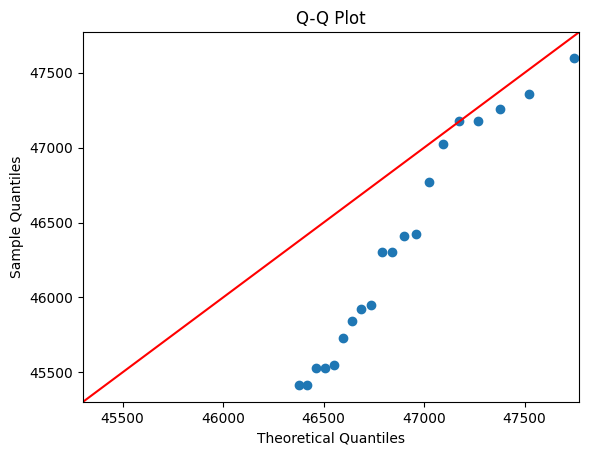

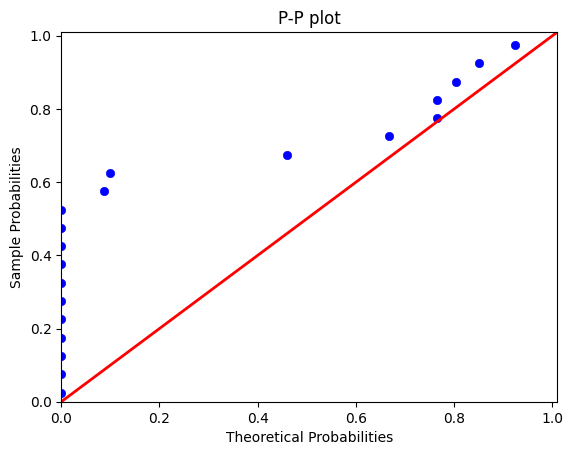



llegada_fila Distr. Normal
Parámetro estimado: Media = 46334.65
Parámetro estimado: Desviación Estándar = 711.5396176601835


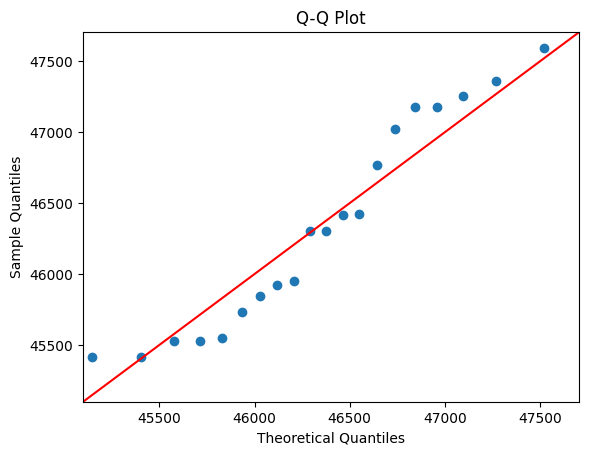

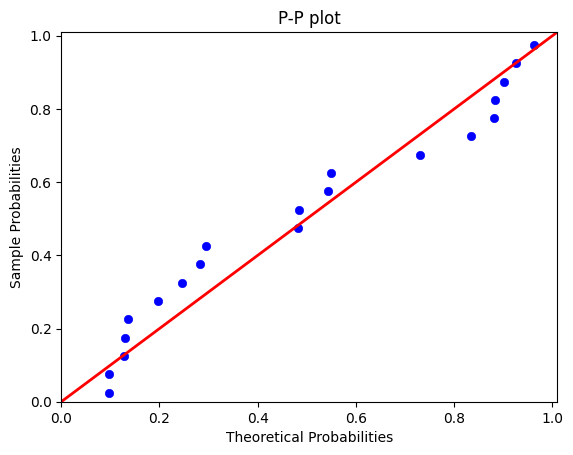



llegada_fila Distr. Exponencial
Parámetro estimado: Tasa = 2.158212050808628e-05


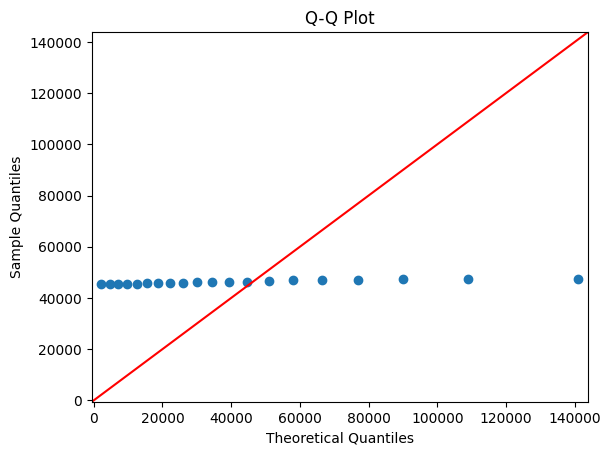

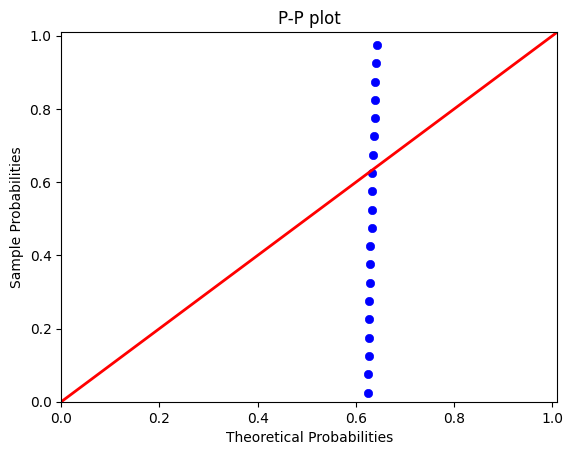



llegada_fila Distr. Uniforme
Parámetro estimado: a = 45413.0
Parámetro estimado: b = 47596.0


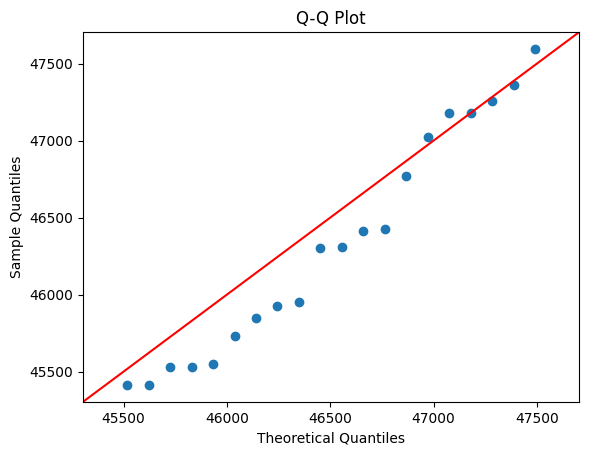

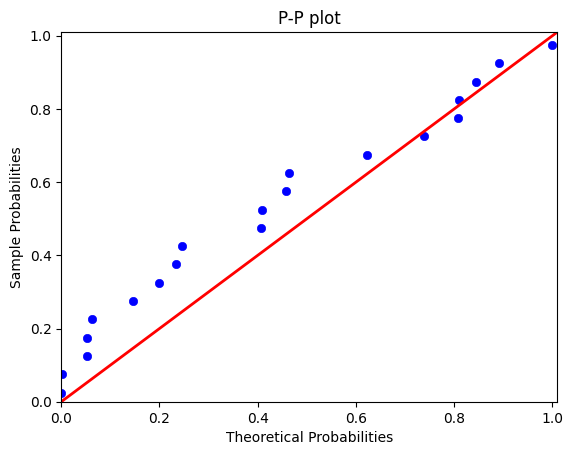



llegada_fila Distr. Weibull
Parámetro estimado: Escala = 46692.30084510437
Parámetro estimado: Forma = 69.02782934796628


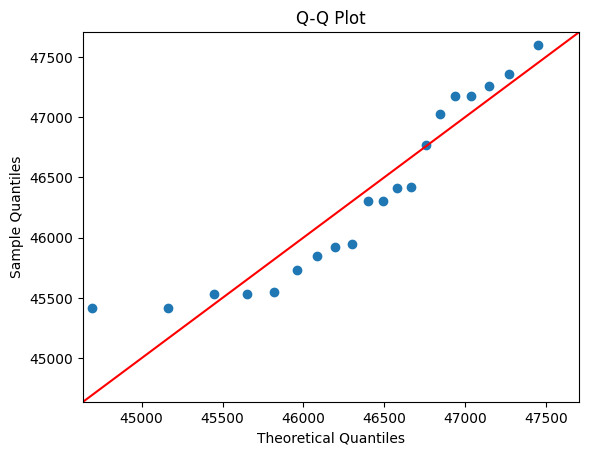

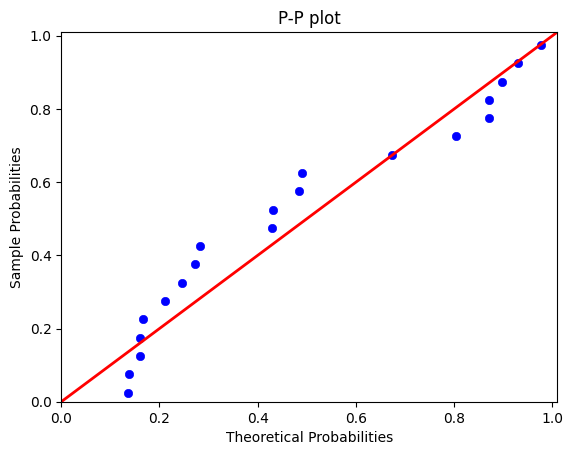



llegada_fila Distr. LogNorm
Parámetro estimado (normal asociada): Media = 10.743527728322846
Parámetro estimado (normal asociada): Desviación Estándar = 0.01532728922353934


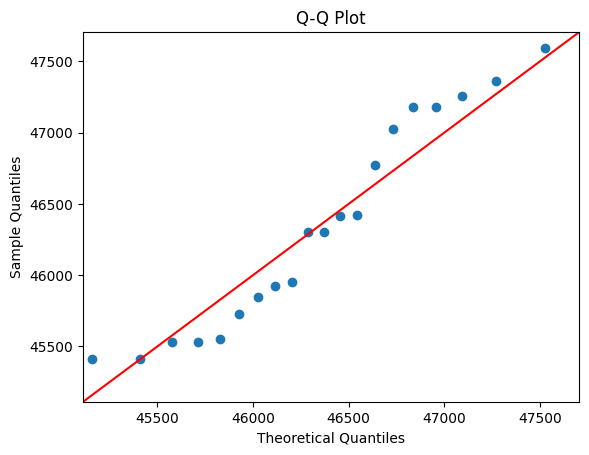

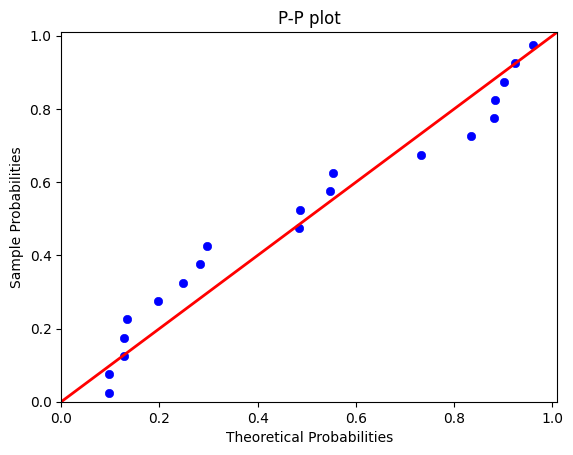



llegada_fila Distr. Triang
Parámetro estimado: a = 45413.0
Parámetro estimado: b = 47596.0
Parámetro estimado: c = 45413.0


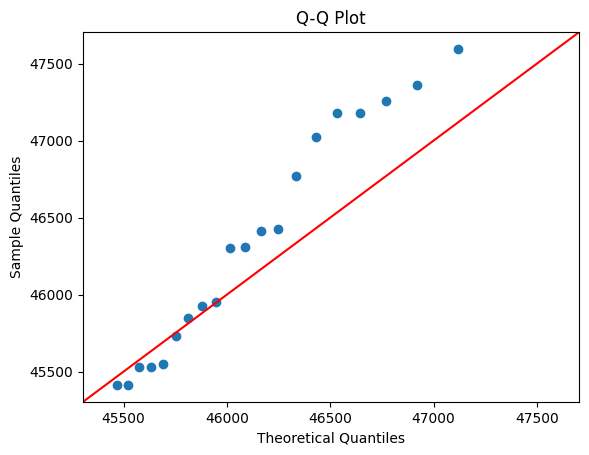

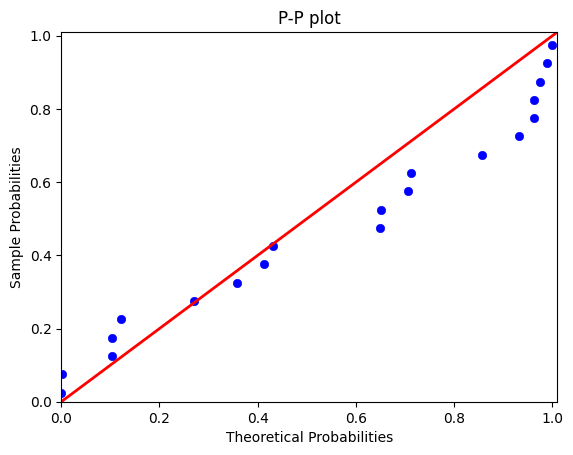

#############
#############
TEA_caja Distr. Normal Truncada
Parámetro estimado: Media = 108.901
Parámetro estimado: Desviación Estándar = 110.01667077765987


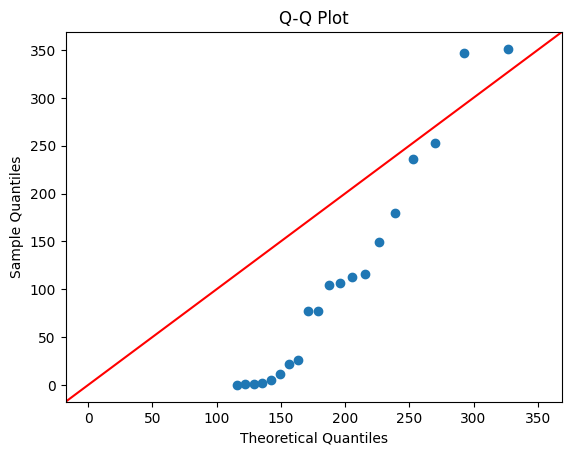

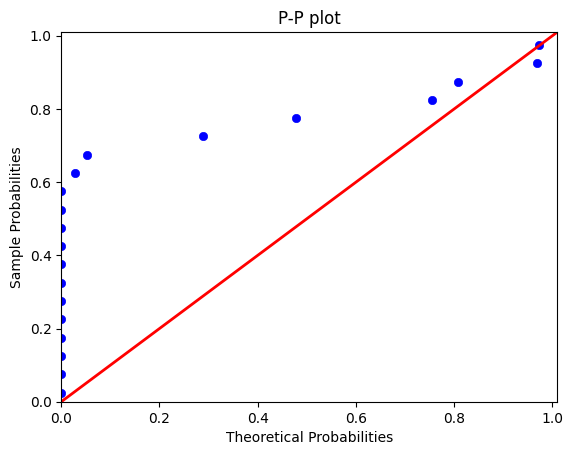



TEA_caja Distr. Normal
Parámetro estimado: Media = 108.901
Parámetro estimado: Desviación Estándar = 110.01667077765987


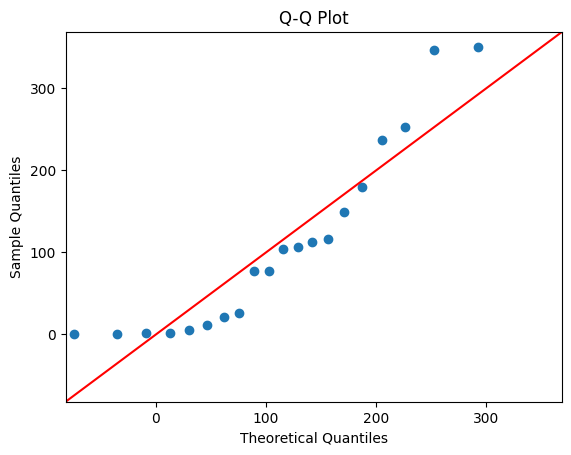

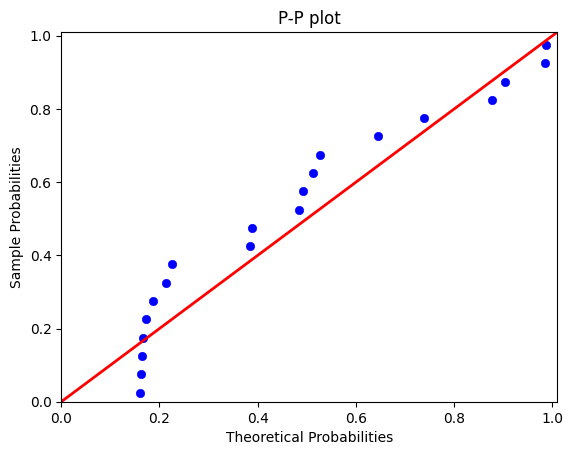



TEA_caja Distr. Exponencial
Parámetro estimado: Tasa = 0.009182652133589224


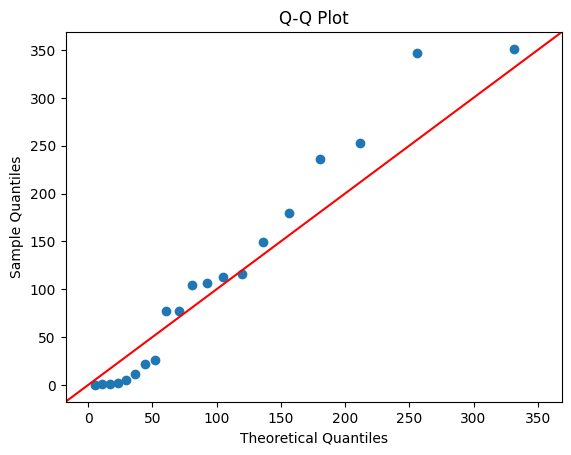

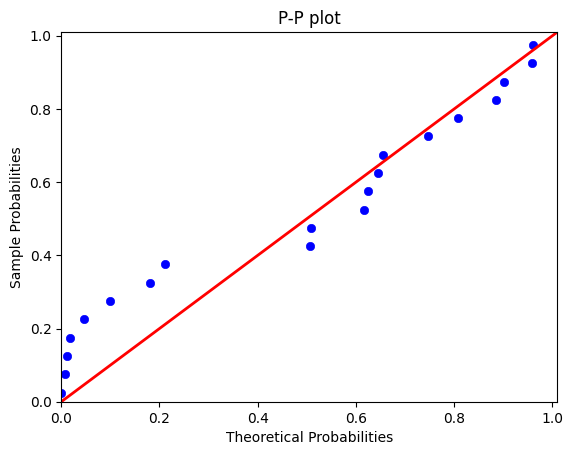



TEA_caja Distr. Uniforme
Parámetro estimado: a = 0.0
Parámetro estimado: b = 351.08


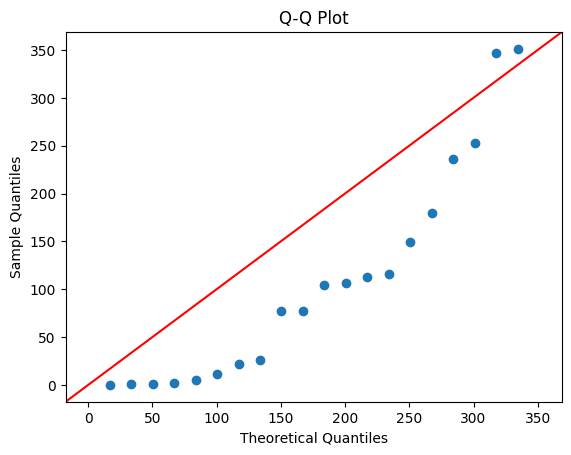

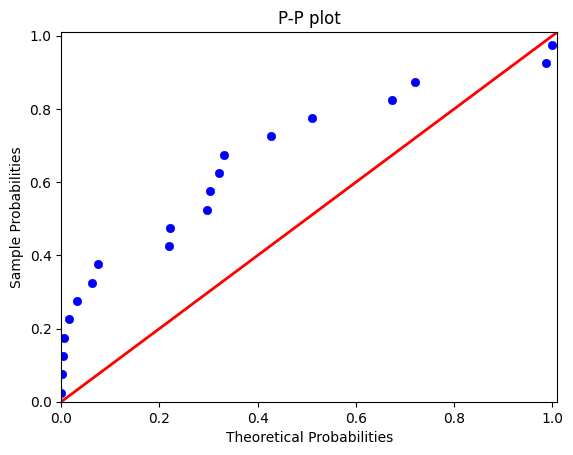



TEA_caja Distr. Weibull
Parámetro estimado: Escala = 90.07916550299986
Parámetro estimado: Forma = 0.7372871983031872


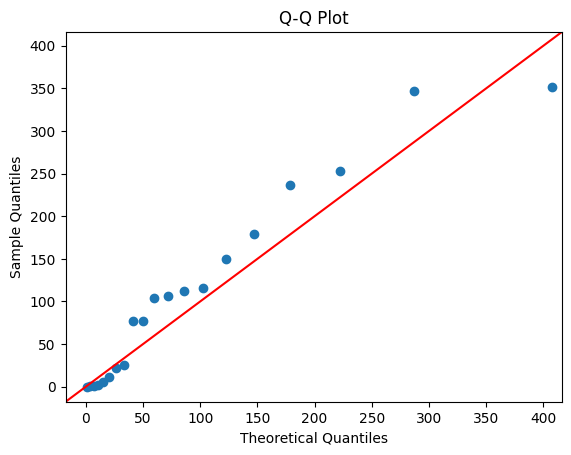

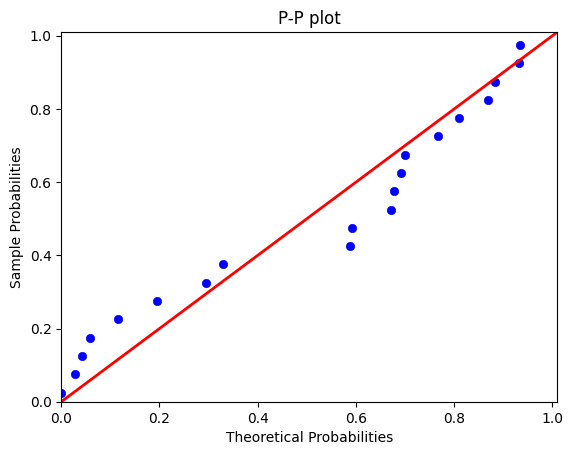



TEA_caja Distr. LogNorm
Parámetro estimado (normal asociada): Media = -inf
Parámetro estimado (normal asociada): Desviación Estándar = nan


c:\Users\user\Desktop\Andes\9\Simu\Proyecto\Git\simu\Proyecto\funciones_qq_pp_plot.py:97: RuntimeWarning: divide by zero encountered in log
  mean = np.mean(np.log(data))
c:\Users\user\Desktop\Andes\9\Simu\Proyecto\Git\simu\Proyecto\funciones_qq_pp_plot.py:103: RuntimeWarning: divide by zero encountered in log
  std_dev = np.std(np.log(data))
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


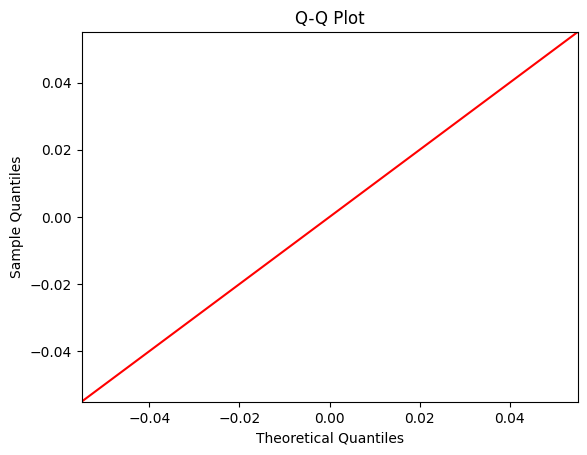

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2066: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2066: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


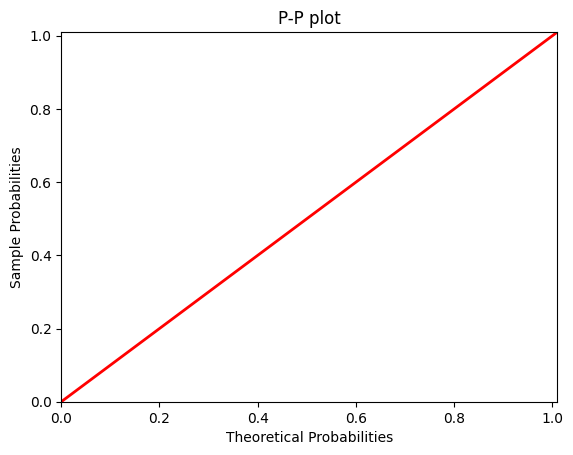



TEA_caja Distr. Triang
Parámetro estimado: a = 0.0
Parámetro estimado: b = 351.08
Parámetro estimado: c = 0.0


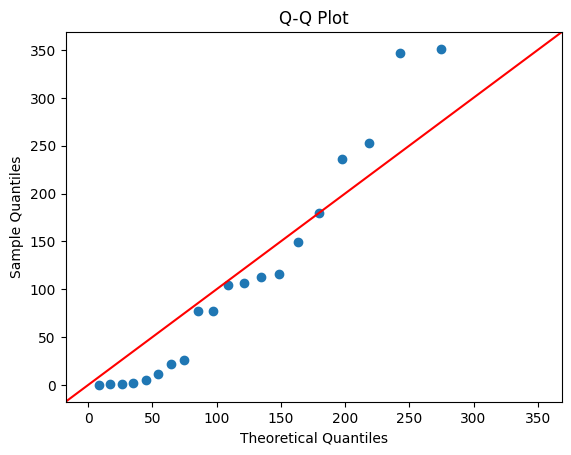

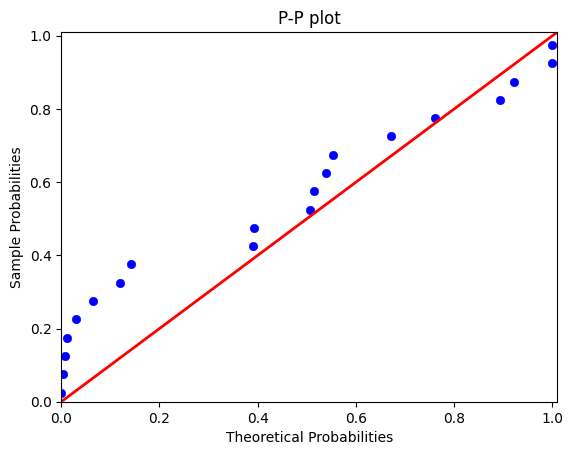

#############
#############
inicio_servicio_caja Distr. Normal Truncada
Parámetro estimado: Media = 46365.2
Parámetro estimado: Desviación Estándar = 707.6564561989102


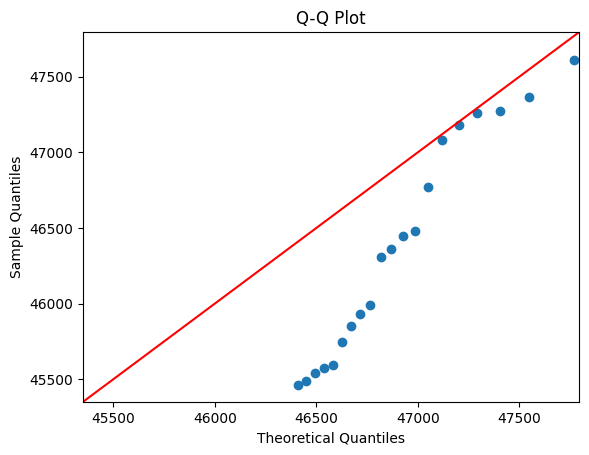

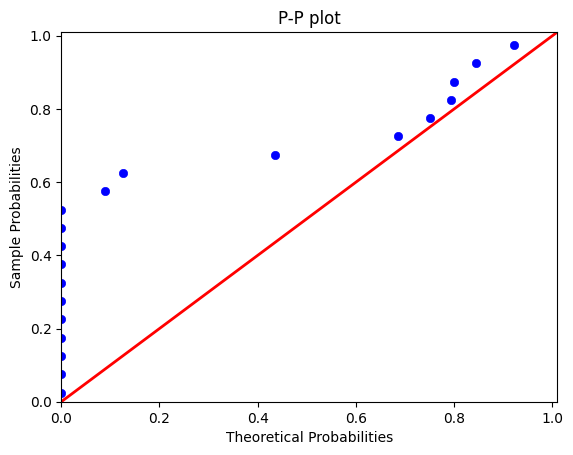



inicio_servicio_caja Distr. Normal
Parámetro estimado: Media = 46365.2
Parámetro estimado: Desviación Estándar = 707.6564561989102


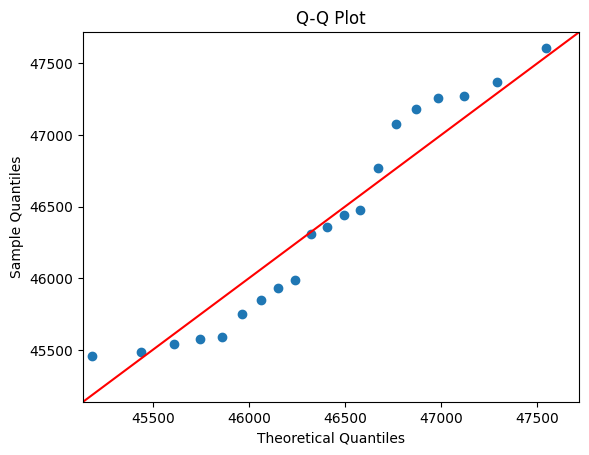

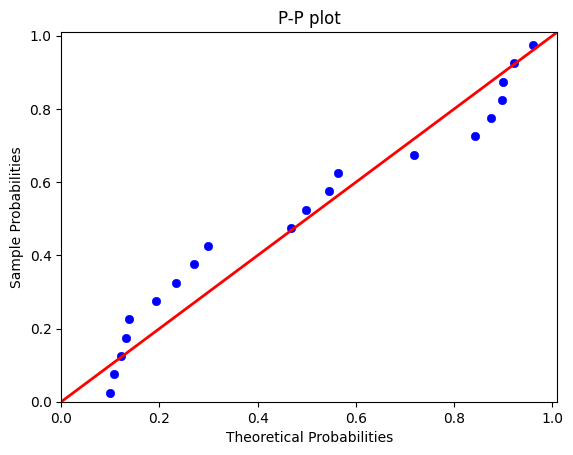



inicio_servicio_caja Distr. Exponencial
Parámetro estimado: Tasa = 2.156790006297827e-05


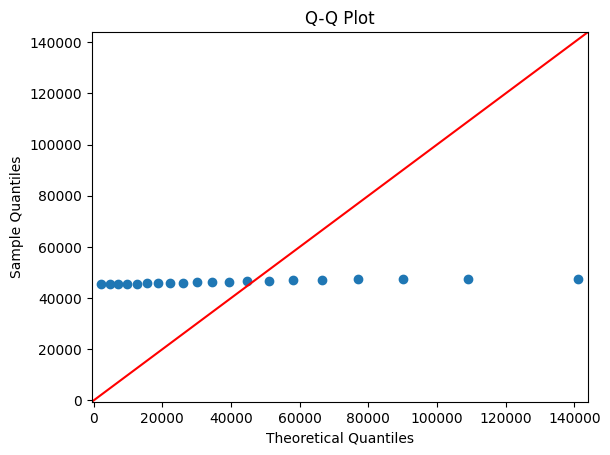

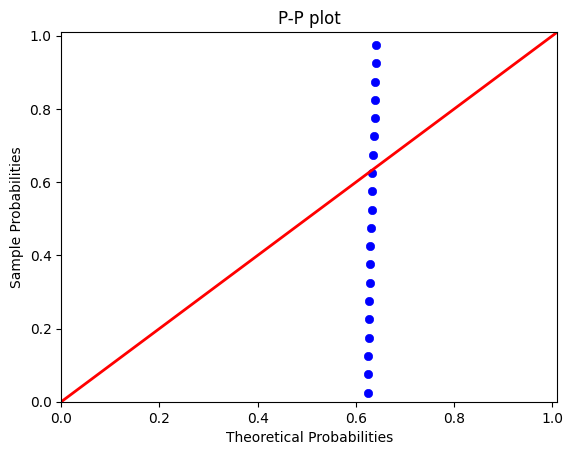



inicio_servicio_caja Distr. Uniforme
Parámetro estimado: a = 45459.0
Parámetro estimado: b = 47611.0


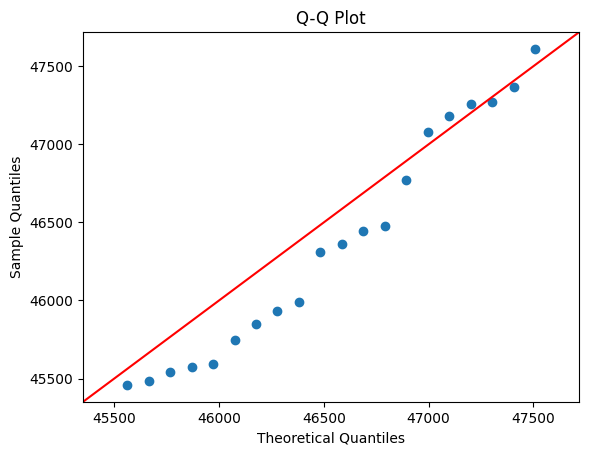

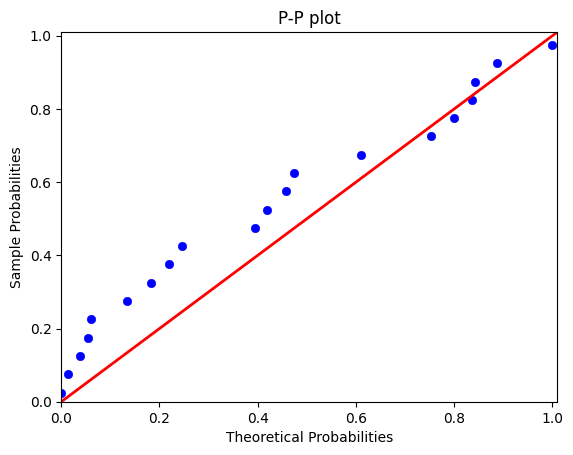



inicio_servicio_caja Distr. Weibull
Parámetro estimado: Escala = 46721.05567925849
Parámetro estimado: Forma = 69.51902092945303


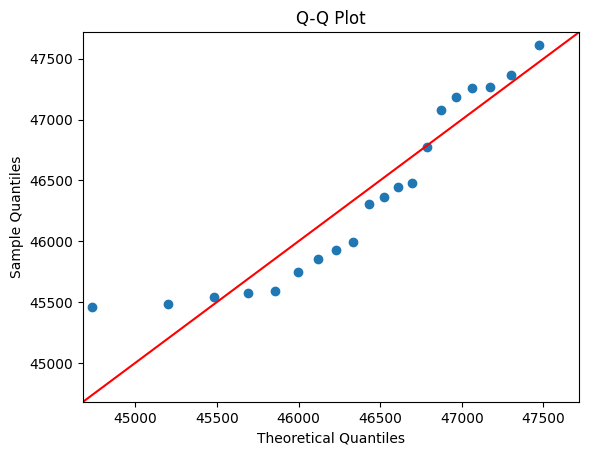

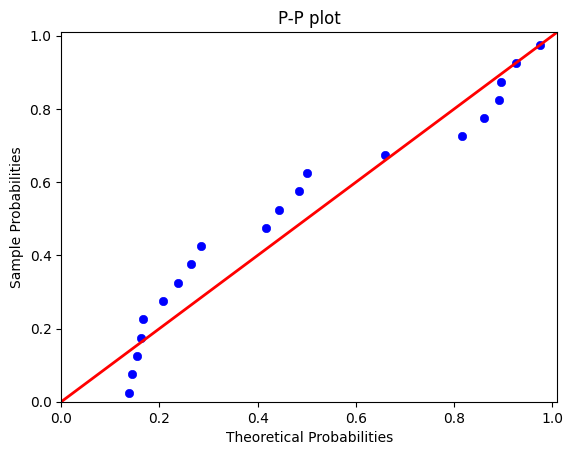



inicio_servicio_caja Distr. LogNorm
Parámetro estimado (normal asociada): Media = 10.744188282735685
Parámetro estimado (normal asociada): Desviación Estándar = 0.015233153292184975


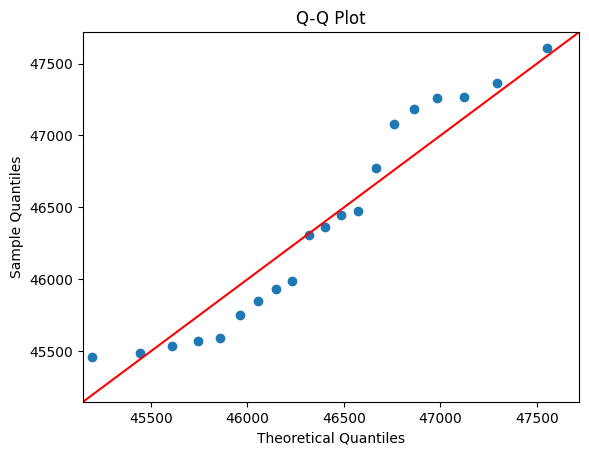

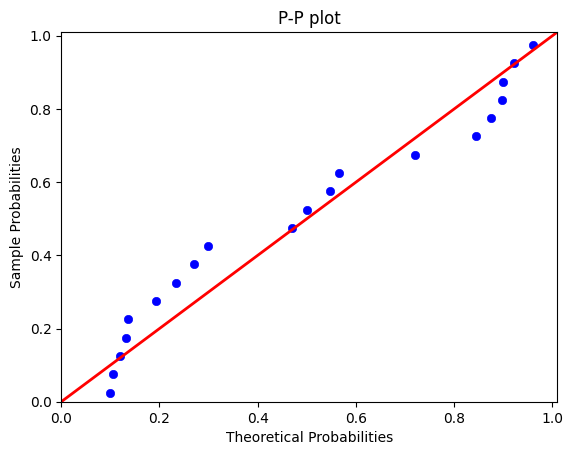



inicio_servicio_caja Distr. Triang
Parámetro estimado: a = 45459.0
Parámetro estimado: b = 47611.0
Parámetro estimado: c = 45459.0


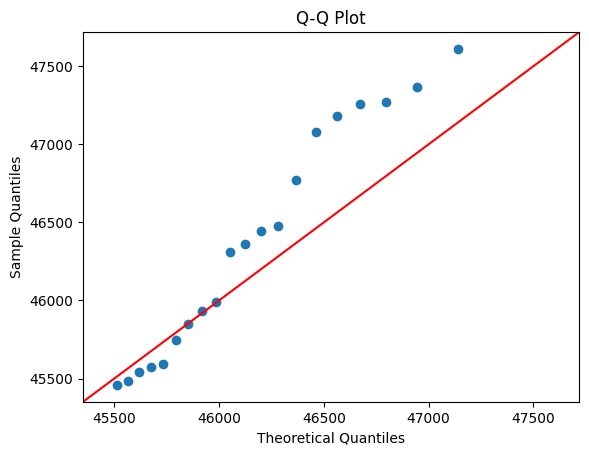

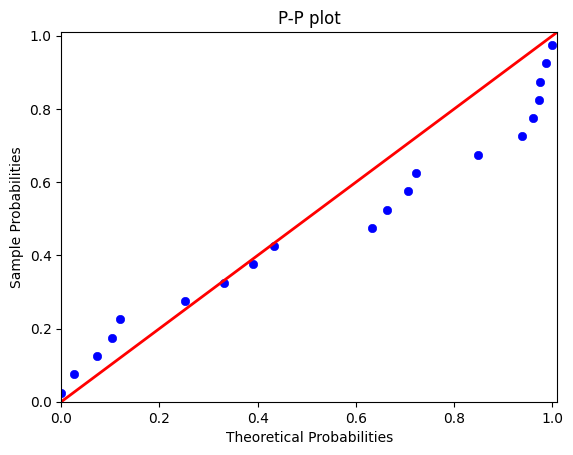

#############
#############
fin_servicio_caja Distr. Normal Truncada
Parámetro estimado: Media = 46414.75
Parámetro estimado: Desviación Estándar = 711.9199305399449


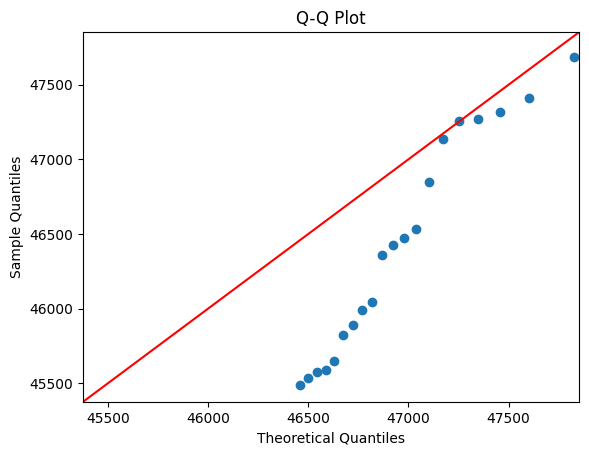

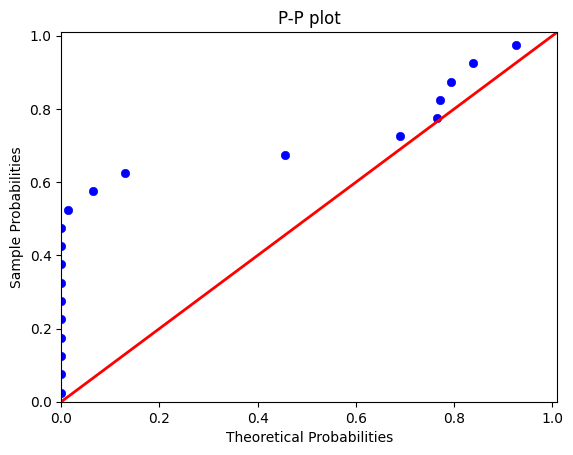



fin_servicio_caja Distr. Normal
Parámetro estimado: Media = 46414.75
Parámetro estimado: Desviación Estándar = 711.9199305399449


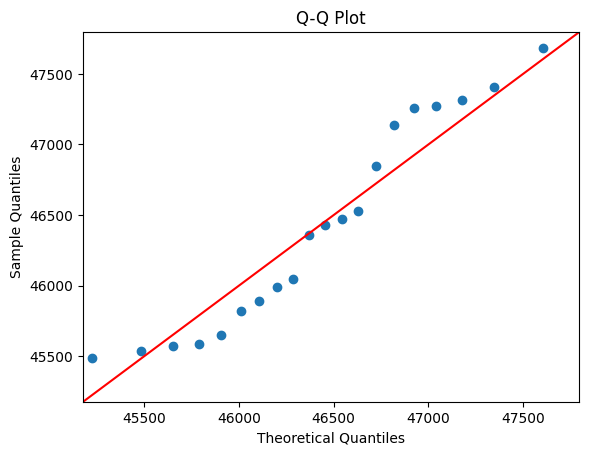

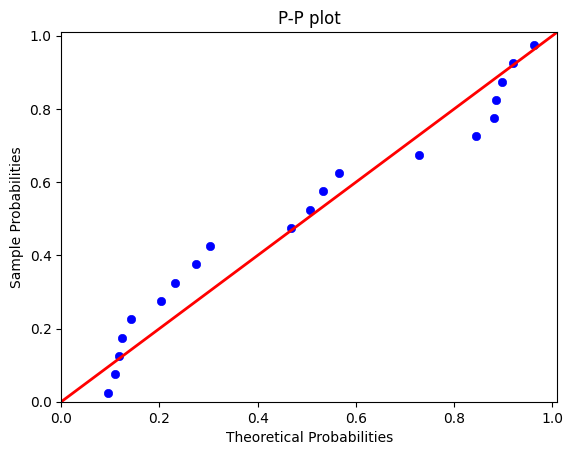



fin_servicio_caja Distr. Exponencial
Parámetro estimado: Tasa = 2.154487528210321e-05


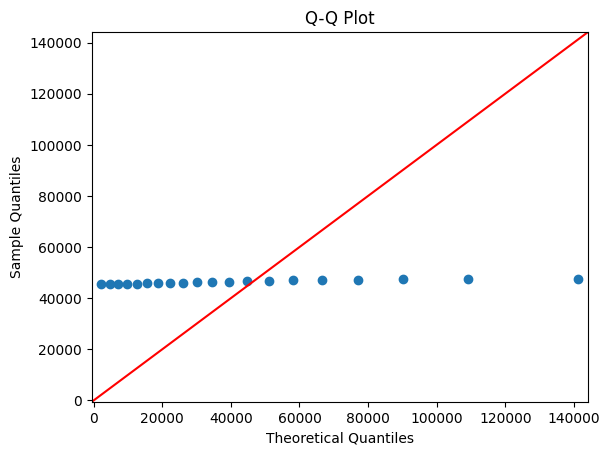

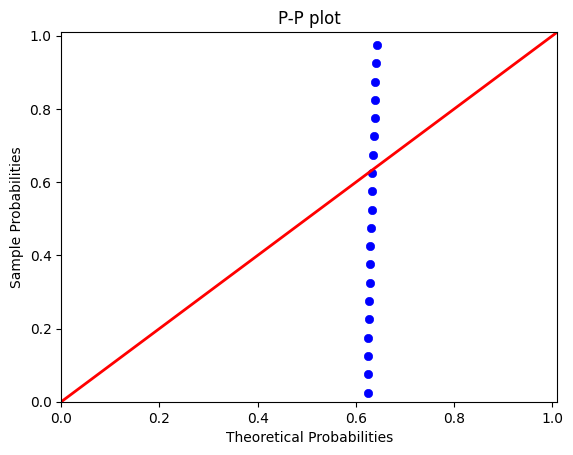



fin_servicio_caja Distr. Uniforme
Parámetro estimado: a = 45486.0
Parámetro estimado: b = 47685.0


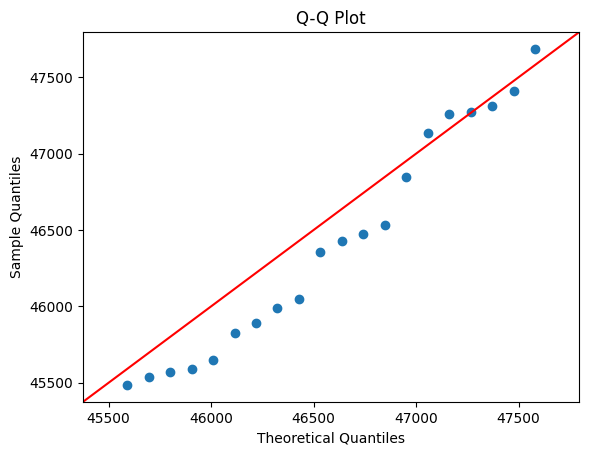

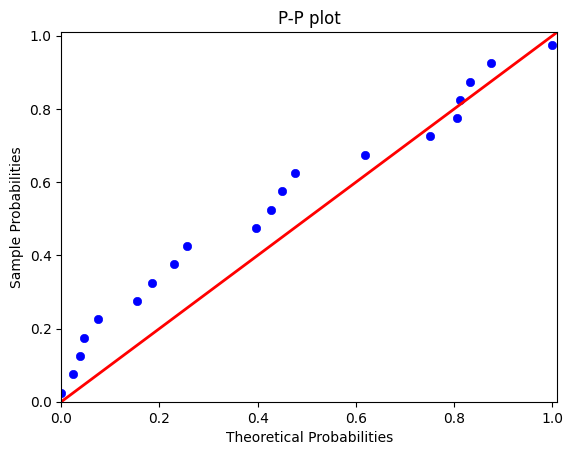



fin_servicio_caja Distr. Weibull
Parámetro estimado: Escala = 46772.36296120414
Parámetro estimado: Forma = 69.22861925101802


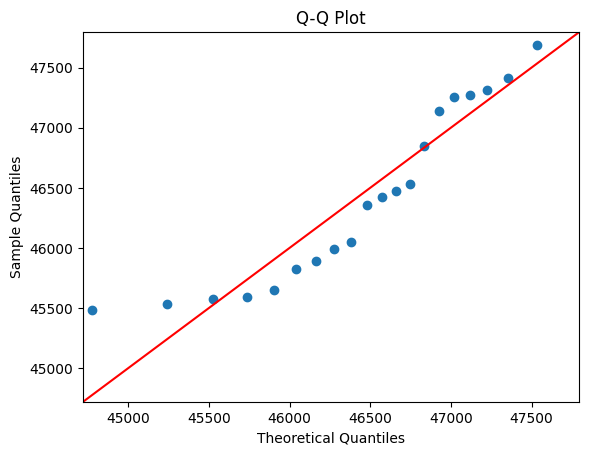

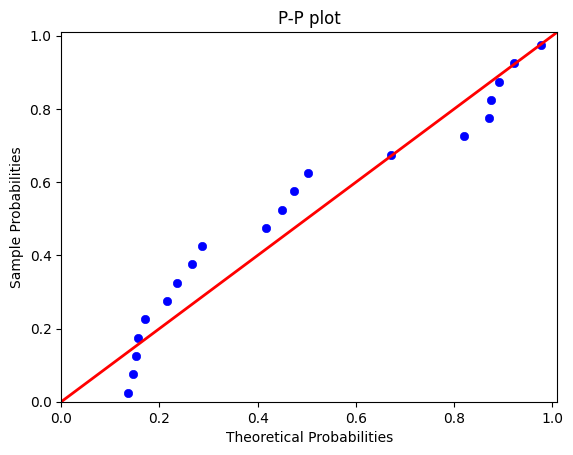



fin_servicio_caja Distr. LogNorm
Parámetro estimado (normal asociada): Media = 10.745255236108857
Parámetro estimado (normal asociada): Desviación Estándar = 0.015309776788841408


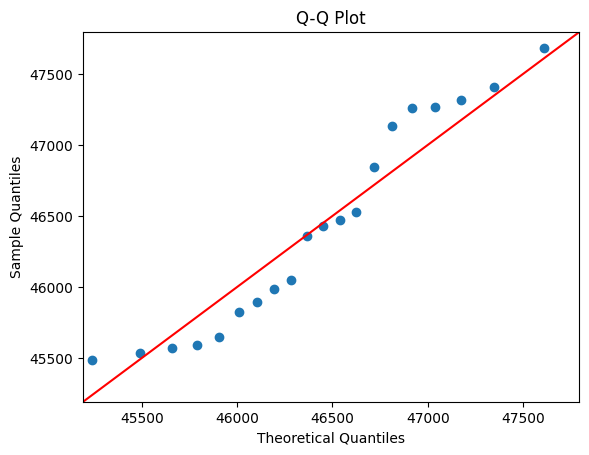

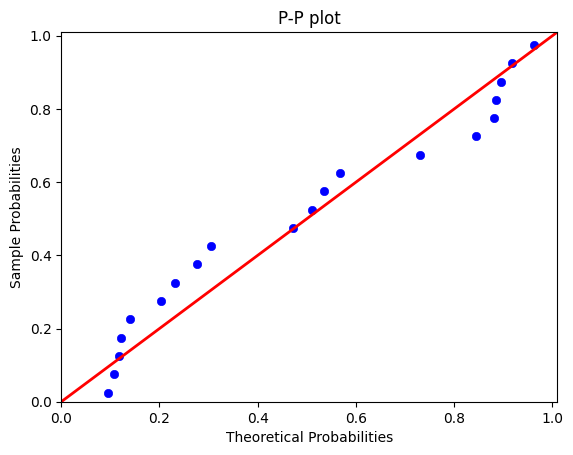



fin_servicio_caja Distr. Triang
Parámetro estimado: a = 45486.0
Parámetro estimado: b = 47685.0
Parámetro estimado: c = 45486.0


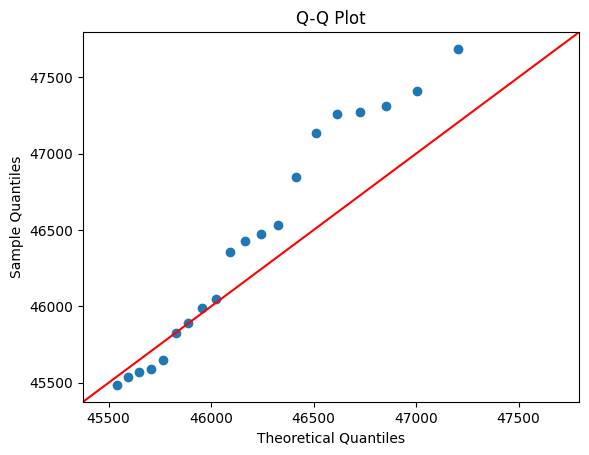

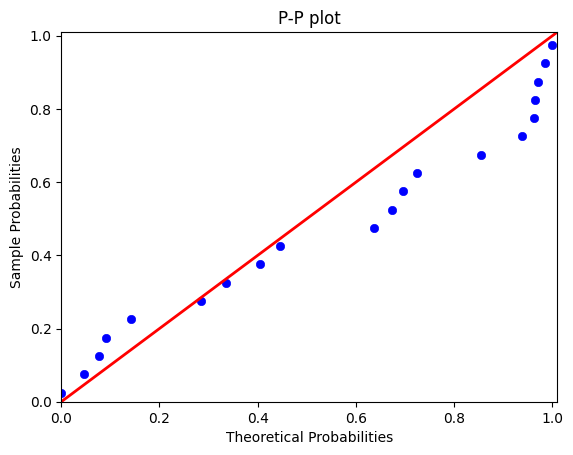

#############
#############
ts_caja_segs Distr. Normal Truncada
Parámetro estimado: Media = 49.55
Parámetro estimado: Desviación Estándar = 19.2027992751057


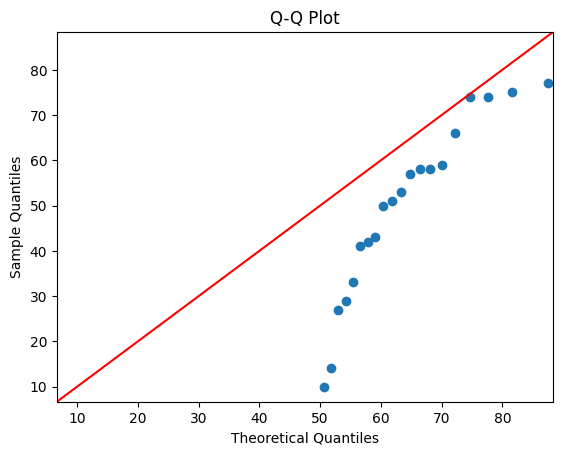

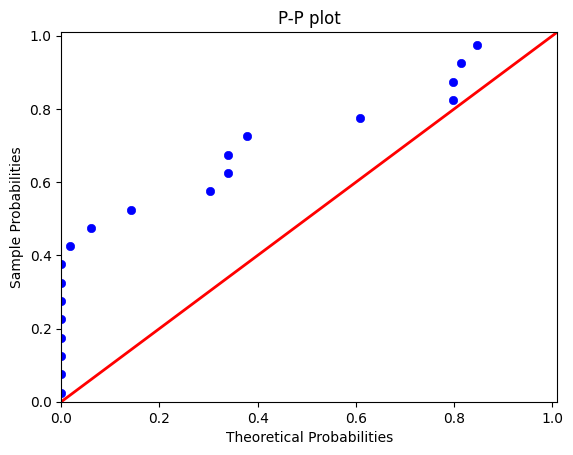



ts_caja_segs Distr. Normal
Parámetro estimado: Media = 49.55
Parámetro estimado: Desviación Estándar = 19.2027992751057


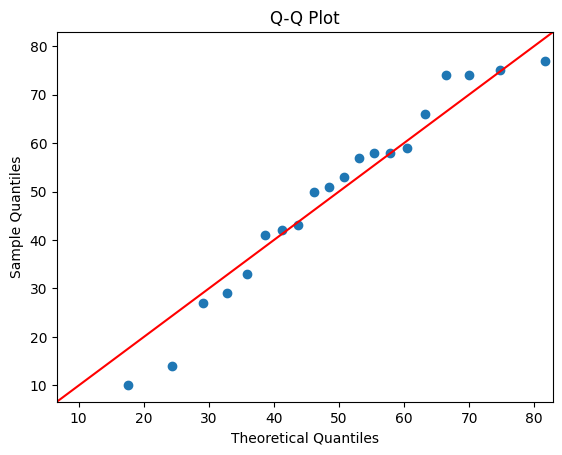

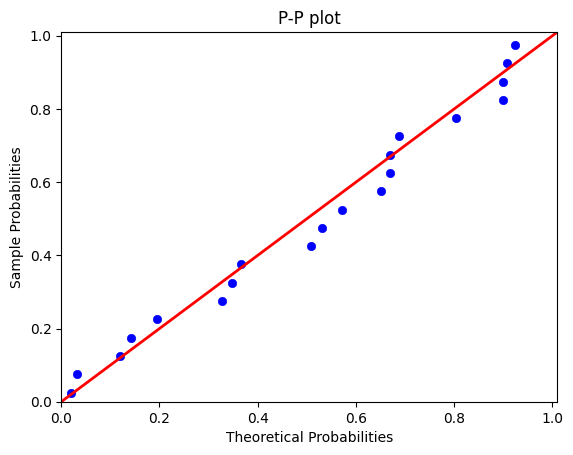



ts_caja_segs Distr. Exponencial
Parámetro estimado: Tasa = 0.020181634712411706


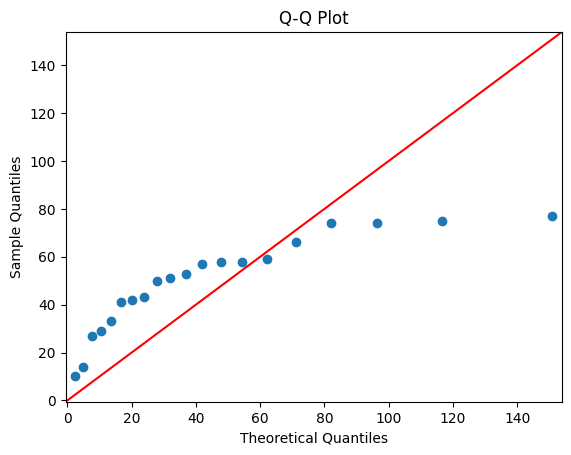

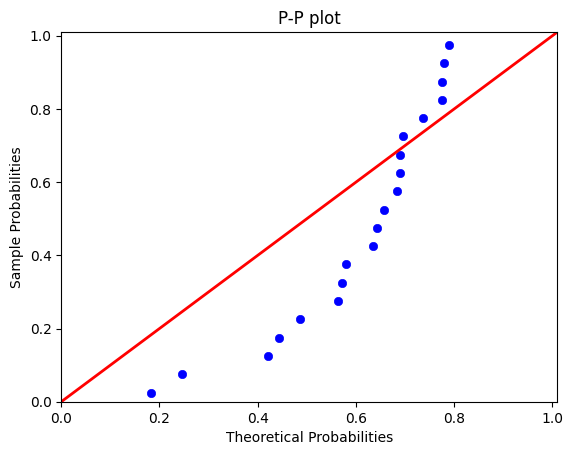



ts_caja_segs Distr. Uniforme
Parámetro estimado: a = 10.0
Parámetro estimado: b = 77.0


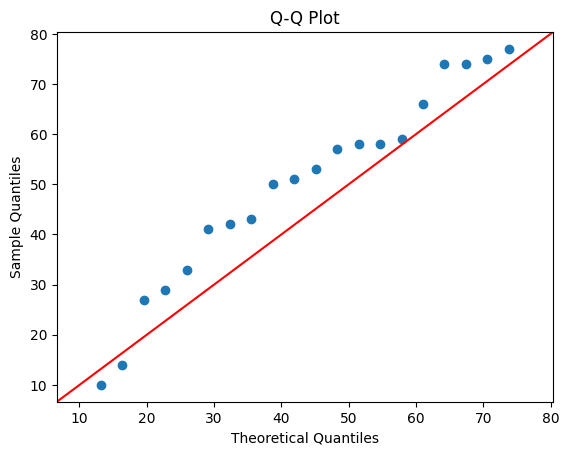

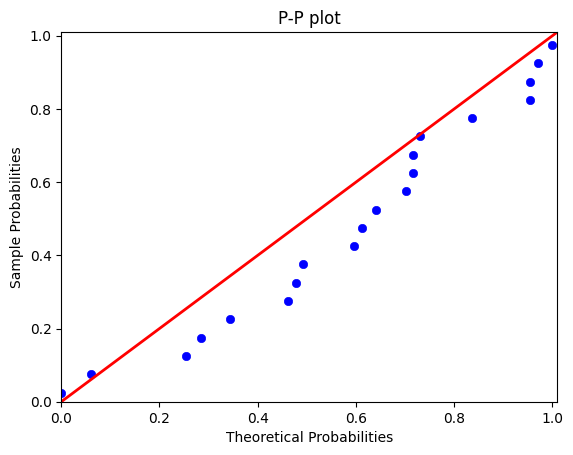



ts_caja_segs Distr. Weibull
Parámetro estimado: Escala = 55.48311795150637
Parámetro estimado: Forma = 2.875686386027799


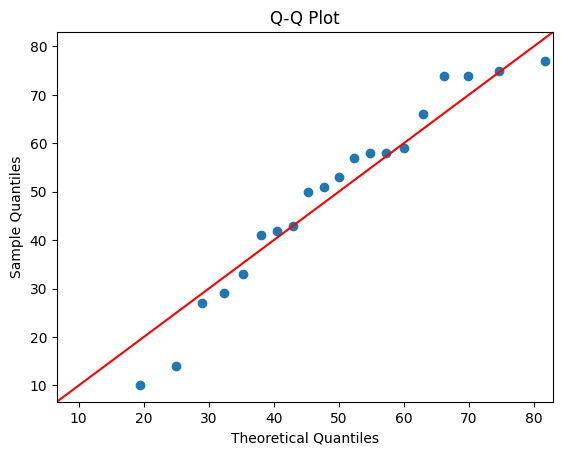

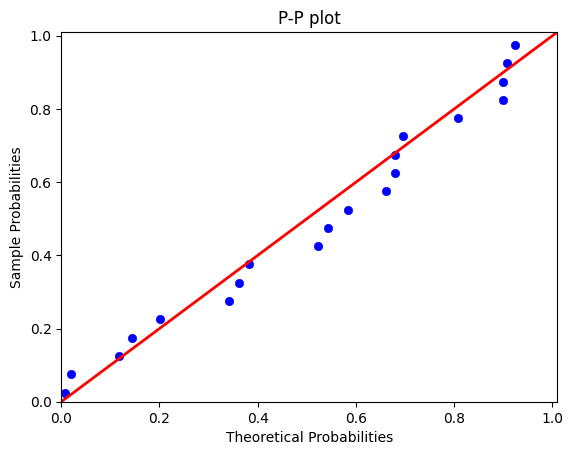



ts_caja_segs Distr. LogNorm
Parámetro estimado (normal asociada): Media = 3.791420911455514
Parámetro estimado (normal asociada): Desviación Estándar = 0.5333455490196097


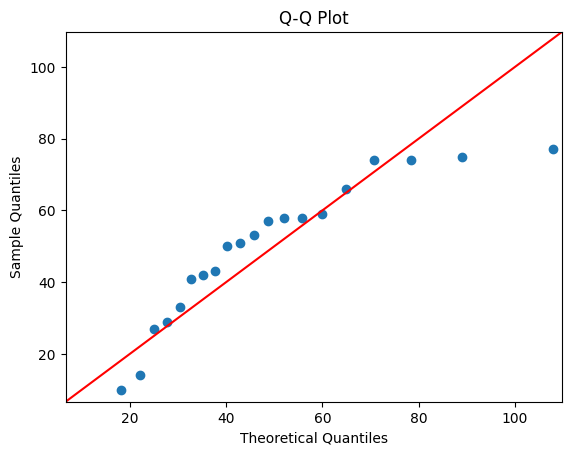

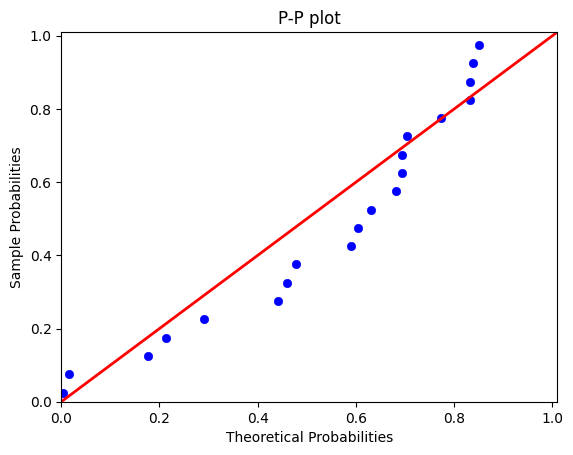



ts_caja_segs Distr. Triang
Parámetro estimado: a = 10.0
Parámetro estimado: b = 77.0
Parámetro estimado: c = 58.0


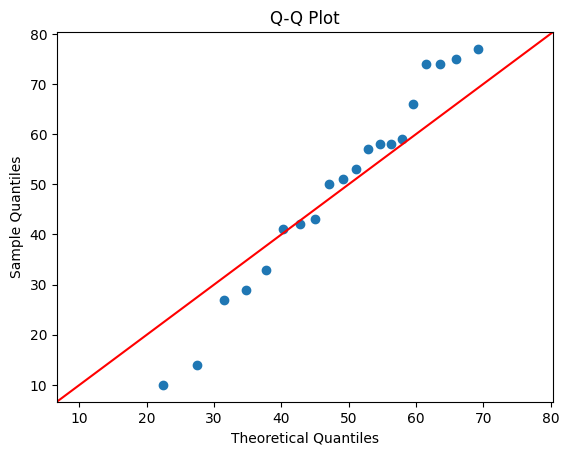

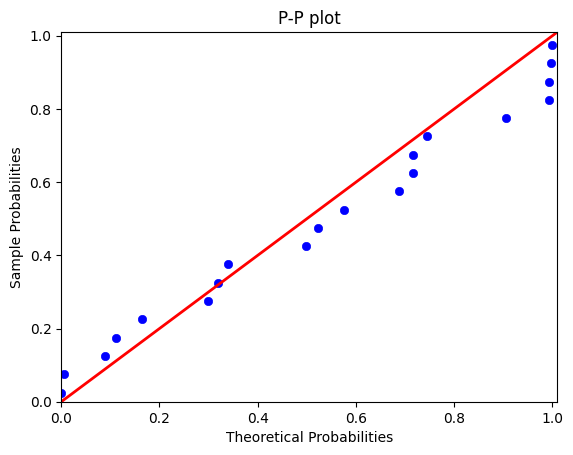

#############
#############
inicio_servicio_armado Distr. Normal Truncada
Parámetro estimado: Media = 31308.0
Parámetro estimado: Desviación Estándar = 19979.14292956532


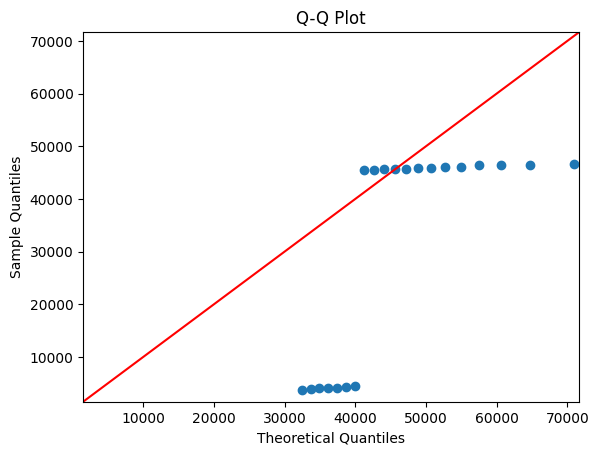

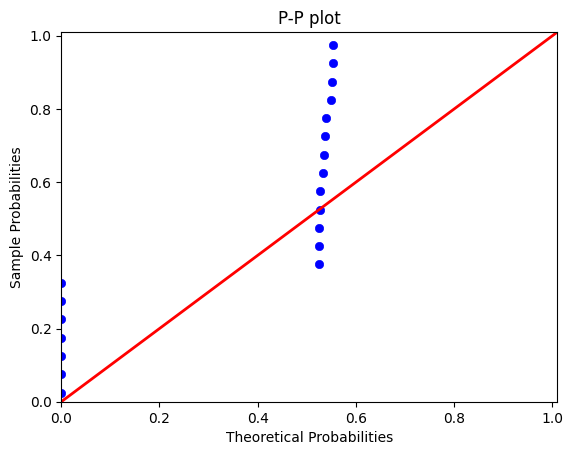



inicio_servicio_armado Distr. Normal
Parámetro estimado: Media = 31308.0
Parámetro estimado: Desviación Estándar = 19979.14292956532


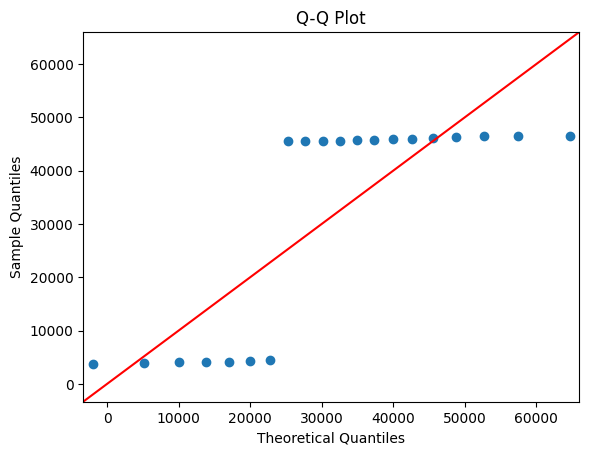

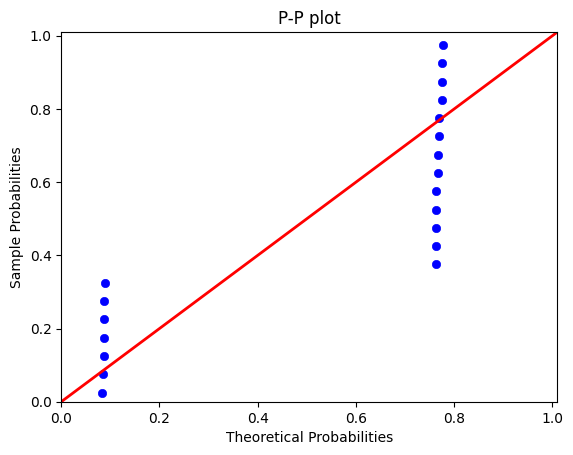



inicio_servicio_armado Distr. Exponencial
Parámetro estimado: Tasa = 3.1940718027341254e-05


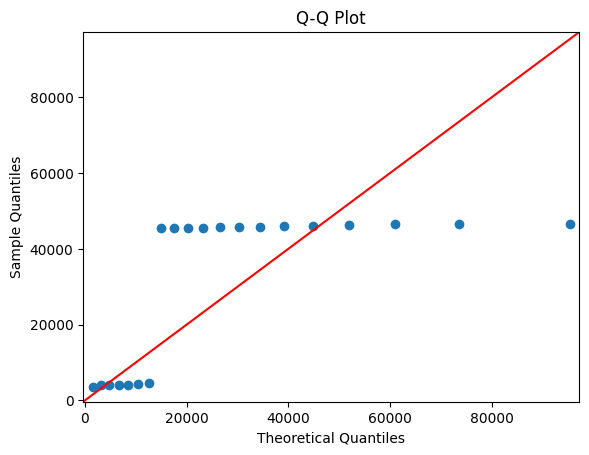

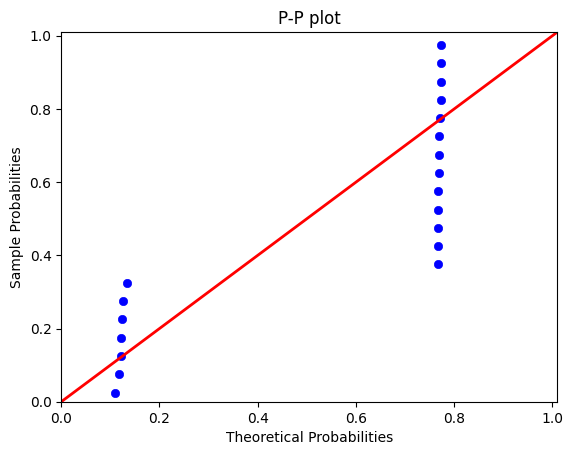



inicio_servicio_armado Distr. Uniforme
Parámetro estimado: a = 3655.0
Parámetro estimado: b = 46540.0


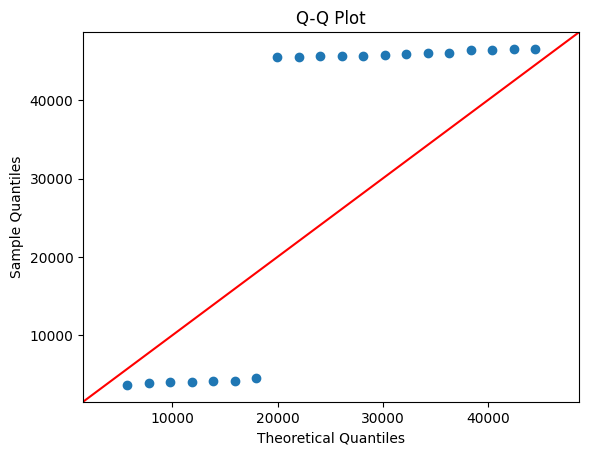

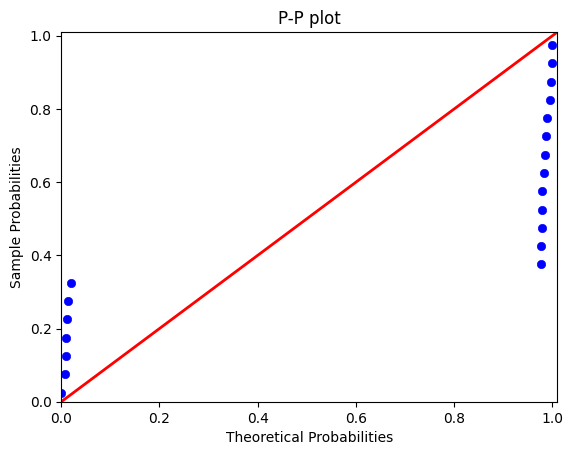



inicio_servicio_armado Distr. Weibull
Parámetro estimado: Escala = 33368.85742116487
Parámetro estimado: Forma = 1.2677004961280562


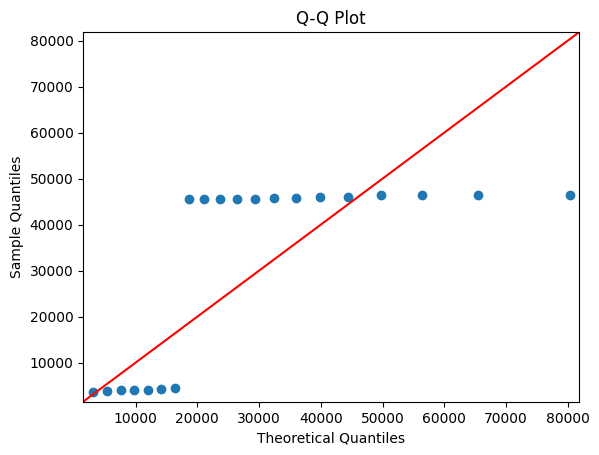

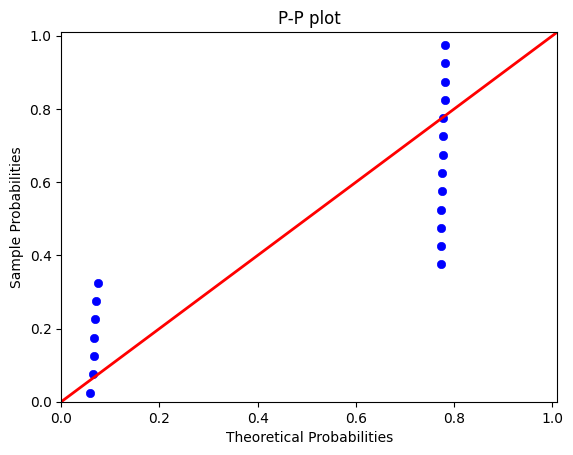



inicio_servicio_armado Distr. LogNorm
Parámetro estimado (normal asociada): Media = 9.887815170051756
Parámetro estimado (normal asociada): Desviación Estándar = 1.1559285359461975


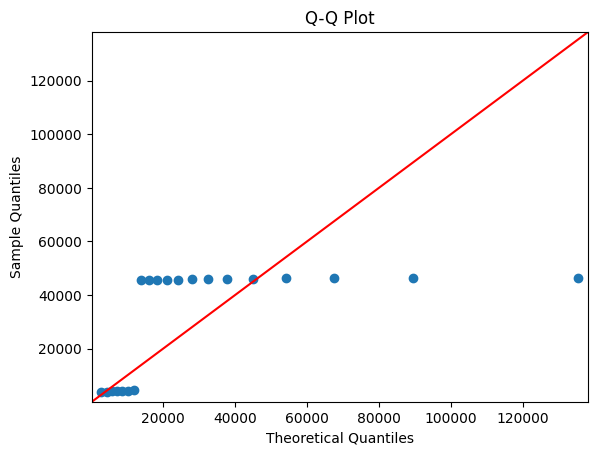

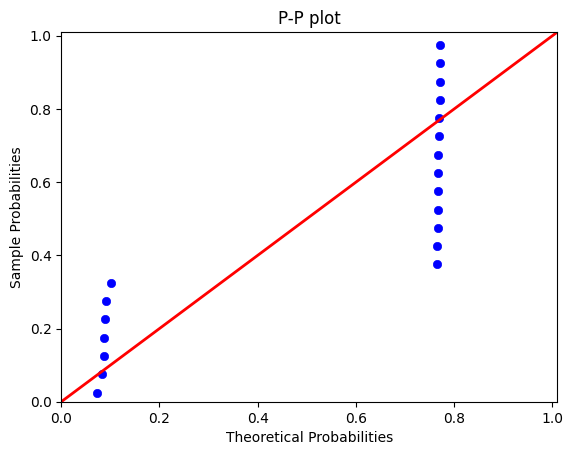



inicio_servicio_armado Distr. Triang
Parámetro estimado: a = 3655.0
Parámetro estimado: b = 46540.0
Parámetro estimado: c = 45551.0


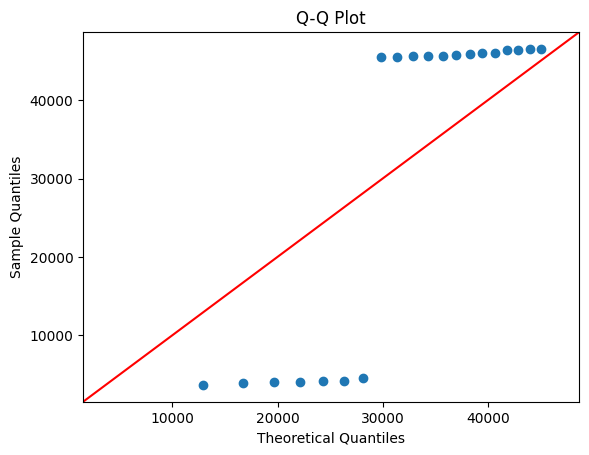

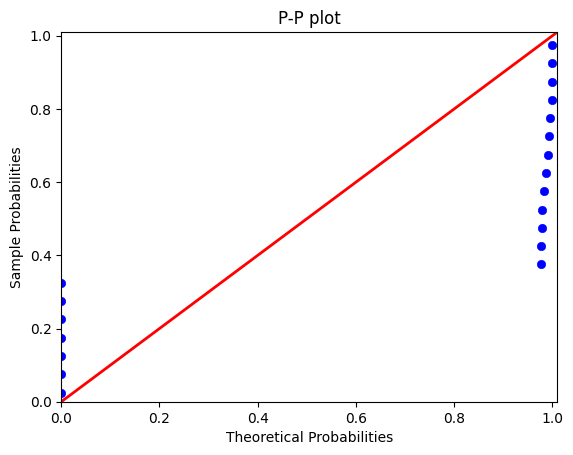

#############
#############
fin_servicio_armado Distr. Normal Truncada
Parámetro estimado: Media = 46561.15
Parámetro estimado: Desviación Estándar = 737.5713711228223


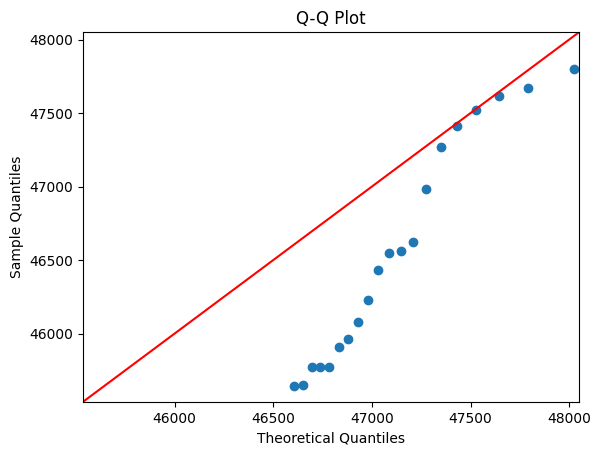

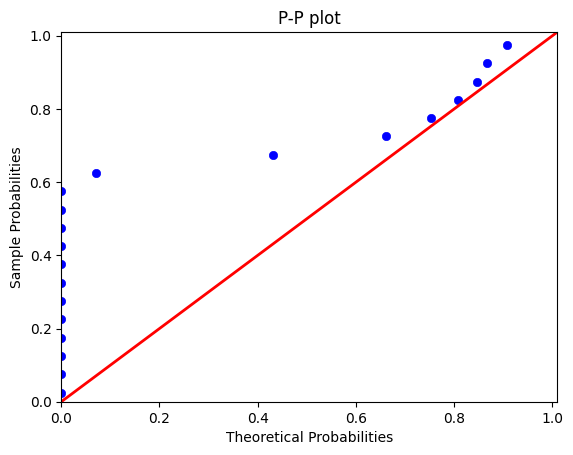



fin_servicio_armado Distr. Normal
Parámetro estimado: Media = 46561.15
Parámetro estimado: Desviación Estándar = 737.5713711228223


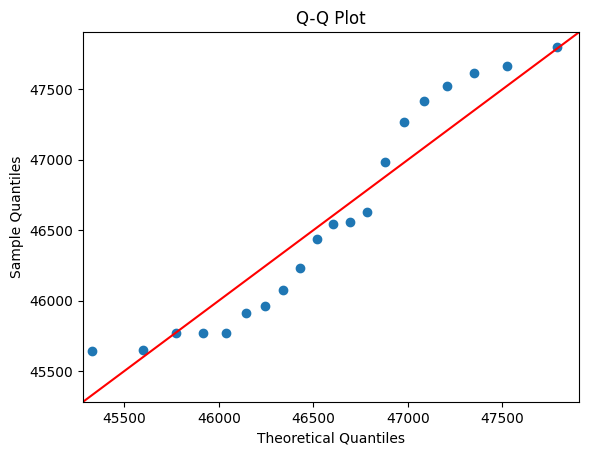

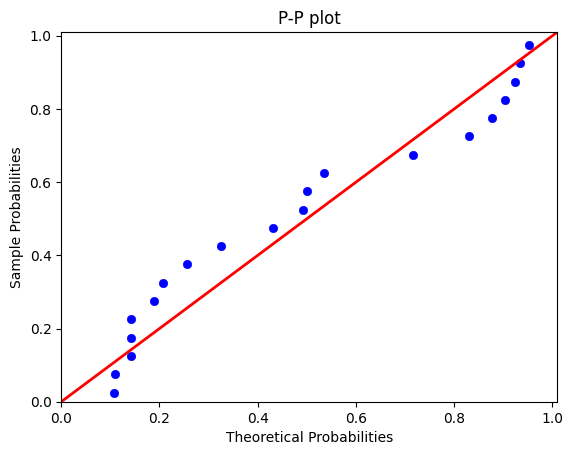



fin_servicio_armado Distr. Exponencial
Parámetro estimado: Tasa = 2.14771327598223e-05


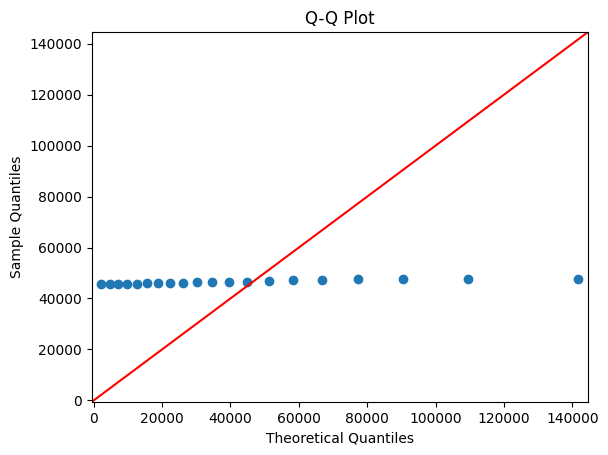

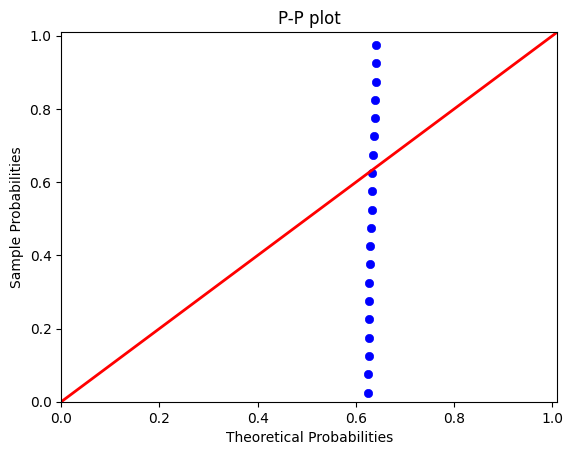



fin_servicio_armado Distr. Uniforme
Parámetro estimado: a = 45644.0
Parámetro estimado: b = 47799.0


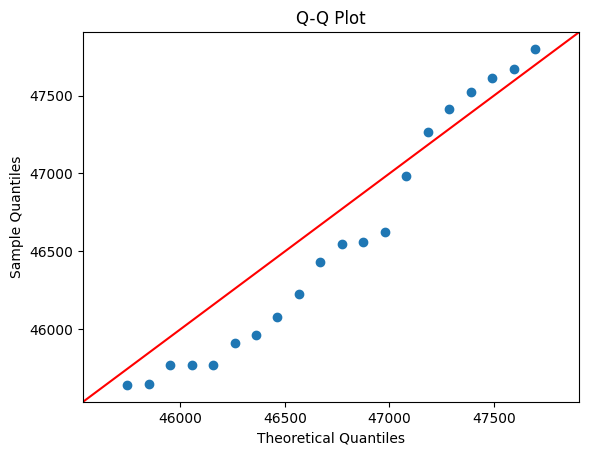

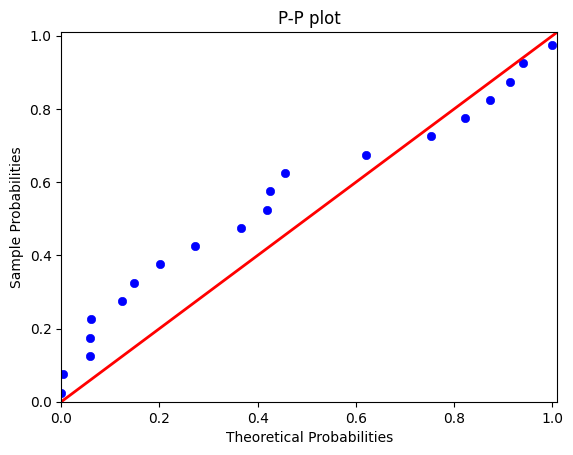



fin_servicio_armado Distr. Weibull
Parámetro estimado: Escala = 46934.05656421095
Parámetro estimado: Forma = 66.31081323043111


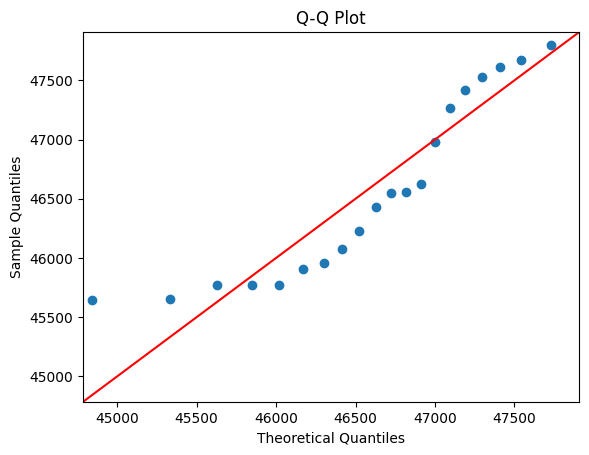

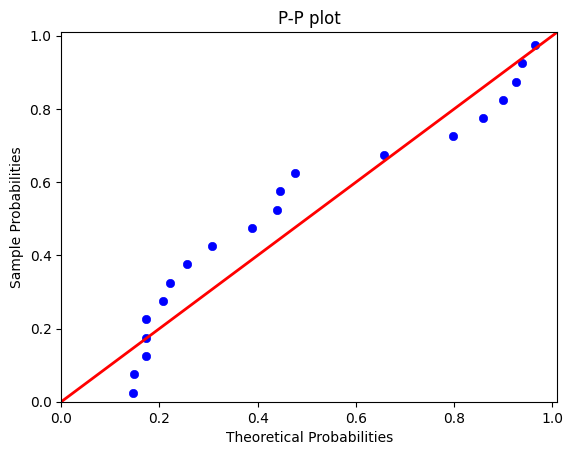



fin_servicio_armado Distr. LogNorm
Parámetro estimado (normal asociada): Media = 10.748396736797472
Parámetro estimado (normal asociada): Desviación Estándar = 0.01580087890700669


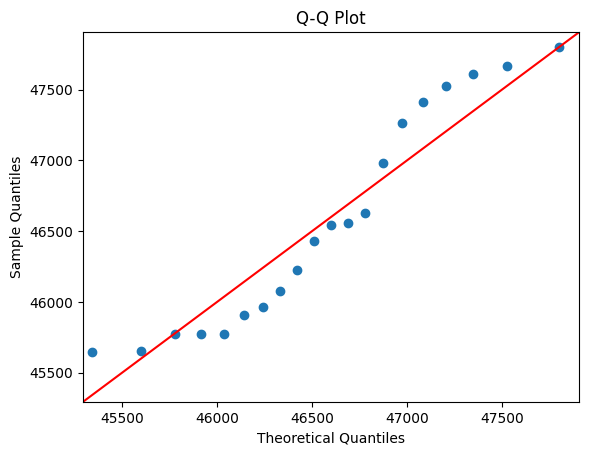

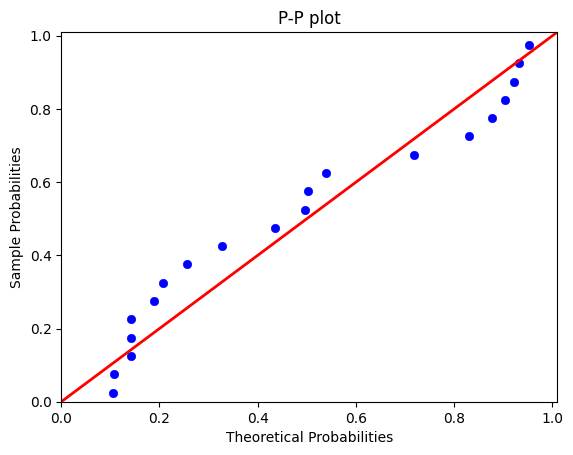



fin_servicio_armado Distr. Triang
Parámetro estimado: a = 45644.0
Parámetro estimado: b = 47799.0
Parámetro estimado: c = 45644.0


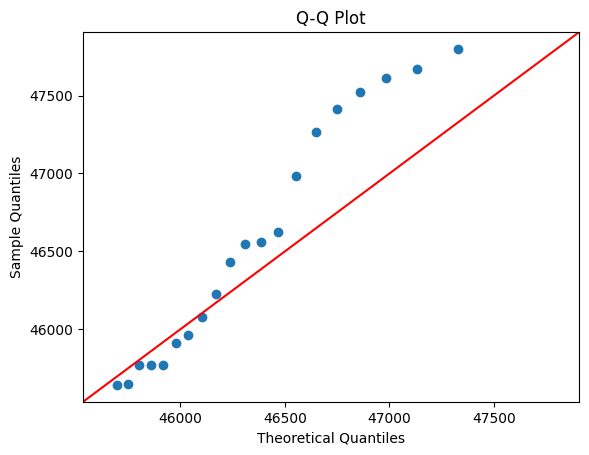

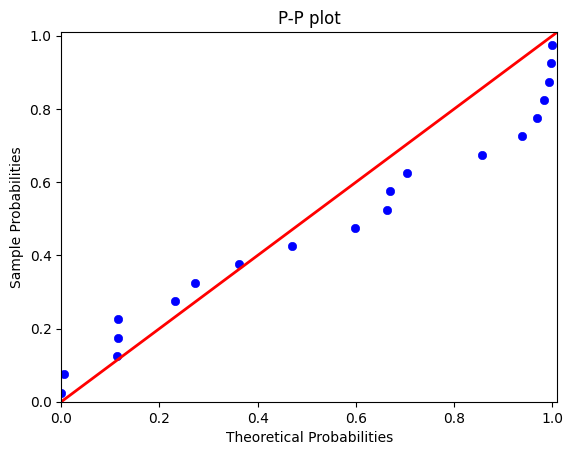

#############


In [40]:
for i in [_ for _ in datosPola.columns.tolist() if _ != "ts_armado_seg"]:
    series = np.array(datosPola[i]).flatten()
    series = series.astype(float)
    print("#############")
    print(f"{i} Distr. Normal Truncada")
    PP_QQ_plot_truncated_normal(series,media="estimado",desvesta="estimado")
    print("\n")
    
    print(f"{i} Distr. Normal")
    PP_QQ_plot_normal(series,media="estimado",desvesta="estimado")
    print("\n")
    print(f"{i} Distr. Exponencial")
    PP_QQ_plot_exponential(series,tasa="estimado")    
    print("\n")
    print(f"{i} Distr. Uniforme")
    PP_QQ_plot_uniform(series,minimo="estimado",maximo="estimado")
    print("\n")
    print(f"{i} Distr. Weibull")
    PP_QQ_plot_weibull(series,forma="estimado",escala="estimado")
    print("\n")
    print(f"{i} Distr. LogNorm")
    PP_QQ_plot_lognormal(series,media="estimado",desvesta="estimado")
    print("\n")
    print(f"{i} Distr. Triang")
    PP_QQ_plot_triangular(series,minimo="estimado",maximo="estimado",moda="estimado")
    print("#############")

In [41]:
for i in datosPola.columns.tolist():
    series = np.array(datosPola[i]).flatten()
    series = series.astype(float)
    data = series
    print("#############")
    print(f"{i} Distr. Normal Truncada")
    truncated_chi_square_normal_goodness_of_fit(data,media="estimado",desvesta="estimado",r=2)
    print("\n")

    print(f"{i} Distr. Normal")
    chi_square_normal_goodness_of_fit(data,media="estimado",desvesta="estimado",r=2)
    print("\n")

    print(f"{i} Distr. Exponencial")
    chi_square_exponential_goodness_of_fit(data,tasa="estimado",r=1)

    print("\n")
    print(f"{i} Distr. Uniforme")
    chi_square_uniform_goodness_of_fit(data,minimo="estimado",maximo="estimado",r=2)

    print("\n")
    print(f"{i} Distr. Weibull")
    chi_square_weibull_goodness_of_fit(data,forma="estimado",escala="estimado",r=2)
    print("\n")

    print(f"{i} Distr. LogNorm")
    chi_square_lognormal_goodness_of_fit(data,media="estimado",desvesta="estimado",r=2)
    print("\n")
    print(f"{i} Distr. Triang")
    chi_square_triangular_goodness_of_fit(data,minimo="estimado",maximo="estimado",moda="estimado",r=3)
    print("#############")

#############
llegada_fila Distr. Normal Truncada
Parámetro estimado: Media = 46334.65
Parámetro estimado: Desviación Estándar = 711.5396176601835
Chi-squared statistic: 19.19999999999999
p-value: 1.1771339097577105e-05
 No sigue la distribución


llegada_fila Distr. Normal
Parámetro estimado: Media = 46334.65
Parámetro estimado: Desviación Estándar = 711.5396176601835
Chi-squared statistic: 1.8000000000000558
p-value: 0.17971249487899288
 Sigue la distribucion


llegada_fila Distr. Exponencial
Parámetro estimado: Tasa = 2.158212050808628e-05
Chi-squared statistic: 55.0
p-value: 1.1399770016851107e-12
 No sigue la distribucion


llegada_fila Distr. Uniforme
Parámetro estimado: a = 45413.0
Parámetro estimado: b = 47596.0
Chi-squared statistic: 5.2
p-value: 0.02258688816417964
 No sigue la distribucion


llegada_fila Distr. Weibull
Parámetro estimado: Escala = 46692.30084510437
Parámetro estimado: Forma = 69.02782934796628
Chi-squared statistic: 0.01120260693647135
p-value: 0.91570742049

c:\Users\user\Desktop\Andes\9\Simu\Proyecto\Git\simu\Proyecto\funcioneschicuadrado_continuas.py:164: RuntimeWarning: divide by zero encountered in log
  mean = np.mean(np.log(data))
c:\Users\user\Desktop\Andes\9\Simu\Proyecto\Git\simu\Proyecto\funcioneschicuadrado_continuas.py:170: RuntimeWarning: divide by zero encountered in log
  std_dev = np.std(np.log(data))
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


# Guardar archivos csv

In [42]:
datosPola

llegada_fila  TEA_caja inicio_servicio_caja fin_servicio_caja  \
0         45413      0.00                45459             45486   
1         45415      2.01                45487             45537   
2         45528    112.63                45539             45572   
3         45529      1.26                45574             45588   
4         45551     21.66                45591             45649   
5         45730    179.41                45749             45824   
6         45846    116.25                45851             45892   
7         45924     77.42                45931             45989   
8         45950     25.93                45990             46047   
9         46301    351.08                46308             46359   
10        46306      5.19                46361             46427   
11        46413    106.65                46444             46473   
12        46424     11.40                46478             46531   
13        46770    346.37                46772             46846   
14        47025    252.63                47078             47137   
15        47178    149.71                47182             47259   
16        47179      0.75                47260             47270   
17        47255     76.79                47271             47314   
18        47360    104.33                47368             47410   
19        47596    236.55                47611             47685   

    ts_caja_segs inicio_servicio_armado fin_servicio_armado  ts_armado_seg  
0           27.0                  45551               45644          93.39  
1           50.0                  45555               45651           0.81  
2           33.0                  45602               45771         170.07  
3           14.0                  45608               45772         165.10  
4           58.0                  45671               45773         102.29  
5           75.0                  45827               45911          84.20  
6           41.0                  45893               45961          69.52  
7           58.0                  45993               46077          85.90  
8           57.0                  46051               46229         179.55  
9           51.0                  46363               46434          72.82  
10          66.0                  46430               46547         117.20  
11          29.0                  46484               46560          77.42  
12          53.0                  46540               46626          86.33  
13          74.0                   3655               46982         127.88  
14          59.0                   3940               47266         126.00  
15          77.0                   4065               47414         150.81  
16          10.0                   4072               47524         252.30  
17          43.0                   4155               47614         259.44  
18          42.0                   4216               47668         252.19  
19          74.0                   4489               47799         110.48

In [43]:
lista = serie_predicha_ml_ts_armado.tolist()

# Convertir la lista a un DataFrame
newDf = pd.DataFrame(lista, columns=['serie_predicha_ml_ts_armado'])

# Guardar el DataFrame en un archivo CSV
newDf.to_csv('serie_predicha_ml_ts_armado.csv', index=False)

lista = serie_predicha_pola_ts_armado.tolist()

# Convertir la lista a un DataFrame
newDf = pd.DataFrame(lista, columns=['serie_predicha_pola_ts_armado'])

# Guardar el DataFrame en un archivo CSV
newDf.to_csv('serie_predicha_pola_ts_armado.csv', index=False)

In [44]:
df.columns

Index(['llegada_fila', 'TEA_caja', 'inicio_servicio_caja', 'fin_servicio_caja',
       'ts_caja_seg', 'inicio_servicio_armado', 'fin_servicio_armado',
       'ts_armado_seg'],
      dtype='object')

In [45]:
df.drop(columns=["ts_armado_seg"],inplace=True)
datosPola.drop(columns=['ts_armado_seg'],inplace=True)

In [46]:
df.to_csv("ML_tiempos_segundos.csv")
datosPola.to_csv("Pola_tiempos_segundos.csv")